# Deep Learning: Lesson 1



#### Started talking about logistics

#### Talking about the formus (which crashed right when he ran it)

### What is deep learning? 

Anything instead of programming a computer step by step, you provide examples instead. Arthur samuels. Talking about breast cancer survivors. Can work really well, depends on the experts and if you can come up with the features.

### In the last few years... 

It's become more advanced, can recommend pre-written responses. Can actually generate responses.

1. google suggest responses
2. human can sketch, and the deep learning can turn that into a painting of any style. Newer versions can update the painting realtime. 
3. How is Deep learning being used to google?

![](https://whatsthebigdata.files.wordpress.com/2017/01/deeplearning_google.png)

### Deep Learning improves cooling techniques

https://deepmind.com/blog/deepmind-ai-reduces-google-data-centre-cooling-bill-40/

### Deep Learning AlphaGo

<img src=https://image.slidesharecdn.com/deeplearning-thepastpresentandfutureofartificialintelligence-151205235804-lva1-app6891/95/deep-learning-the-past-present-and-future-of-artificial-intelligence-53-638.jpg?cb=1487990822 style="width: 500px;" />


We are looking for a flexible math function that we can solve any problem. If its infinitely flexible, then there will be many many parameters. So to ensure that it works, we need to ensure that fitting those variables needs to be fast and scalable.

## Key Element: Neural Network
The functional form is the neural network.

<img src=https://www.analyticsvidhya.com/wp-content/uploads/2016/03/2.-ann-structure.jpg style="width: 500px;" />


## Key Element 2: Gradient Descent

This is how we optimize and move towards the optimal solution for all variables simultaneously. Below as a visual approach for a 2d search. J is considered the loss. We want the lowest height. The two thetas are two input parameters.


<img src=http://blog.datumbox.com/wp-content/uploads/2013/10/gradient-descent.png style="width: 500px;" />

### Very simple models of Gradient Descent + Neural Networks usually work out the best

## Key Element 3: Next Advance: GPUS

<img src=https://www.karlrupp.net/wp-content/uploads/2013/06/flops-per-cycle-sp.png style="width: 500px;" />

## Convolutional Neural Networks

<img src='http://setosa.io/ev/image-kernels/fb-thumb.png' />

http://setosa.io/ev/image-kernels/

Play with the interactive website and change the matrix values to manipulate one image to another.

**discussion ** - multiply pixel by numbers to get another set of pixels. The below example 3 x 3 is a 'top edge detector'

In [6]:
import numpy as np

A = np.matrix ('1 2 1; 0 0 0; -1 -2 -1')
A

matrix([[ 1,  2,  1],
        [ 0,  0,  0],
        [-1, -2, -1]])

What about a right edge detector?

In [7]:
import numpy as np

A = np.matrix ('1 0 1; -2 0 2; -1 0 -1')
A

matrix([[ 1,  0,  1],
        [-2,  0,  2],
        [-1,  0, -1]])

We are not doing a matrix product, we are doing element wise multiplication followed by addition

**What if you stacked all of these together in a linear combination?**

Not very interesting

**What if we used non-linear functions (sigmoid) ? ** turns out if we do a single layer, and we feed these linear operations through a non-linearity, and repeat that over and over again to represent a wide variety of problems

**Then we will "learn" the matrices necessary**


---

**Most common non linear unit : RELU or rectified linear unit**

1. Max of (0, value)
2. Cutting edge element




## Gradient Descent

<img src='https://alykhantejani.github.io/images/gradient_descent_line_graph.gif' style="width: 800px;" >

### Sample of the different Layers of the Convolutional Neural Network

Layer 1 - edges
Layer 2 - color + shapes 

Layer 5 - large complexity

<img src=http://karpathy.github.io/assets/zeilercnnfeatures.jpeg />



<img src =https://image.slidesharecdn.com/lecture29-convolutionalneuralnetworks-visionspring2015-150504114140-conversion-gate02/95/lecture-29-convolutional-neural-networks-computer-vision-spring2015-48-638.jpg?cb=1430740006 />

## Big Idea: Cycle  Multiply + Add, replace negatives with zeros, Multiply + add replac....

# Example Time ( Hour 2 Mark) - transition to Crestle

https://s.users.crestle.com/.../notebooks/courses/fastai/deeplearning1/nbs/lesson1.ipynb

# Using Convolutional Neural Networks


Welcome to the first week of the first deep learning certificate! We're going to use convolutional neural networks (CNNs) to allow our computer to see - something that is only possible thanks to deep learning.

## Introduction to this week's task: 'Dogs vs Cats'

We're going to try to create a model to enter the [Dogs vs Cats](https://www.kaggle.com/c/dogs-vs-cats) competition at Kaggle. There are 25,000 labelled dog and cat photos available for training, and 12,500 in the test set that we have to try to label for this competition. According to the Kaggle web-site, when this competition was launched (end of 2013): *"**State of the art**: The current literature suggests machine classifiers can score above 80% accuracy on this task"*. So if we can beat 80%, then we will be at the cutting edge as of 2013!

First, replace the default keras with version 1.2.2. This is needed for part 1 of the course.

In [50]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [51]:
# This file contains all the main external libs we'll use

import sys
sys.path.append('/Users/tlee010/Desktop/github_repos/fastai/')
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [27]:
PATH = "/Users/tlee010/Desktop/MSAN-pywork/DeepLearning/"

## How to look at functions

In [ ]:
!

In [ ]:
!!

## Getting the Data of cats and dogs

In [26]:
!wget http://files.fast.ai/data/dogscats.zip

--2017-10-30 20:36:22--  http://files.fast.ai/data/dogscats.zip
Resolving files.fast.ai... 67.205.15.147
Connecting to files.fast.ai|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 857214334 (818M) [application/zip]
Saving to: ‘dogscats.zip’

dogscats.zip        100%[===================>] 817.50M  6.93MB/s    in 2m 29s  

2017-10-30 20:38:51 (5.50 MB/s) - ‘dogscats.zip’ saved [857214334/857214334]



#### Unzip in same folder

In [29]:
!unzip dogscats.zip

Archive:  dogscats.zip
   creating: dogscats/
   creating: dogscats/sample/
   creating: dogscats/sample/train/
   creating: dogscats/sample/train/cats/
  inflating: dogscats/sample/train/cats/cat.2921.jpg  
  inflating: dogscats/sample/train/cats/cat.394.jpg  
  inflating: dogscats/sample/train/cats/cat.4865.jpg  
  inflating: dogscats/sample/train/cats/cat.3570.jpg  
  inflating: dogscats/sample/train/cats/cat.2266.jpg  
  inflating: dogscats/sample/train/cats/cat.9021.jpg  
  inflating: dogscats/sample/train/cats/cat.11737.jpg  
  inflating: dogscats/sample/train/cats/cat.4600.jpg  
   creating: dogscats/sample/train/dogs/
  inflating: dogscats/sample/train/dogs/dog.1402.jpg  
  inflating: dogscats/sample/train/dogs/dog.1614.jpg  
  inflating: dogscats/sample/train/dogs/dog.8643.jpg  
  inflating: dogscats/sample/train/dogs/dog.6391.jpg  
  inflating: dogscats/sample/train/dogs/dog.2423.jpg  
  inflating: dogscats/sample/train/dogs/dog.9077.jpg  
  inflating: dogscats/sample/train/d

  inflating: dogscats/train/cats/cat.1340.jpg  
  inflating: dogscats/train/cats/cat.6149.jpg  
  inflating: dogscats/train/cats/cat.7217.jpg  
  inflating: dogscats/train/cats/cat.12309.jpg  
  inflating: dogscats/train/cats/cat.4537.jpg  
  inflating: dogscats/train/cats/cat.6607.jpg  
  inflating: dogscats/train/cats/cat.2395.jpg  
  inflating: dogscats/train/cats/cat.7588.jpg  
  inflating: dogscats/train/cats/cat.4617.jpg  
  inflating: dogscats/train/cats/cat.11163.jpg  
  inflating: dogscats/train/cats/cat.1007.jpg  
  inflating: dogscats/train/cats/cat.1705.jpg  
  inflating: dogscats/train/cats/cat.5678.jpg  
  inflating: dogscats/train/cats/cat.5356.jpg  
  inflating: dogscats/train/cats/cat.11280.jpg  
  inflating: dogscats/train/cats/cat.9412.jpg  
  inflating: dogscats/train/cats/cat.4860.jpg  
  inflating: dogscats/train/cats/cat.11618.jpg  
  inflating: dogscats/train/cats/cat.9798.jpg  
  inflating: dogscats/train/cats/cat.3923.jpg  
  inflating: dogscats/train/cats/cat

  inflating: dogscats/train/cats/cat.5481.jpg  
  inflating: dogscats/train/cats/cat.3765.jpg  
  inflating: dogscats/train/cats/cat.2201.jpg  
  inflating: dogscats/train/cats/cat.4009.jpg  
  inflating: dogscats/train/cats/cat.8696.jpg  
  inflating: dogscats/train/cats/cat.10794.jpg  
  inflating: dogscats/train/cats/cat.9157.jpg  
  inflating: dogscats/train/cats/cat.12011.jpg  
  inflating: dogscats/train/cats/cat.10525.jpg  
  inflating: dogscats/train/cats/cat.3728.jpg  
  inflating: dogscats/train/cats/cat.10708.jpg  
  inflating: dogscats/train/cats/cat.5590.jpg  
  inflating: dogscats/train/cats/cat.3665.jpg  
  inflating: dogscats/train/cats/cat.4158.jpg  
  inflating: dogscats/train/cats/cat.9347.jpg  
  inflating: dogscats/train/cats/cat.8280.jpg  
  inflating: dogscats/train/cats/cat.12262.jpg  
  inflating: dogscats/train/cats/cat.2736.jpg  
  inflating: dogscats/train/cats/cat.11603.jpg  
  inflating: dogscats/train/cats/cat.1901.jpg  
  inflating: dogscats/train/cats/c

  inflating: dogscats/train/cats/cat.9206.jpg  
  inflating: dogscats/train/cats/cat.6449.jpg  
  inflating: dogscats/train/cats/cat.5920.jpg  
  inflating: dogscats/train/cats/cat.5684.jpg  
  inflating: dogscats/train/cats/cat.3799.jpg  
  inflating: dogscats/train/cats/cat.11980.jpg  
  inflating: dogscats/train/cats/cat.3991.jpg  
  inflating: dogscats/train/cats/cat.3790.jpg  
  inflating: dogscats/train/cats/cat.4776.jpg  
  inflating: dogscats/train/cats/cat.8711.jpg  
  inflating: dogscats/train/cats/cat.8665.jpg  
  inflating: dogscats/train/cats/cat.7606.jpg  
  inflating: dogscats/train/cats/cat.9771.jpg  
  inflating: dogscats/train/cats/cat.2640.jpg  
  inflating: dogscats/train/cats/cat.9257.jpg  
  inflating: dogscats/train/cats/cat.10975.jpg  
  inflating: dogscats/train/cats/cat.3939.jpg  
  inflating: dogscats/train/cats/cat.2325.jpg  
  inflating: dogscats/train/cats/cat.10982.jpg  
  inflating: dogscats/train/cats/cat.4180.jpg  
  inflating: dogscats/train/cats/cat.

  inflating: dogscats/train/cats/cat.7113.jpg  
  inflating: dogscats/train/cats/cat.5857.jpg  
  inflating: dogscats/train/cats/cat.6074.jpg  
  inflating: dogscats/train/cats/cat.3389.jpg  
  inflating: dogscats/train/cats/cat.2268.jpg  
  inflating: dogscats/train/cats/cat.8674.jpg  
  inflating: dogscats/train/cats/cat.10941.jpg  
  inflating: dogscats/train/cats/cat.6264.jpg  
  inflating: dogscats/train/cats/cat.7211.jpg  
  inflating: dogscats/train/cats/cat.8344.jpg  
  inflating: dogscats/train/cats/cat.1162.jpg  
  inflating: dogscats/train/cats/cat.8680.jpg  
  inflating: dogscats/train/cats/cat.1914.jpg  
  inflating: dogscats/train/cats/cat.2952.jpg  
  inflating: dogscats/train/cats/cat.1213.jpg  
  inflating: dogscats/train/cats/cat.9489.jpg  
  inflating: dogscats/train/cats/cat.10129.jpg  
  inflating: dogscats/train/cats/cat.10681.jpg  
  inflating: dogscats/train/cats/cat.10522.jpg  
  inflating: dogscats/train/cats/cat.7419.jpg  
  inflating: dogscats/train/cats/cat

  inflating: dogscats/train/cats/cat.11931.jpg  
  inflating: dogscats/train/cats/cat.4878.jpg  
  inflating: dogscats/train/cats/cat.1222.jpg  
  inflating: dogscats/train/cats/cat.12200.jpg  
  inflating: dogscats/train/cats/cat.113.jpg  
  inflating: dogscats/train/cats/cat.729.jpg  
  inflating: dogscats/train/cats/cat.12241.jpg  
  inflating: dogscats/train/cats/cat.1101.jpg  
  inflating: dogscats/train/cats/cat.12432.jpg  
  inflating: dogscats/train/cats/cat.11433.jpg  
  inflating: dogscats/train/cats/cat.1013.jpg  
  inflating: dogscats/train/cats/cat.8877.jpg  
  inflating: dogscats/train/cats/cat.9968.jpg  
  inflating: dogscats/train/cats/cat.8090.jpg  
  inflating: dogscats/train/cats/cat.8952.jpg  
  inflating: dogscats/train/cats/cat.9181.jpg  
  inflating: dogscats/train/cats/cat.4711.jpg  
  inflating: dogscats/train/cats/cat.11651.jpg  
  inflating: dogscats/train/cats/cat.1287.jpg  
  inflating: dogscats/train/cats/cat.12498.jpg  
  inflating: dogscats/train/cats/ca

  inflating: dogscats/train/cats/cat.9213.jpg  
  inflating: dogscats/train/cats/cat.12444.jpg  
  inflating: dogscats/train/cats/cat.5823.jpg  
  inflating: dogscats/train/cats/cat.4717.jpg  
  inflating: dogscats/train/cats/cat.2003.jpg  
  inflating: dogscats/train/cats/cat.8525.jpg  
  inflating: dogscats/train/cats/cat.3245.jpg  
  inflating: dogscats/train/cats/cat.11908.jpg  
  inflating: dogscats/train/cats/cat.10033.jpg  
  inflating: dogscats/train/cats/cat.4151.jpg  
  inflating: dogscats/train/cats/cat.6786.jpg  
  inflating: dogscats/train/cats/cat.10264.jpg  
  inflating: dogscats/train/cats/cat.5822.jpg  
  inflating: dogscats/train/cats/cat.11006.jpg  
  inflating: dogscats/train/cats/cat.6471.jpg  
  inflating: dogscats/train/cats/cat.7868.jpg  
  inflating: dogscats/train/cats/cat.4239.jpg  
  inflating: dogscats/train/cats/cat.4897.jpg  
  inflating: dogscats/train/cats/cat.5768.jpg  
  inflating: dogscats/train/cats/cat.2320.jpg  
  inflating: dogscats/train/cats/ca

  inflating: dogscats/train/cats/cat.6613.jpg  
  inflating: dogscats/train/cats/cat.10527.jpg  
  inflating: dogscats/train/cats/cat.10189.jpg  
  inflating: dogscats/train/cats/cat.3744.jpg  
  inflating: dogscats/train/cats/cat.6975.jpg  
  inflating: dogscats/train/cats/cat.4934.jpg  
  inflating: dogscats/train/cats/cat.12408.jpg  
  inflating: dogscats/train/cats/cat.9636.jpg  
  inflating: dogscats/train/cats/cat.9462.jpg  
  inflating: dogscats/train/cats/cat.6341.jpg  
  inflating: dogscats/train/cats/cat.521.jpg  
  inflating: dogscats/train/cats/cat.4824.jpg  
  inflating: dogscats/train/cats/cat.8008.jpg  
  inflating: dogscats/train/cats/cat.2527.jpg  
  inflating: dogscats/train/cats/cat.10029.jpg  
  inflating: dogscats/train/cats/cat.2722.jpg  
  inflating: dogscats/train/cats/cat.6374.jpg  
  inflating: dogscats/train/cats/cat.3262.jpg  
  inflating: dogscats/train/cats/cat.11215.jpg  
  inflating: dogscats/train/cats/cat.3081.jpg  
  inflating: dogscats/train/cats/cat

  inflating: dogscats/train/cats/cat.12367.jpg  
  inflating: dogscats/train/cats/cat.2833.jpg  
  inflating: dogscats/train/cats/cat.12024.jpg  
  inflating: dogscats/train/cats/cat.1685.jpg  
  inflating: dogscats/train/cats/cat.1634.jpg  
  inflating: dogscats/train/cats/cat.9878.jpg  
  inflating: dogscats/train/cats/cat.1254.jpg  
  inflating: dogscats/train/cats/cat.10446.jpg  
  inflating: dogscats/train/cats/cat.5608.jpg  
  inflating: dogscats/train/cats/cat.6371.jpg  
  inflating: dogscats/train/cats/cat.5695.jpg  
  inflating: dogscats/train/cats/cat.4365.jpg  
  inflating: dogscats/train/cats/cat.9493.jpg  
  inflating: dogscats/train/cats/cat.2512.jpg  
  inflating: dogscats/train/cats/cat.6034.jpg  
  inflating: dogscats/train/cats/cat.84.jpg  
  inflating: dogscats/train/cats/cat.7512.jpg  
  inflating: dogscats/train/cats/cat.2043.jpg  
  inflating: dogscats/train/cats/cat.11768.jpg  
  inflating: dogscats/train/cats/cat.2838.jpg  
  inflating: dogscats/train/cats/cat.9

  inflating: dogscats/train/cats/cat.4549.jpg  
  inflating: dogscats/train/cats/cat.8891.jpg  
  inflating: dogscats/train/cats/cat.9435.jpg  
  inflating: dogscats/train/cats/cat.4379.jpg  
  inflating: dogscats/train/cats/cat.12184.jpg  
  inflating: dogscats/train/cats/cat.7651.jpg  
  inflating: dogscats/train/cats/cat.5461.jpg  
  inflating: dogscats/train/cats/cat.11360.jpg  
  inflating: dogscats/train/cats/cat.3798.jpg  
  inflating: dogscats/train/cats/cat.3801.jpg  
  inflating: dogscats/train/cats/cat.3344.jpg  
  inflating: dogscats/train/cats/cat.1979.jpg  
  inflating: dogscats/train/cats/cat.11042.jpg  
  inflating: dogscats/train/cats/cat.9655.jpg  
  inflating: dogscats/train/cats/cat.2707.jpg  
  inflating: dogscats/train/cats/cat.12494.jpg  
  inflating: dogscats/train/cats/cat.8602.jpg  
  inflating: dogscats/train/cats/cat.46.jpg  
  inflating: dogscats/train/cats/cat.59.jpg  
  inflating: dogscats/train/cats/cat.7373.jpg  
  inflating: dogscats/train/cats/cat.119

  inflating: dogscats/train/cats/cat.2076.jpg  
  inflating: dogscats/train/cats/cat.8820.jpg  
  inflating: dogscats/train/cats/cat.11953.jpg  
  inflating: dogscats/train/cats/cat.5252.jpg  
  inflating: dogscats/train/cats/cat.1385.jpg  
  inflating: dogscats/train/cats/cat.7372.jpg  
  inflating: dogscats/train/cats/cat.6375.jpg  
  inflating: dogscats/train/cats/cat.3067.jpg  
  inflating: dogscats/train/cats/cat.9682.jpg  
  inflating: dogscats/train/cats/cat.5945.jpg  
  inflating: dogscats/train/cats/cat.195.jpg  
  inflating: dogscats/train/cats/cat.9551.jpg  
  inflating: dogscats/train/cats/cat.1493.jpg  
  inflating: dogscats/train/cats/cat.10085.jpg  
  inflating: dogscats/train/cats/cat.8647.jpg  
  inflating: dogscats/train/cats/cat.12333.jpg  
  inflating: dogscats/train/cats/cat.4352.jpg  
  inflating: dogscats/train/cats/cat.7527.jpg  
  inflating: dogscats/train/cats/cat.9570.jpg  
  inflating: dogscats/train/cats/cat.6798.jpg  
  inflating: dogscats/train/cats/cat.5

  inflating: dogscats/train/cats/cat.4067.jpg  
  inflating: dogscats/train/cats/cat.6148.jpg  
  inflating: dogscats/train/cats/cat.5154.jpg  
  inflating: dogscats/train/cats/cat.4980.jpg  
  inflating: dogscats/train/cats/cat.6722.jpg  
  inflating: dogscats/train/cats/cat.2088.jpg  
  inflating: dogscats/train/cats/cat.2793.jpg  
  inflating: dogscats/train/cats/cat.338.jpg  
  inflating: dogscats/train/cats/cat.8612.jpg  
  inflating: dogscats/train/cats/cat.11479.jpg  
  inflating: dogscats/train/cats/cat.5094.jpg  
  inflating: dogscats/train/cats/cat.12135.jpg  
  inflating: dogscats/train/cats/cat.4991.jpg  
  inflating: dogscats/train/cats/cat.4094.jpg  
  inflating: dogscats/train/cats/cat.11661.jpg  
  inflating: dogscats/train/cats/cat.3479.jpg  
  inflating: dogscats/train/cats/cat.4364.jpg  
  inflating: dogscats/train/cats/cat.10865.jpg  
  inflating: dogscats/train/cats/cat.9012.jpg  
  inflating: dogscats/train/cats/cat.5406.jpg  
  inflating: dogscats/train/cats/cat.

  inflating: dogscats/train/cats/cat.12292.jpg  
  inflating: dogscats/train/cats/cat.12057.jpg  
  inflating: dogscats/train/cats/cat.5207.jpg  
  inflating: dogscats/train/cats/cat.12310.jpg  
  inflating: dogscats/train/cats/cat.700.jpg  
  inflating: dogscats/train/cats/cat.7959.jpg  
  inflating: dogscats/train/cats/cat.6222.jpg  
  inflating: dogscats/train/cats/cat.10840.jpg  
  inflating: dogscats/train/cats/cat.3811.jpg  
  inflating: dogscats/train/cats/cat.4879.jpg  
  inflating: dogscats/train/cats/cat.4003.jpg  
  inflating: dogscats/train/cats/cat.10185.jpg  
  inflating: dogscats/train/cats/cat.882.jpg  
  inflating: dogscats/train/cats/cat.5610.jpg  
  inflating: dogscats/train/cats/cat.9271.jpg  
  inflating: dogscats/train/cats/cat.7104.jpg  
  inflating: dogscats/train/cats/cat.2110.jpg  
  inflating: dogscats/train/cats/cat.2477.jpg  
  inflating: dogscats/train/cats/cat.1212.jpg  
  inflating: dogscats/train/cats/cat.10003.jpg  
  inflating: dogscats/train/cats/cat

  inflating: dogscats/train/cats/cat.8122.jpg  
  inflating: dogscats/train/cats/cat.5475.jpg  
  inflating: dogscats/train/cats/cat.4572.jpg  
  inflating: dogscats/train/cats/cat.10237.jpg  
  inflating: dogscats/train/cats/cat.11136.jpg  
  inflating: dogscats/train/cats/cat.6049.jpg  
  inflating: dogscats/train/cats/cat.7687.jpg  
  inflating: dogscats/train/cats/cat.6929.jpg  
  inflating: dogscats/train/cats/cat.1874.jpg  
  inflating: dogscats/train/cats/cat.10328.jpg  
  inflating: dogscats/train/cats/cat.1833.jpg  
  inflating: dogscats/train/cats/cat.7845.jpg  
  inflating: dogscats/train/cats/cat.8094.jpg  
  inflating: dogscats/train/cats/cat.9421.jpg  
  inflating: dogscats/train/cats/cat.3386.jpg  
  inflating: dogscats/train/cats/cat.11135.jpg  
  inflating: dogscats/train/cats/cat.2392.jpg  
  inflating: dogscats/train/cats/cat.8613.jpg  
  inflating: dogscats/train/cats/cat.5520.jpg  
  inflating: dogscats/train/cats/cat.887.jpg  
  inflating: dogscats/train/cats/cat.

  inflating: dogscats/train/cats/cat.6869.jpg  
  inflating: dogscats/train/cats/cat.9893.jpg  
  inflating: dogscats/train/cats/cat.9263.jpg  
  inflating: dogscats/train/cats/cat.1853.jpg  
  inflating: dogscats/train/cats/cat.1508.jpg  
  inflating: dogscats/train/cats/cat.8897.jpg  
  inflating: dogscats/train/cats/cat.11598.jpg  
  inflating: dogscats/train/cats/cat.6652.jpg  
  inflating: dogscats/train/cats/cat.5673.jpg  
  inflating: dogscats/train/cats/cat.8837.jpg  
  inflating: dogscats/train/cats/cat.6160.jpg  
  inflating: dogscats/train/cats/cat.4023.jpg  
  inflating: dogscats/train/cats/cat.11643.jpg  
  inflating: dogscats/train/cats/cat.1126.jpg  
  inflating: dogscats/train/cats/cat.7451.jpg  
  inflating: dogscats/train/cats/cat.4558.jpg  
  inflating: dogscats/train/cats/cat.4201.jpg  
  inflating: dogscats/train/cats/cat.9455.jpg  
  inflating: dogscats/train/cats/cat.190.jpg  
  inflating: dogscats/train/cats/cat.6567.jpg  
  inflating: dogscats/train/cats/cat.98

  inflating: dogscats/train/cats/cat.3971.jpg  
  inflating: dogscats/train/cats/cat.4122.jpg  
  inflating: dogscats/train/cats/cat.115.jpg  
  inflating: dogscats/train/cats/cat.12263.jpg  
  inflating: dogscats/train/cats/cat.3388.jpg  
  inflating: dogscats/train/cats/cat.10042.jpg  
  inflating: dogscats/train/cats/cat.10123.jpg  
  inflating: dogscats/train/cats/cat.3043.jpg  
  inflating: dogscats/train/cats/cat.7721.jpg  
  inflating: dogscats/train/cats/cat.6025.jpg  
  inflating: dogscats/train/cats/cat.4852.jpg  
  inflating: dogscats/train/cats/cat.7233.jpg  
  inflating: dogscats/train/cats/cat.1797.jpg  
  inflating: dogscats/train/cats/cat.5174.jpg  
  inflating: dogscats/train/cats/cat.6688.jpg  
  inflating: dogscats/train/cats/cat.9647.jpg  
  inflating: dogscats/train/cats/cat.542.jpg  
  inflating: dogscats/train/cats/cat.5333.jpg  
  inflating: dogscats/train/cats/cat.362.jpg  
  inflating: dogscats/train/cats/cat.841.jpg  
  inflating: dogscats/train/cats/cat.3406

  inflating: dogscats/train/cats/cat.11548.jpg  
  inflating: dogscats/train/cats/cat.1458.jpg  
  inflating: dogscats/train/cats/cat.12375.jpg  
  inflating: dogscats/train/cats/cat.9786.jpg  
  inflating: dogscats/train/cats/cat.2961.jpg  
  inflating: dogscats/train/cats/cat.10939.jpg  
  inflating: dogscats/train/cats/cat.3856.jpg  
  inflating: dogscats/train/cats/cat.10836.jpg  
  inflating: dogscats/train/cats/cat.8150.jpg  
  inflating: dogscats/train/cats/cat.9896.jpg  
  inflating: dogscats/train/cats/cat.12162.jpg  
  inflating: dogscats/train/cats/cat.3803.jpg  
  inflating: dogscats/train/cats/cat.9789.jpg  
  inflating: dogscats/train/cats/cat.11266.jpg  
  inflating: dogscats/train/cats/cat.711.jpg  
  inflating: dogscats/train/cats/cat.8486.jpg  
  inflating: dogscats/train/cats/cat.11547.jpg  
  inflating: dogscats/train/cats/cat.846.jpg  
  inflating: dogscats/train/cats/cat.2354.jpg  
  inflating: dogscats/train/cats/cat.6360.jpg  
  inflating: dogscats/train/cats/ca

  inflating: dogscats/train/cats/cat.2139.jpg  
  inflating: dogscats/train/cats/cat.9547.jpg  
  inflating: dogscats/train/cats/cat.7846.jpg  
  inflating: dogscats/train/cats/cat.11032.jpg  
  inflating: dogscats/train/cats/cat.8724.jpg  
  inflating: dogscats/train/cats/cat.8419.jpg  
  inflating: dogscats/train/cats/cat.9231.jpg  
  inflating: dogscats/train/cats/cat.1472.jpg  
  inflating: dogscats/train/cats/cat.6832.jpg  
  inflating: dogscats/train/cats/cat.10110.jpg  
  inflating: dogscats/train/cats/cat.4033.jpg  
  inflating: dogscats/train/cats/cat.222.jpg  
  inflating: dogscats/train/cats/cat.3165.jpg  
  inflating: dogscats/train/cats/cat.687.jpg  
  inflating: dogscats/train/cats/cat.7201.jpg  
  inflating: dogscats/train/cats/cat.6890.jpg  
  inflating: dogscats/train/cats/cat.12437.jpg  
  inflating: dogscats/train/cats/cat.12220.jpg  
  inflating: dogscats/train/cats/cat.6156.jpg  
  inflating: dogscats/train/cats/cat.4350.jpg  
  inflating: dogscats/train/cats/cat.1

  inflating: dogscats/train/cats/cat.7554.jpg  
  inflating: dogscats/train/cats/cat.10256.jpg  
  inflating: dogscats/train/cats/cat.4859.jpg  
  inflating: dogscats/train/cats/cat.8421.jpg  
  inflating: dogscats/train/cats/cat.10463.jpg  
  inflating: dogscats/train/cats/cat.5912.jpg  
  inflating: dogscats/train/cats/cat.12347.jpg  
  inflating: dogscats/train/cats/cat.7272.jpg  
  inflating: dogscats/train/cats/cat.2091.jpg  
  inflating: dogscats/train/cats/cat.3097.jpg  
  inflating: dogscats/train/cats/cat.199.jpg  
  inflating: dogscats/train/cats/cat.9432.jpg  
  inflating: dogscats/train/cats/cat.2946.jpg  
  inflating: dogscats/train/cats/cat.4209.jpg  
  inflating: dogscats/train/cats/cat.7518.jpg  
  inflating: dogscats/train/cats/cat.7855.jpg  
  inflating: dogscats/train/cats/cat.2419.jpg  
  inflating: dogscats/train/cats/cat.1651.jpg  
  inflating: dogscats/train/cats/cat.1707.jpg  
  inflating: dogscats/train/cats/cat.8983.jpg  
  inflating: dogscats/train/cats/cat.7

  inflating: dogscats/train/cats/cat.7273.jpg  
  inflating: dogscats/train/cats/cat.2657.jpg  
  inflating: dogscats/train/cats/cat.2090.jpg  
  inflating: dogscats/train/cats/cat.1848.jpg  
  inflating: dogscats/train/cats/cat.9160.jpg  
  inflating: dogscats/train/cats/cat.10007.jpg  
  inflating: dogscats/train/cats/cat.2098.jpg  
  inflating: dogscats/train/cats/cat.10746.jpg  
  inflating: dogscats/train/cats/cat.6479.jpg  
  inflating: dogscats/train/cats/cat.8289.jpg  
  inflating: dogscats/train/cats/cat.7312.jpg  
  inflating: dogscats/train/cats/cat.7824.jpg  
  inflating: dogscats/train/cats/cat.8747.jpg  
  inflating: dogscats/train/cats/cat.1140.jpg  
  inflating: dogscats/train/cats/cat.2350.jpg  
  inflating: dogscats/train/cats/cat.779.jpg  
  inflating: dogscats/train/cats/cat.6909.jpg  
  inflating: dogscats/train/cats/cat.7817.jpg  
  inflating: dogscats/train/cats/cat.4516.jpg  
  inflating: dogscats/train/cats/cat.7758.jpg  
  inflating: dogscats/train/cats/cat.35

  inflating: dogscats/train/cats/cat.188.jpg  
  inflating: dogscats/train/cats/cat.7069.jpg  
  inflating: dogscats/train/cats/cat.9907.jpg  
  inflating: dogscats/train/cats/cat.9098.jpg  
  inflating: dogscats/train/cats/cat.1821.jpg  
  inflating: dogscats/train/cats/cat.5986.jpg  
  inflating: dogscats/train/cats/cat.1066.jpg  
  inflating: dogscats/train/cats/cat.531.jpg  
  inflating: dogscats/train/cats/cat.10518.jpg  
  inflating: dogscats/train/cats/cat.3733.jpg  
  inflating: dogscats/train/cats/cat.3906.jpg  
  inflating: dogscats/train/cats/cat.3786.jpg  
  inflating: dogscats/train/cats/cat.6483.jpg  
  inflating: dogscats/train/cats/cat.7865.jpg  
  inflating: dogscats/train/cats/cat.6747.jpg  
  inflating: dogscats/train/cats/cat.9615.jpg  
  inflating: dogscats/train/cats/cat.9557.jpg  
  inflating: dogscats/train/cats/cat.1510.jpg  
  inflating: dogscats/train/cats/cat.9973.jpg  
  inflating: dogscats/train/cats/cat.5206.jpg  
  inflating: dogscats/train/cats/cat.1009

  inflating: dogscats/train/cats/cat.2634.jpg  
  inflating: dogscats/train/cats/cat.10188.jpg  
  inflating: dogscats/train/cats/cat.698.jpg  
  inflating: dogscats/train/cats/cat.11216.jpg  
  inflating: dogscats/train/cats/cat.950.jpg  
  inflating: dogscats/train/cats/cat.12428.jpg  
  inflating: dogscats/train/cats/cat.2453.jpg  
  inflating: dogscats/train/cats/cat.10898.jpg  
  inflating: dogscats/train/cats/cat.4611.jpg  
  inflating: dogscats/train/cats/cat.6139.jpg  
  inflating: dogscats/train/cats/cat.9499.jpg  
  inflating: dogscats/train/cats/cat.3539.jpg  
  inflating: dogscats/train/cats/cat.7148.jpg  
  inflating: dogscats/train/cats/cat.803.jpg  
  inflating: dogscats/train/cats/cat.8452.jpg  
  inflating: dogscats/train/cats/cat.4833.jpg  
  inflating: dogscats/train/cats/cat.2575.jpg  
  inflating: dogscats/train/cats/cat.3367.jpg  
  inflating: dogscats/train/cats/cat.1684.jpg  
  inflating: dogscats/train/cats/cat.5959.jpg  
  inflating: dogscats/train/cats/cat.63

  inflating: dogscats/train/cats/cat.2581.jpg  
  inflating: dogscats/train/cats/cat.10698.jpg  
  inflating: dogscats/train/cats/cat.2355.jpg  
  inflating: dogscats/train/cats/cat.10311.jpg  
  inflating: dogscats/train/cats/cat.8673.jpg  
  inflating: dogscats/train/cats/cat.2544.jpg  
  inflating: dogscats/train/cats/cat.7933.jpg  
  inflating: dogscats/train/cats/cat.6238.jpg  
  inflating: dogscats/train/cats/cat.11477.jpg  
  inflating: dogscats/train/cats/cat.10937.jpg  
  inflating: dogscats/train/cats/cat.12452.jpg  
  inflating: dogscats/train/cats/cat.3934.jpg  
  inflating: dogscats/train/cats/cat.961.jpg  
  inflating: dogscats/train/cats/cat.6810.jpg  
  inflating: dogscats/train/cats/cat.8481.jpg  
  inflating: dogscats/train/cats/cat.7856.jpg  
  inflating: dogscats/train/cats/cat.6484.jpg  
  inflating: dogscats/train/cats/cat.12372.jpg  
  inflating: dogscats/train/cats/cat.1647.jpg  
  inflating: dogscats/train/cats/cat.10873.jpg  
  inflating: dogscats/train/cats/c

  inflating: dogscats/train/cats/cat.10163.jpg  
  inflating: dogscats/train/cats/cat.3276.jpg  
  inflating: dogscats/train/cats/cat.11827.jpg  
  inflating: dogscats/train/cats/cat.12371.jpg  
  inflating: dogscats/train/cats/cat.6464.jpg  
  inflating: dogscats/train/cats/cat.9738.jpg  
  inflating: dogscats/train/cats/cat.1880.jpg  
  inflating: dogscats/train/cats/cat.8463.jpg  
  inflating: dogscats/train/cats/cat.6970.jpg  
  inflating: dogscats/train/cats/cat.3607.jpg  
  inflating: dogscats/train/cats/cat.1494.jpg  
  inflating: dogscats/train/cats/cat.10280.jpg  
  inflating: dogscats/train/cats/cat.3846.jpg  
  inflating: dogscats/train/cats/cat.6871.jpg  
  inflating: dogscats/train/cats/cat.6547.jpg  
  inflating: dogscats/train/cats/cat.6708.jpg  
  inflating: dogscats/train/cats/cat.8790.jpg  
  inflating: dogscats/train/cats/cat.12472.jpg  
  inflating: dogscats/train/cats/cat.2840.jpg  
  inflating: dogscats/train/cats/cat.9338.jpg  
  inflating: dogscats/train/cats/ca

  inflating: dogscats/train/cats/cat.8986.jpg  
  inflating: dogscats/train/cats/cat.261.jpg  
  inflating: dogscats/train/cats/cat.9174.jpg  
  inflating: dogscats/train/cats/cat.12482.jpg  
  inflating: dogscats/train/cats/cat.5709.jpg  
  inflating: dogscats/train/cats/cat.8108.jpg  
  inflating: dogscats/train/cats/cat.2596.jpg  
  inflating: dogscats/train/cats/cat.4467.jpg  
  inflating: dogscats/train/cats/cat.5076.jpg  
  inflating: dogscats/train/cats/cat.6469.jpg  
  inflating: dogscats/train/cats/cat.7669.jpg  
  inflating: dogscats/train/cats/cat.6905.jpg  
  inflating: dogscats/train/cats/cat.11012.jpg  
  inflating: dogscats/train/cats/cat.552.jpg  
  inflating: dogscats/train/cats/cat.873.jpg  
  inflating: dogscats/train/cats/cat.8224.jpg  
  inflating: dogscats/train/cats/cat.10447.jpg  
  inflating: dogscats/train/cats/cat.3749.jpg  
  inflating: dogscats/train/cats/cat.1489.jpg  
  inflating: dogscats/train/cats/cat.9978.jpg  
  inflating: dogscats/train/cats/cat.273

  inflating: dogscats/train/cats/cat.2282.jpg  
  inflating: dogscats/train/cats/cat.8142.jpg  
  inflating: dogscats/train/cats/cat.5091.jpg  
  inflating: dogscats/train/cats/cat.3826.jpg  
  inflating: dogscats/train/cats/cat.6027.jpg  
  inflating: dogscats/train/cats/cat.3230.jpg  
  inflating: dogscats/train/cats/cat.10862.jpg  
  inflating: dogscats/train/cats/cat.11683.jpg  
  inflating: dogscats/train/cats/cat.6036.jpg  
  inflating: dogscats/train/cats/cat.4255.jpg  
  inflating: dogscats/train/cats/cat.2315.jpg  
  inflating: dogscats/train/cats/cat.11074.jpg  
  inflating: dogscats/train/cats/cat.10498.jpg  
  inflating: dogscats/train/cats/cat.1024.jpg  
  inflating: dogscats/train/cats/cat.3625.jpg  
  inflating: dogscats/train/cats/cat.2908.jpg  
  inflating: dogscats/train/cats/cat.11620.jpg  
  inflating: dogscats/train/cats/cat.4207.jpg  
  inflating: dogscats/train/cats/cat.11336.jpg  
  inflating: dogscats/train/cats/cat.6208.jpg  
  inflating: dogscats/train/cats/c

  inflating: dogscats/train/cats/cat.391.jpg  
  inflating: dogscats/train/cats/cat.333.jpg  
  inflating: dogscats/train/cats/cat.2135.jpg  
  inflating: dogscats/train/cats/cat.5592.jpg  
  inflating: dogscats/train/cats/cat.7485.jpg  
  inflating: dogscats/train/cats/cat.7857.jpg  
  inflating: dogscats/train/cats/cat.4751.jpg  
  inflating: dogscats/train/cats/cat.375.jpg  
  inflating: dogscats/train/cats/cat.1929.jpg  
  inflating: dogscats/train/cats/cat.7077.jpg  
  inflating: dogscats/train/cats/cat.7289.jpg  
  inflating: dogscats/train/cats/cat.10302.jpg  
  inflating: dogscats/train/cats/cat.7897.jpg  
  inflating: dogscats/train/cats/cat.11773.jpg  
  inflating: dogscats/train/cats/cat.10721.jpg  
  inflating: dogscats/train/cats/cat.8989.jpg  
  inflating: dogscats/train/cats/cat.3546.jpg  
  inflating: dogscats/train/cats/cat.3023.jpg  
  inflating: dogscats/train/cats/cat.8236.jpg  
  inflating: dogscats/train/cats/cat.11839.jpg  
  inflating: dogscats/train/cats/cat.82

  inflating: dogscats/train/cats/cat.12411.jpg  
  inflating: dogscats/train/cats/cat.2659.jpg  
  inflating: dogscats/train/cats/cat.3421.jpg  
  inflating: dogscats/train/cats/cat.3822.jpg  
  inflating: dogscats/train/cats/cat.10268.jpg  
  inflating: dogscats/train/cats/cat.2484.jpg  
  inflating: dogscats/train/cats/cat.6820.jpg  
  inflating: dogscats/train/cats/cat.2573.jpg  
  inflating: dogscats/train/cats/cat.3286.jpg  
  inflating: dogscats/train/cats/cat.8863.jpg  
  inflating: dogscats/train/cats/cat.9346.jpg  
  inflating: dogscats/train/cats/cat.11956.jpg  
  inflating: dogscats/train/cats/cat.9957.jpg  
  inflating: dogscats/train/cats/cat.8900.jpg  
  inflating: dogscats/train/cats/cat.8077.jpg  
  inflating: dogscats/train/cats/cat.3363.jpg  
  inflating: dogscats/train/cats/cat.6458.jpg  
  inflating: dogscats/train/cats/cat.4977.jpg  
  inflating: dogscats/train/cats/cat.440.jpg  
  inflating: dogscats/train/cats/cat.6461.jpg  
  inflating: dogscats/train/cats/cat.1

  inflating: dogscats/train/cats/cat.10710.jpg  
  inflating: dogscats/train/cats/cat.8570.jpg  
  inflating: dogscats/train/cats/cat.2690.jpg  
  inflating: dogscats/train/cats/cat.10024.jpg  
  inflating: dogscats/train/cats/cat.10950.jpg  
  inflating: dogscats/train/cats/cat.6100.jpg  
  inflating: dogscats/train/cats/cat.3882.jpg  
  inflating: dogscats/train/cats/cat.1553.jpg  
  inflating: dogscats/train/cats/cat.5698.jpg  
  inflating: dogscats/train/cats/cat.9463.jpg  
  inflating: dogscats/train/cats/cat.11180.jpg  
  inflating: dogscats/train/cats/cat.1341.jpg  
  inflating: dogscats/train/cats/cat.12208.jpg  
  inflating: dogscats/train/cats/cat.434.jpg  
  inflating: dogscats/train/cats/cat.2785.jpg  
  inflating: dogscats/train/cats/cat.11507.jpg  
  inflating: dogscats/train/cats/cat.6612.jpg  
  inflating: dogscats/train/cats/cat.3434.jpg  
  inflating: dogscats/train/cats/cat.1479.jpg  
  inflating: dogscats/train/cats/cat.11346.jpg  
  inflating: dogscats/train/cats/c

  inflating: dogscats/train/cats/cat.5387.jpg  
  inflating: dogscats/train/cats/cat.4744.jpg  
  inflating: dogscats/train/cats/cat.7892.jpg  
  inflating: dogscats/train/cats/cat.6499.jpg  
  inflating: dogscats/train/cats/cat.2151.jpg  
  inflating: dogscats/train/cats/cat.7603.jpg  
  inflating: dogscats/train/cats/cat.5467.jpg  
  inflating: dogscats/train/cats/cat.7621.jpg  
  inflating: dogscats/train/cats/cat.3443.jpg  
  inflating: dogscats/train/cats/cat.8347.jpg  
  inflating: dogscats/train/cats/cat.1744.jpg  
  inflating: dogscats/train/cats/cat.10092.jpg  
  inflating: dogscats/train/cats/cat.837.jpg  
  inflating: dogscats/train/cats/cat.7872.jpg  
  inflating: dogscats/train/cats/cat.902.jpg  
  inflating: dogscats/train/cats/cat.2731.jpg  
  inflating: dogscats/train/cats/cat.3784.jpg  
  inflating: dogscats/train/cats/cat.5652.jpg  
  inflating: dogscats/train/cats/cat.10245.jpg  
  inflating: dogscats/train/cats/cat.9626.jpg  
  inflating: dogscats/train/cats/cat.312

  inflating: dogscats/train/cats/cat.10882.jpg  
  inflating: dogscats/train/cats/cat.10736.jpg  
  inflating: dogscats/train/cats/cat.10984.jpg  
  inflating: dogscats/train/cats/cat.11405.jpg  
  inflating: dogscats/train/cats/cat.11284.jpg  
  inflating: dogscats/train/cats/cat.4739.jpg  
  inflating: dogscats/train/cats/cat.861.jpg  
  inflating: dogscats/train/cats/cat.4975.jpg  
  inflating: dogscats/train/cats/cat.3489.jpg  
  inflating: dogscats/train/cats/cat.931.jpg  
  inflating: dogscats/train/cats/cat.3231.jpg  
  inflating: dogscats/train/cats/cat.8641.jpg  
  inflating: dogscats/train/cats/cat.3785.jpg  
  inflating: dogscats/train/cats/cat.8296.jpg  
  inflating: dogscats/train/cats/cat.9790.jpg  
  inflating: dogscats/train/cats/cat.5930.jpg  
  inflating: dogscats/train/cats/cat.7035.jpg  
  inflating: dogscats/train/cats/cat.2820.jpg  
  inflating: dogscats/train/cats/cat.745.jpg  
  inflating: dogscats/train/cats/cat.1415.jpg  
  inflating: dogscats/train/cats/cat.4

  inflating: dogscats/train/cats/cat.11273.jpg  
  inflating: dogscats/train/cats/cat.9621.jpg  
  inflating: dogscats/train/cats/cat.11647.jpg  
  inflating: dogscats/train/cats/cat.3151.jpg  
  inflating: dogscats/train/cats/cat.479.jpg  
  inflating: dogscats/train/cats/cat.5849.jpg  
  inflating: dogscats/train/cats/cat.7650.jpg  
  inflating: dogscats/train/cats/cat.8086.jpg  
  inflating: dogscats/train/cats/cat.3888.jpg  
  inflating: dogscats/train/cats/cat.10262.jpg  
  inflating: dogscats/train/cats/cat.11227.jpg  
  inflating: dogscats/train/cats/cat.1062.jpg  
  inflating: dogscats/train/cats/cat.6096.jpg  
  inflating: dogscats/train/cats/cat.2206.jpg  
  inflating: dogscats/train/cats/cat.9515.jpg  
  inflating: dogscats/train/cats/cat.7083.jpg  
  inflating: dogscats/train/cats/cat.3976.jpg  
  inflating: dogscats/train/cats/cat.1149.jpg  
  inflating: dogscats/train/cats/cat.11607.jpg  
  inflating: dogscats/train/cats/cat.11813.jpg  
  inflating: dogscats/train/cats/ca

  inflating: dogscats/train/cats/cat.9440.jpg  
  inflating: dogscats/train/cats/cat.1991.jpg  
  inflating: dogscats/train/cats/cat.5279.jpg  
  inflating: dogscats/train/cats/cat.4623.jpg  
  inflating: dogscats/train/cats/cat.1401.jpg  
  inflating: dogscats/train/cats/cat.7389.jpg  
  inflating: dogscats/train/cats/cat.6805.jpg  
  inflating: dogscats/train/cats/cat.2876.jpg  
  inflating: dogscats/train/cats/cat.760.jpg  
  inflating: dogscats/train/cats/cat.2194.jpg  
  inflating: dogscats/train/cats/cat.2615.jpg  
  inflating: dogscats/train/cats/cat.3008.jpg  
  inflating: dogscats/train/cats/cat.3059.jpg  
  inflating: dogscats/train/cats/cat.1764.jpg  
  inflating: dogscats/train/cats/cat.7880.jpg  
  inflating: dogscats/train/cats/cat.267.jpg  
  inflating: dogscats/train/cats/cat.11940.jpg  
  inflating: dogscats/train/cats/cat.3409.jpg  
  inflating: dogscats/train/cats/cat.1227.jpg  
  inflating: dogscats/train/cats/cat.6054.jpg  
  inflating: dogscats/train/cats/cat.5862

  inflating: dogscats/train/cats/cat.5997.jpg  
  inflating: dogscats/train/cats/cat.2427.jpg  
  inflating: dogscats/train/cats/cat.2505.jpg  
  inflating: dogscats/train/cats/cat.10035.jpg  
  inflating: dogscats/train/cats/cat.5019.jpg  
  inflating: dogscats/train/cats/cat.8993.jpg  
  inflating: dogscats/train/cats/cat.12201.jpg  
  inflating: dogscats/train/cats/cat.3753.jpg  
  inflating: dogscats/train/cats/cat.7938.jpg  
  inflating: dogscats/train/cats/cat.9762.jpg  
  inflating: dogscats/train/cats/cat.9920.jpg  
  inflating: dogscats/train/cats/cat.6700.jpg  
  inflating: dogscats/train/cats/cat.12148.jpg  
  inflating: dogscats/train/cats/cat.10986.jpg  
  inflating: dogscats/train/cats/cat.9397.jpg  
  inflating: dogscats/train/cats/cat.738.jpg  
  inflating: dogscats/train/cats/cat.8537.jpg  
  inflating: dogscats/train/cats/cat.7484.jpg  
  inflating: dogscats/train/cats/cat.11554.jpg  
  inflating: dogscats/train/cats/cat.331.jpg  
  inflating: dogscats/train/cats/cat.

  inflating: dogscats/train/cats/cat.7786.jpg  
  inflating: dogscats/train/cats/cat.7754.jpg  
  inflating: dogscats/train/cats/cat.9248.jpg  
  inflating: dogscats/train/cats/cat.9815.jpg  
  inflating: dogscats/train/cats/cat.11207.jpg  
  inflating: dogscats/train/cats/cat.5988.jpg  
  inflating: dogscats/train/cats/cat.7716.jpg  
  inflating: dogscats/train/cats/cat.4668.jpg  
  inflating: dogscats/train/cats/cat.6142.jpg  
  inflating: dogscats/train/cats/cat.4099.jpg  
  inflating: dogscats/train/cats/cat.528.jpg  
  inflating: dogscats/train/cats/cat.1624.jpg  
  inflating: dogscats/train/cats/cat.8274.jpg  
  inflating: dogscats/train/cats/cat.11703.jpg  
  inflating: dogscats/train/cats/cat.11896.jpg  
  inflating: dogscats/train/cats/cat.6205.jpg  
  inflating: dogscats/train/cats/cat.4927.jpg  
  inflating: dogscats/train/cats/cat.5047.jpg  
  inflating: dogscats/train/cats/cat.1870.jpg  
  inflating: dogscats/train/cats/cat.8451.jpg  
  inflating: dogscats/train/cats/cat.2

  inflating: dogscats/train/cats/cat.9192.jpg  
  inflating: dogscats/train/cats/cat.2068.jpg  
  inflating: dogscats/train/cats/cat.8654.jpg  
  inflating: dogscats/train/cats/cat.11938.jpg  
  inflating: dogscats/train/cats/cat.4234.jpg  
  inflating: dogscats/train/cats/cat.10871.jpg  
  inflating: dogscats/train/cats/cat.9876.jpg  
  inflating: dogscats/train/cats/cat.2967.jpg  
  inflating: dogscats/train/cats/cat.10130.jpg  
  inflating: dogscats/train/cats/cat.9147.jpg  
  inflating: dogscats/train/cats/cat.511.jpg  
  inflating: dogscats/train/cats/cat.7557.jpg  
  inflating: dogscats/train/cats/cat.7637.jpg  
  inflating: dogscats/train/cats/cat.6502.jpg  
  inflating: dogscats/train/cats/cat.11854.jpg  
  inflating: dogscats/train/cats/cat.311.jpg  
  inflating: dogscats/train/cats/cat.11468.jpg  
  inflating: dogscats/train/cats/cat.8960.jpg  
  inflating: dogscats/train/cats/cat.11138.jpg  
  inflating: dogscats/train/cats/cat.9716.jpg  
  inflating: dogscats/train/cats/cat

  inflating: dogscats/train/cats/cat.7499.jpg  
  inflating: dogscats/train/cats/cat.10167.jpg  
  inflating: dogscats/train/cats/cat.10208.jpg  
  inflating: dogscats/train/cats/cat.6384.jpg  
  inflating: dogscats/train/cats/cat.2353.jpg  
  inflating: dogscats/train/cats/cat.3353.jpg  
  inflating: dogscats/train/cats/cat.10329.jpg  
  inflating: dogscats/train/cats/cat.11717.jpg  
  inflating: dogscats/train/cats/cat.3164.jpg  
  inflating: dogscats/train/cats/cat.1321.jpg  
  inflating: dogscats/train/cats/cat.8738.jpg  
  inflating: dogscats/train/cats/cat.11995.jpg  
  inflating: dogscats/train/cats/cat.8958.jpg  
  inflating: dogscats/train/cats/cat.8746.jpg  
  inflating: dogscats/train/cats/cat.5011.jpg  
  inflating: dogscats/train/cats/cat.292.jpg  
  inflating: dogscats/train/cats/cat.4818.jpg  
  inflating: dogscats/train/cats/cat.11838.jpg  
  inflating: dogscats/train/cats/cat.1004.jpg  
  inflating: dogscats/train/cats/cat.11664.jpg  
  inflating: dogscats/train/cats/c

  inflating: dogscats/train/cats/cat.1562.jpg  
  inflating: dogscats/train/cats/cat.1102.jpg  
  inflating: dogscats/train/cats/cat.12150.jpg  
  inflating: dogscats/train/cats/cat.9110.jpg  
  inflating: dogscats/train/cats/cat.1144.jpg  
  inflating: dogscats/train/cats/cat.10440.jpg  
  inflating: dogscats/train/cats/cat.8676.jpg  
  inflating: dogscats/train/cats/cat.8360.jpg  
  inflating: dogscats/train/cats/cat.6043.jpg  
  inflating: dogscats/train/cats/cat.9764.jpg  
  inflating: dogscats/train/cats/cat.907.jpg  
  inflating: dogscats/train/cats/cat.4101.jpg  
  inflating: dogscats/train/cats/cat.9418.jpg  
  inflating: dogscats/train/cats/cat.1397.jpg  
  inflating: dogscats/train/cats/cat.3596.jpg  
  inflating: dogscats/train/cats/cat.9705.jpg  
  inflating: dogscats/train/cats/cat.6377.jpg  
  inflating: dogscats/train/cats/cat.5514.jpg  
  inflating: dogscats/train/cats/cat.5454.jpg  
  inflating: dogscats/train/cats/cat.4684.jpg  
  inflating: dogscats/train/cats/cat.98

  inflating: dogscats/train/cats/cat.8928.jpg  
  inflating: dogscats/train/cats/cat.2046.jpg  
  inflating: dogscats/train/cats/cat.3317.jpg  
  inflating: dogscats/train/cats/cat.6236.jpg  
  inflating: dogscats/train/cats/cat.9659.jpg  
  inflating: dogscats/train/cats/cat.7946.jpg  
  inflating: dogscats/train/cats/cat.7413.jpg  
  inflating: dogscats/train/cats/cat.8209.jpg  
  inflating: dogscats/train/cats/cat.3328.jpg  
  inflating: dogscats/train/cats/cat.6232.jpg  
  inflating: dogscats/train/cats/cat.2639.jpg  
  inflating: dogscats/train/cats/cat.943.jpg  
  inflating: dogscats/train/cats/cat.7438.jpg  
  inflating: dogscats/train/cats/cat.4449.jpg  
  inflating: dogscats/train/cats/cat.5044.jpg  
  inflating: dogscats/train/cats/cat.9680.jpg  
  inflating: dogscats/train/cats/cat.4021.jpg  
  inflating: dogscats/train/cats/cat.7914.jpg  
  inflating: dogscats/train/cats/cat.4456.jpg  
  inflating: dogscats/train/cats/cat.4896.jpg  
  inflating: dogscats/train/cats/cat.1035

  inflating: dogscats/train/cats/cat.11049.jpg  
  inflating: dogscats/train/cats/cat.4172.jpg  
  inflating: dogscats/train/cats/cat.5042.jpg  
  inflating: dogscats/train/cats/cat.6507.jpg  
  inflating: dogscats/train/cats/cat.206.jpg  
  inflating: dogscats/train/cats/cat.6221.jpg  
  inflating: dogscats/train/cats/cat.5572.jpg  
  inflating: dogscats/train/cats/cat.3926.jpg  
  inflating: dogscats/train/cats/cat.7218.jpg  
  inflating: dogscats/train/cats/cat.9495.jpg  
  inflating: dogscats/train/cats/cat.11801.jpg  
  inflating: dogscats/train/cats/cat.1931.jpg  
  inflating: dogscats/train/cats/cat.9706.jpg  
  inflating: dogscats/train/cats/cat.6702.jpg  
  inflating: dogscats/train/cats/cat.6151.jpg  
  inflating: dogscats/train/cats/cat.8298.jpg  
  inflating: dogscats/train/cats/cat.2988.jpg  
  inflating: dogscats/train/cats/cat.2825.jpg  
  inflating: dogscats/train/cats/cat.1683.jpg  
  inflating: dogscats/train/cats/cat.5598.jpg  
  inflating: dogscats/train/cats/cat.10

  inflating: dogscats/train/cats/cat.5846.jpg  
  inflating: dogscats/train/cats/cat.8818.jpg  
  inflating: dogscats/train/cats/cat.5071.jpg  
  inflating: dogscats/train/cats/cat.8855.jpg  
  inflating: dogscats/train/cats/cat.2235.jpg  
  inflating: dogscats/train/cats/cat.922.jpg  
  inflating: dogscats/train/cats/cat.4845.jpg  
  inflating: dogscats/train/cats/cat.11161.jpg  
  inflating: dogscats/train/cats/cat.2343.jpg  
  inflating: dogscats/train/cats/cat.8561.jpg  
  inflating: dogscats/train/cats/cat.8610.jpg  
  inflating: dogscats/train/cats/cat.7785.jpg  
  inflating: dogscats/train/cats/cat.9226.jpg  
  inflating: dogscats/train/cats/cat.7300.jpg  
  inflating: dogscats/train/cats/cat.407.jpg  
  inflating: dogscats/train/cats/cat.2578.jpg  
  inflating: dogscats/train/cats/cat.1800.jpg  
  inflating: dogscats/train/cats/cat.6207.jpg  
  inflating: dogscats/train/cats/cat.6650.jpg  
  inflating: dogscats/train/cats/cat.1360.jpg  
  inflating: dogscats/train/cats/cat.4283

  inflating: dogscats/train/cats/cat.6168.jpg  
  inflating: dogscats/train/cats/cat.562.jpg  
  inflating: dogscats/train/cats/cat.3004.jpg  
  inflating: dogscats/train/cats/cat.3464.jpg  
  inflating: dogscats/train/cats/cat.11851.jpg  
  inflating: dogscats/train/cats/cat.1118.jpg  
  inflating: dogscats/train/cats/cat.16.jpg  
  inflating: dogscats/train/cats/cat.6361.jpg  
  inflating: dogscats/train/cats/cat.6147.jpg  
  inflating: dogscats/train/cats/cat.10577.jpg  
  inflating: dogscats/train/cats/cat.8865.jpg  
  inflating: dogscats/train/cats/cat.3470.jpg  
  inflating: dogscats/train/cats/cat.3969.jpg  
  inflating: dogscats/train/cats/cat.3930.jpg  
  inflating: dogscats/train/cats/cat.5702.jpg  
  inflating: dogscats/train/cats/cat.9574.jpg  
  inflating: dogscats/train/cats/cat.2632.jpg  
  inflating: dogscats/train/cats/cat.4301.jpg  
  inflating: dogscats/train/cats/cat.1124.jpg  
  inflating: dogscats/train/cats/cat.10761.jpg  
  inflating: dogscats/train/cats/cat.426

  inflating: dogscats/train/cats/cat.8267.jpg  
  inflating: dogscats/train/cats/cat.3011.jpg  
  inflating: dogscats/train/cats/cat.11427.jpg  
  inflating: dogscats/train/cats/cat.2763.jpg  
  inflating: dogscats/train/cats/cat.4941.jpg  
  inflating: dogscats/train/cats/cat.4131.jpg  
  inflating: dogscats/train/cats/cat.310.jpg  
  inflating: dogscats/train/cats/cat.7523.jpg  
  inflating: dogscats/train/cats/cat.1197.jpg  
  inflating: dogscats/train/cats/cat.6211.jpg  
  inflating: dogscats/train/cats/cat.6170.jpg  
  inflating: dogscats/train/cats/cat.4620.jpg  
  inflating: dogscats/train/cats/cat.6064.jpg  
  inflating: dogscats/train/cats/cat.4853.jpg  
  inflating: dogscats/train/cats/cat.8977.jpg  
  inflating: dogscats/train/cats/cat.10966.jpg  
  inflating: dogscats/train/cats/cat.1232.jpg  
  inflating: dogscats/train/cats/cat.6980.jpg  
  inflating: dogscats/train/cats/cat.7896.jpg  
  inflating: dogscats/train/cats/cat.3442.jpg  
  inflating: dogscats/train/cats/cat.17

  inflating: dogscats/train/cats/cat.6847.jpg  
  inflating: dogscats/train/cats/cat.1697.jpg  
  inflating: dogscats/train/cats/cat.11892.jpg  
  inflating: dogscats/train/cats/cat.3951.jpg  
  inflating: dogscats/train/cats/cat.9670.jpg  
  inflating: dogscats/train/cats/cat.10102.jpg  
  inflating: dogscats/train/cats/cat.10835.jpg  
  inflating: dogscats/train/cats/cat.4245.jpg  
  inflating: dogscats/train/cats/cat.8238.jpg  
  inflating: dogscats/train/cats/cat.5396.jpg  
  inflating: dogscats/train/cats/cat.3952.jpg  
  inflating: dogscats/train/cats/cat.11175.jpg  
  inflating: dogscats/train/cats/cat.1218.jpg  
  inflating: dogscats/train/cats/cat.4747.jpg  
  inflating: dogscats/train/cats/cat.1396.jpg  
  inflating: dogscats/train/cats/cat.9880.jpg  
  inflating: dogscats/train/cats/cat.12353.jpg  
  inflating: dogscats/train/cats/cat.450.jpg  
  inflating: dogscats/train/cats/cat.4147.jpg  
  inflating: dogscats/train/cats/cat.10301.jpg  
  inflating: dogscats/train/cats/ca

  inflating: dogscats/train/cats/cat.10433.jpg  
  inflating: dogscats/train/cats/cat.7097.jpg  
  inflating: dogscats/train/cats/cat.2775.jpg  
  inflating: dogscats/train/cats/cat.12322.jpg  
  inflating: dogscats/train/cats/cat.7665.jpg  
  inflating: dogscats/train/cats/cat.10054.jpg  
  inflating: dogscats/train/cats/cat.10243.jpg  
  inflating: dogscats/train/cats/cat.2842.jpg  
  inflating: dogscats/train/cats/cat.5502.jpg  
  inflating: dogscats/train/cats/cat.10587.jpg  
  inflating: dogscats/train/cats/cat.7698.jpg  
  inflating: dogscats/train/cats/cat.12366.jpg  
  inflating: dogscats/train/cats/cat.10920.jpg  
  inflating: dogscats/train/cats/cat.11601.jpg  
  inflating: dogscats/train/cats/cat.1612.jpg  
  inflating: dogscats/train/cats/cat.5570.jpg  
  inflating: dogscats/train/cats/cat.12398.jpg  
  inflating: dogscats/train/cats/cat.10677.jpg  
  inflating: dogscats/train/cats/cat.4229.jpg  
  inflating: dogscats/train/cats/cat.10160.jpg  
  inflating: dogscats/train/c

  inflating: dogscats/train/cats/cat.7327.jpg  
  inflating: dogscats/train/cats/cat.6141.jpg  
  inflating: dogscats/train/cats/cat.8457.jpg  
  inflating: dogscats/train/cats/cat.1342.jpg  
  inflating: dogscats/train/cats/cat.2000.jpg  
  inflating: dogscats/train/cats/cat.878.jpg  
  inflating: dogscats/train/cats/cat.8073.jpg  
  inflating: dogscats/train/cats/cat.2897.jpg  
  inflating: dogscats/train/cats/cat.8594.jpg  
  inflating: dogscats/train/cats/cat.8961.jpg  
  inflating: dogscats/train/cats/cat.9339.jpg  
  inflating: dogscats/train/cats/cat.10034.jpg  
  inflating: dogscats/train/cats/cat.9179.jpg  
  inflating: dogscats/train/cats/cat.6887.jpg  
  inflating: dogscats/train/cats/cat.4262.jpg  
  inflating: dogscats/train/cats/cat.6512.jpg  
  inflating: dogscats/train/cats/cat.4391.jpg  
  inflating: dogscats/train/cats/cat.11906.jpg  
  inflating: dogscats/train/cats/cat.9113.jpg  
  inflating: dogscats/train/cats/cat.6819.jpg  
  inflating: dogscats/train/cats/cat.64

  inflating: dogscats/train/cats/cat.2700.jpg  
  inflating: dogscats/train/cats/cat.9349.jpg  
  inflating: dogscats/train/cats/cat.8652.jpg  
  inflating: dogscats/train/cats/cat.5905.jpg  
  inflating: dogscats/train/cats/cat.9817.jpg  
  inflating: dogscats/train/cats/cat.5742.jpg  
  inflating: dogscats/train/cats/cat.1393.jpg  
  inflating: dogscats/train/cats/cat.8062.jpg  
  inflating: dogscats/train/cats/cat.7442.jpg  
  inflating: dogscats/train/cats/cat.9151.jpg  
  inflating: dogscats/train/cats/cat.323.jpg  
  inflating: dogscats/train/cats/cat.675.jpg  
  inflating: dogscats/train/cats/cat.3320.jpg  
  inflating: dogscats/train/cats/cat.6801.jpg  
  inflating: dogscats/train/cats/cat.1899.jpg  
  inflating: dogscats/train/cats/cat.6880.jpg  
  inflating: dogscats/train/cats/cat.4604.jpg  
  inflating: dogscats/train/cats/cat.8626.jpg  
  inflating: dogscats/train/cats/cat.6348.jpg  
  inflating: dogscats/train/cats/cat.7394.jpg  
  inflating: dogscats/train/cats/cat.541.j

  inflating: dogscats/train/dogs/dog.4773.jpg  
  inflating: dogscats/train/dogs/dog.8575.jpg  
  inflating: dogscats/train/dogs/dog.3344.jpg  
  inflating: dogscats/train/dogs/dog.10126.jpg  
  inflating: dogscats/train/dogs/dog.6600.jpg  
  inflating: dogscats/train/dogs/dog.11298.jpg  
  inflating: dogscats/train/dogs/dog.5768.jpg  
  inflating: dogscats/train/dogs/dog.8538.jpg  
  inflating: dogscats/train/dogs/dog.965.jpg  
  inflating: dogscats/train/dogs/dog.11954.jpg  
  inflating: dogscats/train/dogs/dog.10805.jpg  
  inflating: dogscats/train/dogs/dog.5822.jpg  
  inflating: dogscats/train/dogs/dog.1060.jpg  
  inflating: dogscats/train/dogs/dog.7812.jpg  
  inflating: dogscats/train/dogs/dog.9304.jpg  
  inflating: dogscats/train/dogs/dog.722.jpg  
  inflating: dogscats/train/dogs/dog.2322.jpg  
  inflating: dogscats/train/dogs/dog.11400.jpg  
  inflating: dogscats/train/dogs/dog.10095.jpg  
  inflating: dogscats/train/dogs/dog.11545.jpg  
  inflating: dogscats/train/dogs/do

  inflating: dogscats/train/dogs/dog.12180.jpg  
  inflating: dogscats/train/dogs/dog.10602.jpg  
  inflating: dogscats/train/dogs/dog.9860.jpg  
  inflating: dogscats/train/dogs/dog.334.jpg  
  inflating: dogscats/train/dogs/dog.2640.jpg  
  inflating: dogscats/train/dogs/dog.3644.jpg  
  inflating: dogscats/train/dogs/dog.647.jpg  
  inflating: dogscats/train/dogs/dog.1188.jpg  
  inflating: dogscats/train/dogs/dog.4589.jpg  
  inflating: dogscats/train/dogs/dog.2227.jpg  
  inflating: dogscats/train/dogs/dog.7975.jpg  
  inflating: dogscats/train/dogs/dog.10155.jpg  
  inflating: dogscats/train/dogs/dog.4690.jpg  
  inflating: dogscats/train/dogs/dog.5303.jpg  
  inflating: dogscats/train/dogs/dog.11309.jpg  
  inflating: dogscats/train/dogs/dog.3568.jpg  
  inflating: dogscats/train/dogs/dog.4452.jpg  
  inflating: dogscats/train/dogs/dog.8286.jpg  
  inflating: dogscats/train/dogs/dog.8547.jpg  
  inflating: dogscats/train/dogs/dog.7078.jpg  
  inflating: dogscats/train/dogs/dog.3

  inflating: dogscats/train/dogs/dog.10163.jpg  
  inflating: dogscats/train/dogs/dog.9198.jpg  
  inflating: dogscats/train/dogs/dog.10926.jpg  
  inflating: dogscats/train/dogs/dog.5192.jpg  
  inflating: dogscats/train/dogs/dog.7513.jpg  
  inflating: dogscats/train/dogs/dog.7951.jpg  
  inflating: dogscats/train/dogs/dog.10538.jpg  
  inflating: dogscats/train/dogs/dog.10581.jpg  
  inflating: dogscats/train/dogs/dog.3218.jpg  
  inflating: dogscats/train/dogs/dog.1002.jpg  
  inflating: dogscats/train/dogs/dog.2467.jpg  
  inflating: dogscats/train/dogs/dog.8806.jpg  
  inflating: dogscats/train/dogs/dog.1979.jpg  
  inflating: dogscats/train/dogs/dog.4777.jpg  
  inflating: dogscats/train/dogs/dog.6447.jpg  
  inflating: dogscats/train/dogs/dog.6357.jpg  
  inflating: dogscats/train/dogs/dog.3409.jpg  
  inflating: dogscats/train/dogs/dog.5202.jpg  
  inflating: dogscats/train/dogs/dog.4112.jpg  
  inflating: dogscats/train/dogs/dog.178.jpg  
  inflating: dogscats/train/dogs/dog.

  inflating: dogscats/train/dogs/dog.11419.jpg  
  inflating: dogscats/train/dogs/dog.6880.jpg  
  inflating: dogscats/train/dogs/dog.599.jpg  
  inflating: dogscats/train/dogs/dog.1593.jpg  
  inflating: dogscats/train/dogs/dog.6289.jpg  
  inflating: dogscats/train/dogs/dog.2585.jpg  
  inflating: dogscats/train/dogs/dog.7356.jpg  
  inflating: dogscats/train/dogs/dog.6696.jpg  
  inflating: dogscats/train/dogs/dog.4254.jpg  
  inflating: dogscats/train/dogs/dog.2027.jpg  
  inflating: dogscats/train/dogs/dog.6872.jpg  
  inflating: dogscats/train/dogs/dog.8333.jpg  
  inflating: dogscats/train/dogs/dog.7884.jpg  
  inflating: dogscats/train/dogs/dog.11998.jpg  
  inflating: dogscats/train/dogs/dog.7482.jpg  
  inflating: dogscats/train/dogs/dog.5272.jpg  
  inflating: dogscats/train/dogs/dog.8212.jpg  
  inflating: dogscats/train/dogs/dog.8856.jpg  
  inflating: dogscats/train/dogs/dog.586.jpg  
  inflating: dogscats/train/dogs/dog.3569.jpg  
  inflating: dogscats/train/dogs/dog.578

  inflating: dogscats/train/dogs/dog.12015.jpg  
  inflating: dogscats/train/dogs/dog.11981.jpg  
  inflating: dogscats/train/dogs/dog.4217.jpg  
  inflating: dogscats/train/dogs/dog.11422.jpg  
  inflating: dogscats/train/dogs/dog.5689.jpg  
  inflating: dogscats/train/dogs/dog.1552.jpg  
  inflating: dogscats/train/dogs/dog.129.jpg  
  inflating: dogscats/train/dogs/dog.8870.jpg  
  inflating: dogscats/train/dogs/dog.12287.jpg  
  inflating: dogscats/train/dogs/dog.2111.jpg  
  inflating: dogscats/train/dogs/dog.11387.jpg  
  inflating: dogscats/train/dogs/dog.541.jpg  
  inflating: dogscats/train/dogs/dog.3261.jpg  
  inflating: dogscats/train/dogs/dog.9139.jpg  
  inflating: dogscats/train/dogs/dog.5557.jpg  
  inflating: dogscats/train/dogs/dog.10019.jpg  
  inflating: dogscats/train/dogs/dog.1168.jpg  
  inflating: dogscats/train/dogs/dog.60.jpg  
  inflating: dogscats/train/dogs/dog.566.jpg  
  inflating: dogscats/train/dogs/dog.2053.jpg  
  inflating: dogscats/train/dogs/dog.71

  inflating: dogscats/train/dogs/dog.6962.jpg  
  inflating: dogscats/train/dogs/dog.6890.jpg  
  inflating: dogscats/train/dogs/dog.11460.jpg  
  inflating: dogscats/train/dogs/dog.3599.jpg  
  inflating: dogscats/train/dogs/dog.4639.jpg  
  inflating: dogscats/train/dogs/dog.11996.jpg  
  inflating: dogscats/train/dogs/dog.12364.jpg  
  inflating: dogscats/train/dogs/dog.3432.jpg  
  inflating: dogscats/train/dogs/dog.10473.jpg  
  inflating: dogscats/train/dogs/dog.9062.jpg  
  inflating: dogscats/train/dogs/dog.9653.jpg  
  inflating: dogscats/train/dogs/dog.9324.jpg  
  inflating: dogscats/train/dogs/dog.7600.jpg  
  inflating: dogscats/train/dogs/dog.8638.jpg  
  inflating: dogscats/train/dogs/dog.6644.jpg  
  inflating: dogscats/train/dogs/dog.990.jpg  
  inflating: dogscats/train/dogs/dog.4606.jpg  
  inflating: dogscats/train/dogs/dog.11057.jpg  
  inflating: dogscats/train/dogs/dog.6973.jpg  
  inflating: dogscats/train/dogs/dog.3918.jpg  
  inflating: dogscats/train/dogs/dog

  inflating: dogscats/train/dogs/dog.4812.jpg  
  inflating: dogscats/train/dogs/dog.3990.jpg  
  inflating: dogscats/train/dogs/dog.2721.jpg  
  inflating: dogscats/train/dogs/dog.11092.jpg  
  inflating: dogscats/train/dogs/dog.1927.jpg  
  inflating: dogscats/train/dogs/dog.427.jpg  
  inflating: dogscats/train/dogs/dog.4888.jpg  
  inflating: dogscats/train/dogs/dog.11297.jpg  
  inflating: dogscats/train/dogs/dog.6487.jpg  
  inflating: dogscats/train/dogs/dog.3889.jpg  
  inflating: dogscats/train/dogs/dog.10313.jpg  
  inflating: dogscats/train/dogs/dog.3167.jpg  
  inflating: dogscats/train/dogs/dog.3391.jpg  
  inflating: dogscats/train/dogs/dog.7870.jpg  
  inflating: dogscats/train/dogs/dog.1144.jpg  
  inflating: dogscats/train/dogs/dog.11304.jpg  
  inflating: dogscats/train/dogs/dog.1496.jpg  
  inflating: dogscats/train/dogs/dog.2935.jpg  
  inflating: dogscats/train/dogs/dog.4953.jpg  
  inflating: dogscats/train/dogs/dog.3738.jpg  
  inflating: dogscats/train/dogs/dog.

  inflating: dogscats/train/dogs/dog.11080.jpg  
  inflating: dogscats/train/dogs/dog.9816.jpg  
  inflating: dogscats/train/dogs/dog.2378.jpg  
  inflating: dogscats/train/dogs/dog.9991.jpg  
  inflating: dogscats/train/dogs/dog.10079.jpg  
  inflating: dogscats/train/dogs/dog.6161.jpg  
  inflating: dogscats/train/dogs/dog.3901.jpg  
  inflating: dogscats/train/dogs/dog.2689.jpg  
  inflating: dogscats/train/dogs/dog.10166.jpg  
  inflating: dogscats/train/dogs/dog.6835.jpg  
  inflating: dogscats/train/dogs/dog.1851.jpg  
  inflating: dogscats/train/dogs/dog.278.jpg  
  inflating: dogscats/train/dogs/dog.8456.jpg  
  inflating: dogscats/train/dogs/dog.9905.jpg  
  inflating: dogscats/train/dogs/dog.7189.jpg  
  inflating: dogscats/train/dogs/dog.7289.jpg  
  inflating: dogscats/train/dogs/dog.6802.jpg  
  inflating: dogscats/train/dogs/dog.11777.jpg  
  inflating: dogscats/train/dogs/dog.11382.jpg  
  inflating: dogscats/train/dogs/dog.975.jpg  
  inflating: dogscats/train/dogs/dog.

  inflating: dogscats/train/dogs/dog.6938.jpg  
  inflating: dogscats/train/dogs/dog.2395.jpg  
  inflating: dogscats/train/dogs/dog.268.jpg  
  inflating: dogscats/train/dogs/dog.4239.jpg  
  inflating: dogscats/train/dogs/dog.8097.jpg  
  inflating: dogscats/train/dogs/dog.1910.jpg  
  inflating: dogscats/train/dogs/dog.2829.jpg  
  inflating: dogscats/train/dogs/dog.2701.jpg  
  inflating: dogscats/train/dogs/dog.8200.jpg  
  inflating: dogscats/train/dogs/dog.8358.jpg  
  inflating: dogscats/train/dogs/dog.7454.jpg  
  inflating: dogscats/train/dogs/dog.9219.jpg  
  inflating: dogscats/train/dogs/dog.11111.jpg  
  inflating: dogscats/train/dogs/dog.3332.jpg  
  inflating: dogscats/train/dogs/dog.3358.jpg  
  inflating: dogscats/train/dogs/dog.4957.jpg  
  inflating: dogscats/train/dogs/dog.8529.jpg  
  inflating: dogscats/train/dogs/dog.7874.jpg  
  inflating: dogscats/train/dogs/dog.6187.jpg  
  inflating: dogscats/train/dogs/dog.8030.jpg  
  inflating: dogscats/train/dogs/dog.110

  inflating: dogscats/train/dogs/dog.4855.jpg  
  inflating: dogscats/train/dogs/dog.12179.jpg  
  inflating: dogscats/train/dogs/dog.10016.jpg  
  inflating: dogscats/train/dogs/dog.4950.jpg  
  inflating: dogscats/train/dogs/dog.10924.jpg  
  inflating: dogscats/train/dogs/dog.6619.jpg  
  inflating: dogscats/train/dogs/dog.8475.jpg  
  inflating: dogscats/train/dogs/dog.785.jpg  
  inflating: dogscats/train/dogs/dog.2965.jpg  
  inflating: dogscats/train/dogs/dog.12236.jpg  
  inflating: dogscats/train/dogs/dog.6686.jpg  
  inflating: dogscats/train/dogs/dog.1757.jpg  
  inflating: dogscats/train/dogs/dog.5817.jpg  
  inflating: dogscats/train/dogs/dog.12291.jpg  
  inflating: dogscats/train/dogs/dog.9379.jpg  
  inflating: dogscats/train/dogs/dog.7563.jpg  
  inflating: dogscats/train/dogs/dog.7828.jpg  
  inflating: dogscats/train/dogs/dog.10571.jpg  
  inflating: dogscats/train/dogs/dog.9717.jpg  
  inflating: dogscats/train/dogs/dog.6963.jpg  
  inflating: dogscats/train/dogs/do

  inflating: dogscats/train/dogs/dog.4508.jpg  
  inflating: dogscats/train/dogs/dog.11747.jpg  
  inflating: dogscats/train/dogs/dog.2272.jpg  
  inflating: dogscats/train/dogs/dog.1047.jpg  
  inflating: dogscats/train/dogs/dog.3542.jpg  
  inflating: dogscats/train/dogs/dog.2856.jpg  
  inflating: dogscats/train/dogs/dog.8843.jpg  
  inflating: dogscats/train/dogs/dog.10127.jpg  
  inflating: dogscats/train/dogs/dog.307.jpg  
  inflating: dogscats/train/dogs/dog.1456.jpg  
  inflating: dogscats/train/dogs/dog.5750.jpg  
  inflating: dogscats/train/dogs/dog.6955.jpg  
  inflating: dogscats/train/dogs/dog.8081.jpg  
  inflating: dogscats/train/dogs/dog.6313.jpg  
  inflating: dogscats/train/dogs/dog.11033.jpg  
  inflating: dogscats/train/dogs/dog.4445.jpg  
  inflating: dogscats/train/dogs/dog.6761.jpg  
  inflating: dogscats/train/dogs/dog.2586.jpg  
  inflating: dogscats/train/dogs/dog.8285.jpg  
  inflating: dogscats/train/dogs/dog.7739.jpg  
  inflating: dogscats/train/dogs/dog.7

  inflating: dogscats/train/dogs/dog.5325.jpg  
  inflating: dogscats/train/dogs/dog.4700.jpg  
  inflating: dogscats/train/dogs/dog.8508.jpg  
  inflating: dogscats/train/dogs/dog.120.jpg  
  inflating: dogscats/train/dogs/dog.8684.jpg  
  inflating: dogscats/train/dogs/dog.1618.jpg  
  inflating: dogscats/train/dogs/dog.2839.jpg  
  inflating: dogscats/train/dogs/dog.4174.jpg  
  inflating: dogscats/train/dogs/dog.8824.jpg  
  inflating: dogscats/train/dogs/dog.5159.jpg  
  inflating: dogscats/train/dogs/dog.198.jpg  
  inflating: dogscats/train/dogs/dog.10093.jpg  
  inflating: dogscats/train/dogs/dog.2881.jpg  
  inflating: dogscats/train/dogs/dog.11004.jpg  
  inflating: dogscats/train/dogs/dog.5778.jpg  
  inflating: dogscats/train/dogs/dog.10657.jpg  
  inflating: dogscats/train/dogs/dog.571.jpg  
  inflating: dogscats/train/dogs/dog.12454.jpg  
  inflating: dogscats/train/dogs/dog.3227.jpg  
  inflating: dogscats/train/dogs/dog.10955.jpg  
  inflating: dogscats/train/dogs/dog.1

  inflating: dogscats/train/dogs/dog.6548.jpg  
  inflating: dogscats/train/dogs/dog.8832.jpg  
  inflating: dogscats/train/dogs/dog.516.jpg  
  inflating: dogscats/train/dogs/dog.1641.jpg  
  inflating: dogscats/train/dogs/dog.5480.jpg  
  inflating: dogscats/train/dogs/dog.11234.jpg  
  inflating: dogscats/train/dogs/dog.3675.jpg  
  inflating: dogscats/train/dogs/dog.115.jpg  
  inflating: dogscats/train/dogs/dog.2208.jpg  
  inflating: dogscats/train/dogs/dog.2217.jpg  
  inflating: dogscats/train/dogs/dog.3011.jpg  
  inflating: dogscats/train/dogs/dog.1842.jpg  
  inflating: dogscats/train/dogs/dog.8086.jpg  
  inflating: dogscats/train/dogs/dog.11489.jpg  
  inflating: dogscats/train/dogs/dog.5619.jpg  
  inflating: dogscats/train/dogs/dog.11822.jpg  
  inflating: dogscats/train/dogs/dog.10415.jpg  
  inflating: dogscats/train/dogs/dog.7794.jpg  
  inflating: dogscats/train/dogs/dog.5751.jpg  
  inflating: dogscats/train/dogs/dog.6879.jpg  
  inflating: dogscats/train/dogs/dog.9

  inflating: dogscats/train/dogs/dog.4089.jpg  
  inflating: dogscats/train/dogs/dog.5249.jpg  
  inflating: dogscats/train/dogs/dog.2559.jpg  
  inflating: dogscats/train/dogs/dog.6842.jpg  
  inflating: dogscats/train/dogs/dog.10729.jpg  
  inflating: dogscats/train/dogs/dog.4147.jpg  
  inflating: dogscats/train/dogs/dog.3893.jpg  
  inflating: dogscats/train/dogs/dog.9539.jpg  
  inflating: dogscats/train/dogs/dog.6411.jpg  
  inflating: dogscats/train/dogs/dog.4198.jpg  
  inflating: dogscats/train/dogs/dog.5230.jpg  
  inflating: dogscats/train/dogs/dog.12056.jpg  
  inflating: dogscats/train/dogs/dog.11567.jpg  
  inflating: dogscats/train/dogs/dog.2832.jpg  
  inflating: dogscats/train/dogs/dog.9020.jpg  
  inflating: dogscats/train/dogs/dog.1897.jpg  
  inflating: dogscats/train/dogs/dog.12486.jpg  
  inflating: dogscats/train/dogs/dog.10249.jpg  
  inflating: dogscats/train/dogs/dog.2189.jpg  
  inflating: dogscats/train/dogs/dog.9128.jpg  
  inflating: dogscats/train/dogs/do

  inflating: dogscats/train/dogs/dog.7182.jpg  
  inflating: dogscats/train/dogs/dog.144.jpg  
  inflating: dogscats/train/dogs/dog.3269.jpg  
  inflating: dogscats/train/dogs/dog.9316.jpg  
  inflating: dogscats/train/dogs/dog.9923.jpg  
  inflating: dogscats/train/dogs/dog.4995.jpg  
  inflating: dogscats/train/dogs/dog.11616.jpg  
  inflating: dogscats/train/dogs/dog.1298.jpg  
  inflating: dogscats/train/dogs/dog.7206.jpg  
  inflating: dogscats/train/dogs/dog.9961.jpg  
  inflating: dogscats/train/dogs/dog.1093.jpg  
  inflating: dogscats/train/dogs/dog.7613.jpg  
  inflating: dogscats/train/dogs/dog.1960.jpg  
  inflating: dogscats/train/dogs/dog.6068.jpg  
  inflating: dogscats/train/dogs/dog.12241.jpg  
  inflating: dogscats/train/dogs/dog.367.jpg  
  inflating: dogscats/train/dogs/dog.7395.jpg  
  inflating: dogscats/train/dogs/dog.12365.jpg  
  inflating: dogscats/train/dogs/dog.1987.jpg  
  inflating: dogscats/train/dogs/dog.9486.jpg  
  inflating: dogscats/train/dogs/dog.51

  inflating: dogscats/train/dogs/dog.1896.jpg  
  inflating: dogscats/train/dogs/dog.4363.jpg  
  inflating: dogscats/train/dogs/dog.2740.jpg  
  inflating: dogscats/train/dogs/dog.9601.jpg  
  inflating: dogscats/train/dogs/dog.6079.jpg  
  inflating: dogscats/train/dogs/dog.2796.jpg  
  inflating: dogscats/train/dogs/dog.9494.jpg  
  inflating: dogscats/train/dogs/dog.8146.jpg  
  inflating: dogscats/train/dogs/dog.10156.jpg  
  inflating: dogscats/train/dogs/dog.7353.jpg  
  inflating: dogscats/train/dogs/dog.2323.jpg  
  inflating: dogscats/train/dogs/dog.7889.jpg  
  inflating: dogscats/train/dogs/dog.8125.jpg  
  inflating: dogscats/train/dogs/dog.2063.jpg  
  inflating: dogscats/train/dogs/dog.11369.jpg  
  inflating: dogscats/train/dogs/dog.8142.jpg  
  inflating: dogscats/train/dogs/dog.8687.jpg  
  inflating: dogscats/train/dogs/dog.454.jpg  
  inflating: dogscats/train/dogs/dog.11983.jpg  
  inflating: dogscats/train/dogs/dog.320.jpg  
  inflating: dogscats/train/dogs/dog.11

  inflating: dogscats/train/dogs/dog.12110.jpg  
  inflating: dogscats/train/dogs/dog.5670.jpg  
  inflating: dogscats/train/dogs/dog.2825.jpg  
  inflating: dogscats/train/dogs/dog.11736.jpg  
  inflating: dogscats/train/dogs/dog.12055.jpg  
  inflating: dogscats/train/dogs/dog.8330.jpg  
  inflating: dogscats/train/dogs/dog.1815.jpg  
  inflating: dogscats/train/dogs/dog.6372.jpg  
  inflating: dogscats/train/dogs/dog.6638.jpg  
  inflating: dogscats/train/dogs/dog.4939.jpg  
  inflating: dogscats/train/dogs/dog.4371.jpg  
  inflating: dogscats/train/dogs/dog.5488.jpg  
  inflating: dogscats/train/dogs/dog.4924.jpg  
  inflating: dogscats/train/dogs/dog.5401.jpg  
  inflating: dogscats/train/dogs/dog.6899.jpg  
  inflating: dogscats/train/dogs/dog.5950.jpg  
  inflating: dogscats/train/dogs/dog.4231.jpg  
  inflating: dogscats/train/dogs/dog.12392.jpg  
  inflating: dogscats/train/dogs/dog.11260.jpg  
  inflating: dogscats/train/dogs/dog.8918.jpg  
  inflating: dogscats/train/dogs/do

  inflating: dogscats/train/dogs/dog.4999.jpg  
  inflating: dogscats/train/dogs/dog.4168.jpg  
  inflating: dogscats/train/dogs/dog.9049.jpg  
  inflating: dogscats/train/dogs/dog.5718.jpg  
  inflating: dogscats/train/dogs/dog.11249.jpg  
  inflating: dogscats/train/dogs/dog.7950.jpg  
  inflating: dogscats/train/dogs/dog.7204.jpg  
  inflating: dogscats/train/dogs/dog.8814.jpg  
  inflating: dogscats/train/dogs/dog.3012.jpg  
  inflating: dogscats/train/dogs/dog.6210.jpg  
  inflating: dogscats/train/dogs/dog.10723.jpg  
  inflating: dogscats/train/dogs/dog.6565.jpg  
  inflating: dogscats/train/dogs/dog.5761.jpg  
  inflating: dogscats/train/dogs/dog.7456.jpg  
  inflating: dogscats/train/dogs/dog.85.jpg  
  inflating: dogscats/train/dogs/dog.4178.jpg  
  inflating: dogscats/train/dogs/dog.1251.jpg  
  inflating: dogscats/train/dogs/dog.10187.jpg  
  inflating: dogscats/train/dogs/dog.6081.jpg  
  inflating: dogscats/train/dogs/dog.1744.jpg  
  inflating: dogscats/train/dogs/dog.84

  inflating: dogscats/train/dogs/dog.10957.jpg  
  inflating: dogscats/train/dogs/dog.2573.jpg  
  inflating: dogscats/train/dogs/dog.959.jpg  
  inflating: dogscats/train/dogs/dog.1620.jpg  
  inflating: dogscats/train/dogs/dog.4511.jpg  
  inflating: dogscats/train/dogs/dog.10343.jpg  
  inflating: dogscats/train/dogs/dog.660.jpg  
  inflating: dogscats/train/dogs/dog.6577.jpg  
  inflating: dogscats/train/dogs/dog.5917.jpg  
  inflating: dogscats/train/dogs/dog.9442.jpg  
  inflating: dogscats/train/dogs/dog.11089.jpg  
  inflating: dogscats/train/dogs/dog.315.jpg  
  inflating: dogscats/train/dogs/dog.547.jpg  
  inflating: dogscats/train/dogs/dog.1385.jpg  
  inflating: dogscats/train/dogs/dog.2931.jpg  
  inflating: dogscats/train/dogs/dog.2512.jpg  
  inflating: dogscats/train/dogs/dog.8427.jpg  
  inflating: dogscats/train/dogs/dog.1872.jpg  
  inflating: dogscats/train/dogs/dog.11508.jpg  
  inflating: dogscats/train/dogs/dog.1362.jpg  
  inflating: dogscats/train/dogs/dog.831

  inflating: dogscats/train/dogs/dog.10055.jpg  
  inflating: dogscats/train/dogs/dog.4825.jpg  
  inflating: dogscats/train/dogs/dog.4847.jpg  
  inflating: dogscats/train/dogs/dog.8618.jpg  
  inflating: dogscats/train/dogs/dog.3804.jpg  
  inflating: dogscats/train/dogs/dog.9449.jpg  
  inflating: dogscats/train/dogs/dog.11728.jpg  
  inflating: dogscats/train/dogs/dog.4258.jpg  
  inflating: dogscats/train/dogs/dog.3080.jpg  
  inflating: dogscats/train/dogs/dog.3367.jpg  
  inflating: dogscats/train/dogs/dog.4016.jpg  
  inflating: dogscats/train/dogs/dog.4200.jpg  
  inflating: dogscats/train/dogs/dog.10836.jpg  
  inflating: dogscats/train/dogs/dog.11430.jpg  
  inflating: dogscats/train/dogs/dog.11148.jpg  
  inflating: dogscats/train/dogs/dog.2472.jpg  
  inflating: dogscats/train/dogs/dog.5935.jpg  
  inflating: dogscats/train/dogs/dog.6314.jpg  
  inflating: dogscats/train/dogs/dog.58.jpg  
  inflating: dogscats/train/dogs/dog.4120.jpg  
  inflating: dogscats/train/dogs/dog.

  inflating: dogscats/train/dogs/dog.5754.jpg  
  inflating: dogscats/train/dogs/dog.6375.jpg  
  inflating: dogscats/train/dogs/dog.8469.jpg  
  inflating: dogscats/train/dogs/dog.8083.jpg  
  inflating: dogscats/train/dogs/dog.9240.jpg  
  inflating: dogscats/train/dogs/dog.3285.jpg  
  inflating: dogscats/train/dogs/dog.12277.jpg  
  inflating: dogscats/train/dogs/dog.9568.jpg  
  inflating: dogscats/train/dogs/dog.4564.jpg  
  inflating: dogscats/train/dogs/dog.5059.jpg  
  inflating: dogscats/train/dogs/dog.146.jpg  
  inflating: dogscats/train/dogs/dog.1291.jpg  
  inflating: dogscats/train/dogs/dog.4024.jpg  
  inflating: dogscats/train/dogs/dog.3073.jpg  
  inflating: dogscats/train/dogs/dog.5516.jpg  
  inflating: dogscats/train/dogs/dog.9252.jpg  
  inflating: dogscats/train/dogs/dog.2609.jpg  
  inflating: dogscats/train/dogs/dog.9056.jpg  
  inflating: dogscats/train/dogs/dog.11665.jpg  
  inflating: dogscats/train/dogs/dog.12232.jpg  
  inflating: dogscats/train/dogs/dog.7

  inflating: dogscats/train/dogs/dog.12481.jpg  
  inflating: dogscats/train/dogs/dog.11307.jpg  
  inflating: dogscats/train/dogs/dog.2212.jpg  
  inflating: dogscats/train/dogs/dog.12414.jpg  
  inflating: dogscats/train/dogs/dog.8377.jpg  
  inflating: dogscats/train/dogs/dog.10159.jpg  
  inflating: dogscats/train/dogs/dog.6325.jpg  
  inflating: dogscats/train/dogs/dog.8235.jpg  
  inflating: dogscats/train/dogs/dog.1969.jpg  
  inflating: dogscats/train/dogs/dog.8526.jpg  
  inflating: dogscats/train/dogs/dog.4512.jpg  
  inflating: dogscats/train/dogs/dog.5400.jpg  
  inflating: dogscats/train/dogs/dog.2667.jpg  
  inflating: dogscats/train/dogs/dog.8987.jpg  
  inflating: dogscats/train/dogs/dog.10861.jpg  
  inflating: dogscats/train/dogs/dog.10188.jpg  
  inflating: dogscats/train/dogs/dog.5709.jpg  
  inflating: dogscats/train/dogs/dog.3643.jpg  
  inflating: dogscats/train/dogs/dog.6047.jpg  
  inflating: dogscats/train/dogs/dog.2784.jpg  
  inflating: dogscats/train/dogs/d

  inflating: dogscats/train/dogs/dog.8733.jpg  
  inflating: dogscats/train/dogs/dog.1945.jpg  
  inflating: dogscats/train/dogs/dog.9095.jpg  
  inflating: dogscats/train/dogs/dog.1563.jpg  
  inflating: dogscats/train/dogs/dog.8445.jpg  
  inflating: dogscats/train/dogs/dog.7854.jpg  
  inflating: dogscats/train/dogs/dog.11493.jpg  
  inflating: dogscats/train/dogs/dog.385.jpg  
  inflating: dogscats/train/dogs/dog.215.jpg  
  inflating: dogscats/train/dogs/dog.10096.jpg  
  inflating: dogscats/train/dogs/dog.10820.jpg  
  inflating: dogscats/train/dogs/dog.3999.jpg  
  inflating: dogscats/train/dogs/dog.9984.jpg  
  inflating: dogscats/train/dogs/dog.2150.jpg  
  inflating: dogscats/train/dogs/dog.4689.jpg  
  inflating: dogscats/train/dogs/dog.5766.jpg  
  inflating: dogscats/train/dogs/dog.3955.jpg  
  inflating: dogscats/train/dogs/dog.2528.jpg  
  inflating: dogscats/train/dogs/dog.10303.jpg  
  inflating: dogscats/train/dogs/dog.3522.jpg  
  inflating: dogscats/train/dogs/dog.3

  inflating: dogscats/train/dogs/dog.7868.jpg  
  inflating: dogscats/train/dogs/dog.1229.jpg  
  inflating: dogscats/train/dogs/dog.314.jpg  
  inflating: dogscats/train/dogs/dog.1178.jpg  
  inflating: dogscats/train/dogs/dog.1598.jpg  
  inflating: dogscats/train/dogs/dog.11848.jpg  
  inflating: dogscats/train/dogs/dog.1071.jpg  
  inflating: dogscats/train/dogs/dog.6690.jpg  
  inflating: dogscats/train/dogs/dog.2269.jpg  
  inflating: dogscats/train/dogs/dog.11219.jpg  
  inflating: dogscats/train/dogs/dog.11900.jpg  
  inflating: dogscats/train/dogs/dog.6725.jpg  
  inflating: dogscats/train/dogs/dog.8943.jpg  
  inflating: dogscats/train/dogs/dog.3324.jpg  
  inflating: dogscats/train/dogs/dog.7240.jpg  
  inflating: dogscats/train/dogs/dog.7538.jpg  
  inflating: dogscats/train/dogs/dog.6508.jpg  
  inflating: dogscats/train/dogs/dog.1248.jpg  
  inflating: dogscats/train/dogs/dog.1110.jpg  
  inflating: dogscats/train/dogs/dog.11897.jpg  
  inflating: dogscats/train/dogs/dog.

  inflating: dogscats/train/dogs/dog.10455.jpg  
  inflating: dogscats/train/dogs/dog.7202.jpg  
  inflating: dogscats/train/dogs/dog.9135.jpg  
  inflating: dogscats/train/dogs/dog.3933.jpg  
  inflating: dogscats/train/dogs/dog.10684.jpg  
  inflating: dogscats/train/dogs/dog.6154.jpg  
  inflating: dogscats/train/dogs/dog.11245.jpg  
  inflating: dogscats/train/dogs/dog.8550.jpg  
  inflating: dogscats/train/dogs/dog.1203.jpg  
  inflating: dogscats/train/dogs/dog.7108.jpg  
  inflating: dogscats/train/dogs/dog.5903.jpg  
  inflating: dogscats/train/dogs/dog.7010.jpg  
  inflating: dogscats/train/dogs/dog.1621.jpg  
  inflating: dogscats/train/dogs/dog.763.jpg  
  inflating: dogscats/train/dogs/dog.10362.jpg  
  inflating: dogscats/train/dogs/dog.10629.jpg  
  inflating: dogscats/train/dogs/dog.5319.jpg  
  inflating: dogscats/train/dogs/dog.276.jpg  
  inflating: dogscats/train/dogs/dog.9206.jpg  
  inflating: dogscats/train/dogs/dog.702.jpg  
  inflating: dogscats/train/dogs/dog.9

  inflating: dogscats/train/dogs/dog.10086.jpg  
  inflating: dogscats/train/dogs/dog.2957.jpg  
  inflating: dogscats/train/dogs/dog.10552.jpg  
  inflating: dogscats/train/dogs/dog.204.jpg  
  inflating: dogscats/train/dogs/dog.1302.jpg  
  inflating: dogscats/train/dogs/dog.6844.jpg  
  inflating: dogscats/train/dogs/dog.7476.jpg  
  inflating: dogscats/train/dogs/dog.5066.jpg  
  inflating: dogscats/train/dogs/dog.11184.jpg  
  inflating: dogscats/train/dogs/dog.3975.jpg  
  inflating: dogscats/train/dogs/dog.2738.jpg  
  inflating: dogscats/train/dogs/dog.1595.jpg  
  inflating: dogscats/train/dogs/dog.7893.jpg  
  inflating: dogscats/train/dogs/dog.1579.jpg  
  inflating: dogscats/train/dogs/dog.2261.jpg  
  inflating: dogscats/train/dogs/dog.8170.jpg  
  inflating: dogscats/train/dogs/dog.10547.jpg  
  inflating: dogscats/train/dogs/dog.4619.jpg  
  inflating: dogscats/train/dogs/dog.0.jpg  
  inflating: dogscats/train/dogs/dog.1827.jpg  
  inflating: dogscats/train/dogs/dog.644

  inflating: dogscats/train/dogs/dog.2455.jpg  
  inflating: dogscats/train/dogs/dog.483.jpg  
  inflating: dogscats/train/dogs/dog.10307.jpg  
  inflating: dogscats/train/dogs/dog.11501.jpg  
  inflating: dogscats/train/dogs/dog.2658.jpg  
  inflating: dogscats/train/dogs/dog.2562.jpg  
  inflating: dogscats/train/dogs/dog.4861.jpg  
  inflating: dogscats/train/dogs/dog.3995.jpg  
  inflating: dogscats/train/dogs/dog.8827.jpg  
  inflating: dogscats/train/dogs/dog.6611.jpg  
  inflating: dogscats/train/dogs/dog.10910.jpg  
  inflating: dogscats/train/dogs/dog.1254.jpg  
  inflating: dogscats/train/dogs/dog.7039.jpg  
  inflating: dogscats/train/dogs/dog.11915.jpg  
  inflating: dogscats/train/dogs/dog.9256.jpg  
  inflating: dogscats/train/dogs/dog.12253.jpg  
  inflating: dogscats/train/dogs/dog.6810.jpg  
  inflating: dogscats/train/dogs/dog.9750.jpg  
  inflating: dogscats/train/dogs/dog.10746.jpg  
  inflating: dogscats/train/dogs/dog.8664.jpg  
  inflating: dogscats/train/dogs/do

  inflating: dogscats/train/dogs/dog.1337.jpg  
  inflating: dogscats/train/dogs/dog.6791.jpg  
  inflating: dogscats/train/dogs/dog.12385.jpg  
  inflating: dogscats/train/dogs/dog.8162.jpg  
  inflating: dogscats/train/dogs/dog.6033.jpg  
  inflating: dogscats/train/dogs/dog.6800.jpg  
  inflating: dogscats/train/dogs/dog.809.jpg  
  inflating: dogscats/train/dogs/dog.770.jpg  
  inflating: dogscats/train/dogs/dog.11388.jpg  
  inflating: dogscats/train/dogs/dog.7329.jpg  
  inflating: dogscats/train/dogs/dog.9393.jpg  
  inflating: dogscats/train/dogs/dog.2246.jpg  
  inflating: dogscats/train/dogs/dog.4992.jpg  
  inflating: dogscats/train/dogs/dog.10923.jpg  
  inflating: dogscats/train/dogs/dog.6278.jpg  
  inflating: dogscats/train/dogs/dog.9226.jpg  
  inflating: dogscats/train/dogs/dog.864.jpg  
  inflating: dogscats/train/dogs/dog.8930.jpg  
  inflating: dogscats/train/dogs/dog.12132.jpg  
  inflating: dogscats/train/dogs/dog.7590.jpg  
  inflating: dogscats/train/dogs/dog.64

  inflating: dogscats/train/dogs/dog.885.jpg  
  inflating: dogscats/train/dogs/dog.5406.jpg  
  inflating: dogscats/train/dogs/dog.826.jpg  
  inflating: dogscats/train/dogs/dog.11220.jpg  
  inflating: dogscats/train/dogs/dog.12419.jpg  
  inflating: dogscats/train/dogs/dog.3932.jpg  
  inflating: dogscats/train/dogs/dog.8815.jpg  
  inflating: dogscats/train/dogs/dog.2357.jpg  
  inflating: dogscats/train/dogs/dog.8022.jpg  
  inflating: dogscats/train/dogs/dog.752.jpg  
  inflating: dogscats/train/dogs/dog.1053.jpg  
  inflating: dogscats/train/dogs/dog.917.jpg  
  inflating: dogscats/train/dogs/dog.10797.jpg  
  inflating: dogscats/train/dogs/dog.12344.jpg  
  inflating: dogscats/train/dogs/dog.8084.jpg  
  inflating: dogscats/train/dogs/dog.4921.jpg  
  inflating: dogscats/train/dogs/dog.12168.jpg  
  inflating: dogscats/train/dogs/dog.6760.jpg  
  inflating: dogscats/train/dogs/dog.12278.jpg  
  inflating: dogscats/train/dogs/dog.2908.jpg  
  inflating: dogscats/train/dogs/dog.1

  inflating: dogscats/train/dogs/dog.5752.jpg  
  inflating: dogscats/train/dogs/dog.3132.jpg  
  inflating: dogscats/train/dogs/dog.2612.jpg  
  inflating: dogscats/train/dogs/dog.11739.jpg  
  inflating: dogscats/train/dogs/dog.10073.jpg  
  inflating: dogscats/train/dogs/dog.8191.jpg  
  inflating: dogscats/train/dogs/dog.8103.jpg  
  inflating: dogscats/train/dogs/dog.5177.jpg  
  inflating: dogscats/train/dogs/dog.2439.jpg  
  inflating: dogscats/train/dogs/dog.10835.jpg  
  inflating: dogscats/train/dogs/dog.8236.jpg  
  inflating: dogscats/train/dogs/dog.9605.jpg  
  inflating: dogscats/train/dogs/dog.10142.jpg  
  inflating: dogscats/train/dogs/dog.10667.jpg  
  inflating: dogscats/train/dogs/dog.1009.jpg  
  inflating: dogscats/train/dogs/dog.5476.jpg  
  inflating: dogscats/train/dogs/dog.8287.jpg  
  inflating: dogscats/train/dogs/dog.4793.jpg  
  inflating: dogscats/train/dogs/dog.4717.jpg  
  inflating: dogscats/train/dogs/dog.9170.jpg  
  inflating: dogscats/train/dogs/do

  inflating: dogscats/train/dogs/dog.8849.jpg  
  inflating: dogscats/train/dogs/dog.7440.jpg  
  inflating: dogscats/train/dogs/dog.1833.jpg  
  inflating: dogscats/train/dogs/dog.7106.jpg  
  inflating: dogscats/train/dogs/dog.1517.jpg  
  inflating: dogscats/train/dogs/dog.10678.jpg  
  inflating: dogscats/train/dogs/dog.3843.jpg  
  inflating: dogscats/train/dogs/dog.2507.jpg  
  inflating: dogscats/train/dogs/dog.7376.jpg  
  inflating: dogscats/train/dogs/dog.4725.jpg  
  inflating: dogscats/train/dogs/dog.6904.jpg  
  inflating: dogscats/train/dogs/dog.9066.jpg  
  inflating: dogscats/train/dogs/dog.869.jpg  
  inflating: dogscats/train/dogs/dog.5708.jpg  
  inflating: dogscats/train/dogs/dog.8275.jpg  
  inflating: dogscats/train/dogs/dog.7900.jpg  
  inflating: dogscats/train/dogs/dog.12267.jpg  
  inflating: dogscats/train/dogs/dog.8884.jpg  
  inflating: dogscats/train/dogs/dog.3883.jpg  
  inflating: dogscats/train/dogs/dog.9755.jpg  
  inflating: dogscats/train/dogs/dog.45

  inflating: dogscats/train/dogs/dog.8196.jpg  
  inflating: dogscats/train/dogs/dog.9436.jpg  
  inflating: dogscats/train/dogs/dog.8069.jpg  
  inflating: dogscats/train/dogs/dog.10431.jpg  
  inflating: dogscats/train/dogs/dog.2056.jpg  
  inflating: dogscats/train/dogs/dog.1724.jpg  
  inflating: dogscats/train/dogs/dog.2136.jpg  
  inflating: dogscats/train/dogs/dog.4004.jpg  
  inflating: dogscats/train/dogs/dog.8472.jpg  
  inflating: dogscats/train/dogs/dog.3018.jpg  
  inflating: dogscats/train/dogs/dog.2882.jpg  
  inflating: dogscats/train/dogs/dog.4600.jpg  
  inflating: dogscats/train/dogs/dog.11424.jpg  
  inflating: dogscats/train/dogs/dog.7004.jpg  
  inflating: dogscats/train/dogs/dog.7503.jpg  
  inflating: dogscats/train/dogs/dog.5477.jpg  
  inflating: dogscats/train/dogs/dog.7186.jpg  
  inflating: dogscats/train/dogs/dog.6778.jpg  
  inflating: dogscats/train/dogs/dog.12081.jpg  
  inflating: dogscats/train/dogs/dog.5703.jpg  
  inflating: dogscats/train/dogs/dog.

  inflating: dogscats/train/dogs/dog.11745.jpg  
  inflating: dogscats/train/dogs/dog.5816.jpg  
  inflating: dogscats/train/dogs/dog.5016.jpg  
  inflating: dogscats/train/dogs/dog.5663.jpg  
  inflating: dogscats/train/dogs/dog.6995.jpg  
  inflating: dogscats/train/dogs/dog.3733.jpg  
  inflating: dogscats/train/dogs/dog.5941.jpg  
  inflating: dogscats/train/dogs/dog.10043.jpg  
  inflating: dogscats/train/dogs/dog.6480.jpg  
  inflating: dogscats/train/dogs/dog.5684.jpg  
  inflating: dogscats/train/dogs/dog.1177.jpg  
  inflating: dogscats/train/dogs/dog.4545.jpg  
  inflating: dogscats/train/dogs/dog.132.jpg  
  inflating: dogscats/train/dogs/dog.3386.jpg  
  inflating: dogscats/train/dogs/dog.11196.jpg  
  inflating: dogscats/train/dogs/dog.3925.jpg  
  inflating: dogscats/train/dogs/dog.2206.jpg  
  inflating: dogscats/train/dogs/dog.11285.jpg  
  inflating: dogscats/train/dogs/dog.32.jpg  
  inflating: dogscats/train/dogs/dog.11350.jpg  
  inflating: dogscats/train/dogs/dog.2

  inflating: dogscats/train/dogs/dog.9845.jpg  
  inflating: dogscats/train/dogs/dog.9408.jpg  
  inflating: dogscats/train/dogs/dog.10179.jpg  
  inflating: dogscats/train/dogs/dog.6273.jpg  
  inflating: dogscats/train/dogs/dog.175.jpg  
  inflating: dogscats/train/dogs/dog.6463.jpg  
  inflating: dogscats/train/dogs/dog.5909.jpg  
  inflating: dogscats/train/dogs/dog.2557.jpg  
  inflating: dogscats/train/dogs/dog.11123.jpg  
  inflating: dogscats/train/dogs/dog.3748.jpg  
  inflating: dogscats/train/dogs/dog.1575.jpg  
  inflating: dogscats/train/dogs/dog.5852.jpg  
  inflating: dogscats/train/dogs/dog.316.jpg  
  inflating: dogscats/train/dogs/dog.1135.jpg  
  inflating: dogscats/train/dogs/dog.9616.jpg  
  inflating: dogscats/train/dogs/dog.12109.jpg  
  inflating: dogscats/train/dogs/dog.8396.jpg  
  inflating: dogscats/train/dogs/dog.6685.jpg  
  inflating: dogscats/train/dogs/dog.6579.jpg  
  inflating: dogscats/train/dogs/dog.330.jpg  
  inflating: dogscats/train/dogs/dog.916

  inflating: dogscats/train/dogs/dog.2268.jpg  
  inflating: dogscats/train/dogs/dog.1687.jpg  
  inflating: dogscats/train/dogs/dog.5497.jpg  
  inflating: dogscats/train/dogs/dog.10472.jpg  
  inflating: dogscats/train/dogs/dog.5583.jpg  
  inflating: dogscats/train/dogs/dog.283.jpg  
  inflating: dogscats/train/dogs/dog.8452.jpg  
  inflating: dogscats/train/dogs/dog.11670.jpg  
  inflating: dogscats/train/dogs/dog.3004.jpg  
  inflating: dogscats/train/dogs/dog.8523.jpg  
  inflating: dogscats/train/dogs/dog.8585.jpg  
  inflating: dogscats/train/dogs/dog.10716.jpg  
  inflating: dogscats/train/dogs/dog.668.jpg  
  inflating: dogscats/train/dogs/dog.176.jpg  
  inflating: dogscats/train/dogs/dog.3703.jpg  
  inflating: dogscats/train/dogs/dog.3690.jpg  
  inflating: dogscats/train/dogs/dog.11818.jpg  
  inflating: dogscats/train/dogs/dog.9123.jpg  
  inflating: dogscats/train/dogs/dog.12138.jpg  
  inflating: dogscats/train/dogs/dog.2859.jpg  
  inflating: dogscats/train/dogs/dog.1

  inflating: dogscats/train/dogs/dog.10212.jpg  
  inflating: dogscats/train/dogs/dog.302.jpg  
  inflating: dogscats/train/dogs/dog.9453.jpg  
  inflating: dogscats/train/dogs/dog.4539.jpg  
  inflating: dogscats/train/dogs/dog.730.jpg  
  inflating: dogscats/train/dogs/dog.2995.jpg  
  inflating: dogscats/train/dogs/dog.5819.jpg  
  inflating: dogscats/train/dogs/dog.1134.jpg  
  inflating: dogscats/train/dogs/dog.11778.jpg  
  inflating: dogscats/train/dogs/dog.9366.jpg  
  inflating: dogscats/train/dogs/dog.1431.jpg  
  inflating: dogscats/train/dogs/dog.8057.jpg  
  inflating: dogscats/train/dogs/dog.12005.jpg  
  inflating: dogscats/train/dogs/dog.645.jpg  
  inflating: dogscats/train/dogs/dog.6085.jpg  
  inflating: dogscats/train/dogs/dog.10938.jpg  
  inflating: dogscats/train/dogs/dog.11414.jpg  
  inflating: dogscats/train/dogs/dog.9328.jpg  
  inflating: dogscats/train/dogs/dog.8009.jpg  
  inflating: dogscats/train/dogs/dog.2118.jpg  
  inflating: dogscats/train/dogs/dog.6

  inflating: dogscats/train/dogs/dog.10180.jpg  
  inflating: dogscats/train/dogs/dog.11578.jpg  
  inflating: dogscats/train/dogs/dog.510.jpg  
  inflating: dogscats/train/dogs/dog.3203.jpg  
  inflating: dogscats/train/dogs/dog.6341.jpg  
  inflating: dogscats/train/dogs/dog.2274.jpg  
  inflating: dogscats/train/dogs/dog.3978.jpg  
  inflating: dogscats/train/dogs/dog.9372.jpg  
  inflating: dogscats/train/dogs/dog.5222.jpg  
  inflating: dogscats/train/dogs/dog.161.jpg  
  inflating: dogscats/train/dogs/dog.7673.jpg  
  inflating: dogscats/train/dogs/dog.11144.jpg  
  inflating: dogscats/train/dogs/dog.10842.jpg  
  inflating: dogscats/train/dogs/dog.11518.jpg  
  inflating: dogscats/train/dogs/dog.6822.jpg  
  inflating: dogscats/train/dogs/dog.12021.jpg  
  inflating: dogscats/train/dogs/dog.4749.jpg  
  inflating: dogscats/train/dogs/dog.10014.jpg  
  inflating: dogscats/train/dogs/dog.1041.jpg  
  inflating: dogscats/train/dogs/dog.772.jpg  
  inflating: dogscats/train/dogs/dog

  inflating: dogscats/train/dogs/dog.10844.jpg  
  inflating: dogscats/train/dogs/dog.3074.jpg  
  inflating: dogscats/train/dogs/dog.5726.jpg  
  inflating: dogscats/train/dogs/dog.3397.jpg  
  inflating: dogscats/train/dogs/dog.4835.jpg  
  inflating: dogscats/train/dogs/dog.1519.jpg  
  inflating: dogscats/train/dogs/dog.7490.jpg  
  inflating: dogscats/train/dogs/dog.3466.jpg  
  inflating: dogscats/train/dogs/dog.7132.jpg  
  inflating: dogscats/train/dogs/dog.2153.jpg  
  inflating: dogscats/train/dogs/dog.10738.jpg  
  inflating: dogscats/train/dogs/dog.9072.jpg  
  inflating: dogscats/train/dogs/dog.2114.jpg  
  inflating: dogscats/train/dogs/dog.9703.jpg  
  inflating: dogscats/train/dogs/dog.8481.jpg  
  inflating: dogscats/train/dogs/dog.10745.jpg  
  inflating: dogscats/train/dogs/dog.9140.jpg  
  inflating: dogscats/train/dogs/dog.4481.jpg  
  inflating: dogscats/train/dogs/dog.7357.jpg  
  inflating: dogscats/train/dogs/dog.5383.jpg  
  inflating: dogscats/train/dogs/dog.

  inflating: dogscats/train/dogs/dog.10690.jpg  
  inflating: dogscats/train/dogs/dog.53.jpg  
  inflating: dogscats/train/dogs/dog.640.jpg  
  inflating: dogscats/train/dogs/dog.6036.jpg  
  inflating: dogscats/train/dogs/dog.11751.jpg  
  inflating: dogscats/train/dogs/dog.411.jpg  
  inflating: dogscats/train/dogs/dog.10356.jpg  
  inflating: dogscats/train/dogs/dog.4118.jpg  
  inflating: dogscats/train/dogs/dog.6612.jpg  
  inflating: dogscats/train/dogs/dog.717.jpg  
  inflating: dogscats/train/dogs/dog.10035.jpg  
  inflating: dogscats/train/dogs/dog.5855.jpg  
  inflating: dogscats/train/dogs/dog.6190.jpg  
  inflating: dogscats/train/dogs/dog.1904.jpg  
  inflating: dogscats/train/dogs/dog.398.jpg  
  inflating: dogscats/train/dogs/dog.3008.jpg  
  inflating: dogscats/train/dogs/dog.3673.jpg  
  inflating: dogscats/train/dogs/dog.8507.jpg  
  inflating: dogscats/train/dogs/dog.11248.jpg  
  inflating: dogscats/train/dogs/dog.4954.jpg  
  inflating: dogscats/train/dogs/dog.5915

  inflating: dogscats/train/dogs/dog.9980.jpg  
  inflating: dogscats/train/dogs/dog.9451.jpg  
  inflating: dogscats/train/dogs/dog.9761.jpg  
  inflating: dogscats/train/dogs/dog.5938.jpg  
  inflating: dogscats/train/dogs/dog.7157.jpg  
  inflating: dogscats/train/dogs/dog.3441.jpg  
  inflating: dogscats/train/dogs/dog.6766.jpg  
  inflating: dogscats/train/dogs/dog.3319.jpg  
  inflating: dogscats/train/dogs/dog.5617.jpg  
  inflating: dogscats/train/dogs/dog.1768.jpg  
  inflating: dogscats/train/dogs/dog.565.jpg  
  inflating: dogscats/train/dogs/dog.7435.jpg  
  inflating: dogscats/train/dogs/dog.5211.jpg  
  inflating: dogscats/train/dogs/dog.8853.jpg  
  inflating: dogscats/train/dogs/dog.7432.jpg  
  inflating: dogscats/train/dogs/dog.7290.jpg  
  inflating: dogscats/train/dogs/dog.5415.jpg  
  inflating: dogscats/train/dogs/dog.6173.jpg  
  inflating: dogscats/train/dogs/dog.4282.jpg  
  inflating: dogscats/train/dogs/dog.4135.jpg  
  inflating: dogscats/train/dogs/dog.9531

  inflating: dogscats/train/dogs/dog.180.jpg  
  inflating: dogscats/train/dogs/dog.1782.jpg  
  inflating: dogscats/train/dogs/dog.1039.jpg  
  inflating: dogscats/train/dogs/dog.3511.jpg  
  inflating: dogscats/train/dogs/dog.396.jpg  
  inflating: dogscats/train/dogs/dog.3015.jpg  
  inflating: dogscats/train/dogs/dog.2203.jpg  
  inflating: dogscats/train/dogs/dog.523.jpg  
  inflating: dogscats/train/dogs/dog.8774.jpg  
  inflating: dogscats/train/dogs/dog.4591.jpg  
  inflating: dogscats/train/dogs/dog.2271.jpg  
  inflating: dogscats/train/dogs/dog.3410.jpg  
  inflating: dogscats/train/dogs/dog.9962.jpg  
  inflating: dogscats/train/dogs/dog.9032.jpg  
  inflating: dogscats/train/dogs/dog.880.jpg  
  inflating: dogscats/train/dogs/dog.10400.jpg  
  inflating: dogscats/train/dogs/dog.2235.jpg  
  inflating: dogscats/train/dogs/dog.1145.jpg  
  inflating: dogscats/train/dogs/dog.10177.jpg  
  inflating: dogscats/train/dogs/dog.4037.jpg  
  inflating: dogscats/train/dogs/dog.9173.

  inflating: dogscats/train/dogs/dog.9783.jpg  
  inflating: dogscats/train/dogs/dog.5597.jpg  
  inflating: dogscats/train/dogs/dog.6239.jpg  
  inflating: dogscats/train/dogs/dog.6965.jpg  
  inflating: dogscats/train/dogs/dog.9159.jpg  
  inflating: dogscats/train/dogs/dog.11808.jpg  
  inflating: dogscats/train/dogs/dog.11646.jpg  
  inflating: dogscats/train/dogs/dog.8518.jpg  
  inflating: dogscats/train/dogs/dog.3048.jpg  
  inflating: dogscats/train/dogs/dog.4062.jpg  
  inflating: dogscats/train/dogs/dog.9033.jpg  
  inflating: dogscats/train/dogs/dog.693.jpg  
  inflating: dogscats/train/dogs/dog.6441.jpg  
  inflating: dogscats/train/dogs/dog.3177.jpg  
  inflating: dogscats/train/dogs/dog.6507.jpg  
  inflating: dogscats/train/dogs/dog.9800.jpg  
  inflating: dogscats/train/dogs/dog.11352.jpg  
  inflating: dogscats/train/dogs/dog.905.jpg  
  inflating: dogscats/train/dogs/dog.10032.jpg  
  inflating: dogscats/train/dogs/dog.9828.jpg  
  inflating: dogscats/train/dogs/dog.1

  inflating: dogscats/train/dogs/dog.3179.jpg  
  inflating: dogscats/train/dogs/dog.5053.jpg  
  inflating: dogscats/train/dogs/dog.7837.jpg  
  inflating: dogscats/train/dogs/dog.8641.jpg  
  inflating: dogscats/train/dogs/dog.1371.jpg  
  inflating: dogscats/train/dogs/dog.2279.jpg  
  inflating: dogscats/train/dogs/dog.747.jpg  
  inflating: dogscats/train/dogs/dog.10811.jpg  
  inflating: dogscats/train/dogs/dog.2204.jpg  
  inflating: dogscats/train/dogs/dog.11107.jpg  
  inflating: dogscats/train/dogs/dog.11062.jpg  
  inflating: dogscats/train/dogs/dog.6629.jpg  
  inflating: dogscats/train/dogs/dog.10306.jpg  
  inflating: dogscats/train/dogs/dog.1140.jpg  
  inflating: dogscats/train/dogs/dog.5921.jpg  
  inflating: dogscats/train/dogs/dog.4021.jpg  
  inflating: dogscats/train/dogs/dog.8226.jpg  
  inflating: dogscats/train/dogs/dog.200.jpg  
  inflating: dogscats/train/dogs/dog.854.jpg  
  inflating: dogscats/train/dogs/dog.1466.jpg  
  inflating: dogscats/train/dogs/dog.30

  inflating: dogscats/train/dogs/dog.8206.jpg  
  inflating: dogscats/train/dogs/dog.8255.jpg  
  inflating: dogscats/train/dogs/dog.3948.jpg  
  inflating: dogscats/train/dogs/dog.7335.jpg  
  inflating: dogscats/train/dogs/dog.4766.jpg  
  inflating: dogscats/train/dogs/dog.11827.jpg  
  inflating: dogscats/train/dogs/dog.11154.jpg  
  inflating: dogscats/train/dogs/dog.11591.jpg  
  inflating: dogscats/train/dogs/dog.6279.jpg  
  inflating: dogscats/train/dogs/dog.7934.jpg  
  inflating: dogscats/train/dogs/dog.4442.jpg  
  inflating: dogscats/train/dogs/dog.11767.jpg  
  inflating: dogscats/train/dogs/dog.4741.jpg  
  inflating: dogscats/train/dogs/dog.8284.jpg  
  inflating: dogscats/train/dogs/dog.1704.jpg  
  inflating: dogscats/train/dogs/dog.241.jpg  
  inflating: dogscats/train/dogs/dog.12066.jpg  
  inflating: dogscats/train/dogs/dog.7504.jpg  
  inflating: dogscats/train/dogs/dog.10138.jpg  
  inflating: dogscats/train/dogs/dog.6159.jpg  
  inflating: dogscats/train/dogs/do

  inflating: dogscats/train/dogs/dog.1602.jpg  
  inflating: dogscats/train/dogs/dog.10762.jpg  
  inflating: dogscats/train/dogs/dog.11948.jpg  
  inflating: dogscats/train/dogs/dog.9302.jpg  
  inflating: dogscats/train/dogs/dog.2453.jpg  
  inflating: dogscats/train/dogs/dog.3406.jpg  
  inflating: dogscats/train/dogs/dog.625.jpg  
  inflating: dogscats/train/dogs/dog.10777.jpg  
  inflating: dogscats/train/dogs/dog.173.jpg  
  inflating: dogscats/train/dogs/dog.12036.jpg  
  inflating: dogscats/train/dogs/dog.8939.jpg  
  inflating: dogscats/train/dogs/dog.8505.jpg  
  inflating: dogscats/train/dogs/dog.11592.jpg  
  inflating: dogscats/train/dogs/dog.2971.jpg  
  inflating: dogscats/train/dogs/dog.6664.jpg  
  inflating: dogscats/train/dogs/dog.9407.jpg  
  inflating: dogscats/train/dogs/dog.6617.jpg  
  inflating: dogscats/train/dogs/dog.5035.jpg  
  inflating: dogscats/train/dogs/dog.4149.jpg  
  inflating: dogscats/train/dogs/dog.4293.jpg  
  inflating: dogscats/train/dogs/dog.

  inflating: dogscats/train/dogs/dog.6573.jpg  
  inflating: dogscats/train/dogs/dog.3993.jpg  
  inflating: dogscats/train/dogs/dog.1355.jpg  
  inflating: dogscats/train/dogs/dog.9286.jpg  
  inflating: dogscats/train/dogs/dog.12156.jpg  
  inflating: dogscats/train/dogs/dog.8361.jpg  
  inflating: dogscats/train/dogs/dog.1634.jpg  
  inflating: dogscats/train/dogs/dog.4716.jpg  
  inflating: dogscats/train/dogs/dog.9545.jpg  
  inflating: dogscats/train/dogs/dog.11336.jpg  
  inflating: dogscats/train/dogs/dog.3523.jpg  
  inflating: dogscats/train/dogs/dog.11485.jpg  
  inflating: dogscats/train/dogs/dog.7813.jpg  
  inflating: dogscats/train/dogs/dog.5843.jpg  
  inflating: dogscats/train/dogs/dog.3446.jpg  
  inflating: dogscats/train/dogs/dog.9002.jpg  
  inflating: dogscats/train/dogs/dog.9364.jpg  
  inflating: dogscats/train/dogs/dog.583.jpg  
  inflating: dogscats/train/dogs/dog.1821.jpg  
  inflating: dogscats/train/dogs/dog.12182.jpg  
  inflating: dogscats/train/dogs/dog.

  inflating: dogscats/train/dogs/dog.12327.jpg  
  inflating: dogscats/train/dogs/dog.7585.jpg  
  inflating: dogscats/train/dogs/dog.1317.jpg  
  inflating: dogscats/train/dogs/dog.10640.jpg  
  inflating: dogscats/train/dogs/dog.10500.jpg  
  inflating: dogscats/train/dogs/dog.5412.jpg  
  inflating: dogscats/train/dogs/dog.11157.jpg  
  inflating: dogscats/train/dogs/dog.1322.jpg  
  inflating: dogscats/train/dogs/dog.7715.jpg  
  inflating: dogscats/train/dogs/dog.986.jpg  
  inflating: dogscats/train/dogs/dog.3881.jpg  
  inflating: dogscats/train/dogs/dog.12295.jpg  
  inflating: dogscats/train/dogs/dog.11621.jpg  
  inflating: dogscats/train/dogs/dog.362.jpg  
  inflating: dogscats/train/dogs/dog.11744.jpg  
  inflating: dogscats/train/dogs/dog.10449.jpg  
  inflating: dogscats/train/dogs/dog.9016.jpg  
  inflating: dogscats/train/dogs/dog.5321.jpg  
  inflating: dogscats/train/dogs/dog.7008.jpg  
  inflating: dogscats/train/dogs/dog.4558.jpg  
  inflating: dogscats/train/dogs/d

  inflating: dogscats/train/dogs/dog.5353.jpg  
  inflating: dogscats/train/dogs/dog.11909.jpg  
  inflating: dogscats/train/dogs/dog.1497.jpg  
  inflating: dogscats/train/dogs/dog.7346.jpg  
  inflating: dogscats/train/dogs/dog.7777.jpg  
  inflating: dogscats/train/dogs/dog.6607.jpg  
  inflating: dogscats/train/dogs/dog.5827.jpg  
  inflating: dogscats/train/dogs/dog.5283.jpg  
  inflating: dogscats/train/dogs/dog.11215.jpg  
  inflating: dogscats/train/dogs/dog.9485.jpg  
  inflating: dogscats/train/dogs/dog.10975.jpg  
  inflating: dogscats/train/dogs/dog.288.jpg  
  inflating: dogscats/train/dogs/dog.2108.jpg  
  inflating: dogscats/train/dogs/dog.4490.jpg  
  inflating: dogscats/train/dogs/dog.10030.jpg  
  inflating: dogscats/train/dogs/dog.5566.jpg  
  inflating: dogscats/train/dogs/dog.3044.jpg  
  inflating: dogscats/train/dogs/dog.1336.jpg  
  inflating: dogscats/train/dogs/dog.3312.jpg  
  inflating: dogscats/train/dogs/dog.6757.jpg  
  inflating: dogscats/train/dogs/dog.

  inflating: dogscats/train/dogs/dog.7750.jpg  
  inflating: dogscats/train/dogs/dog.10514.jpg  
  inflating: dogscats/train/dogs/dog.11300.jpg  
  inflating: dogscats/train/dogs/dog.12206.jpg  
  inflating: dogscats/train/dogs/dog.7807.jpg  
  inflating: dogscats/train/dogs/dog.672.jpg  
  inflating: dogscats/train/dogs/dog.2926.jpg  
  inflating: dogscats/train/dogs/dog.2729.jpg  
  inflating: dogscats/train/dogs/dog.4765.jpg  
  inflating: dogscats/train/dogs/dog.8260.jpg  
  inflating: dogscats/train/dogs/dog.8498.jpg  
  inflating: dogscats/train/dogs/dog.1985.jpg  
  inflating: dogscats/train/dogs/dog.8714.jpg  
  inflating: dogscats/train/dogs/dog.11617.jpg  
  inflating: dogscats/train/dogs/dog.9559.jpg  
  inflating: dogscats/train/dogs/dog.3938.jpg  
  inflating: dogscats/train/dogs/dog.3665.jpg  
  inflating: dogscats/train/dogs/dog.3112.jpg  
  inflating: dogscats/train/dogs/dog.9876.jpg  
  inflating: dogscats/train/dogs/dog.3611.jpg  
  inflating: dogscats/train/dogs/dog.

  inflating: dogscats/train/dogs/dog.4404.jpg  
  inflating: dogscats/train/dogs/dog.723.jpg  
  inflating: dogscats/train/dogs/dog.11653.jpg  
  inflating: dogscats/train/dogs/dog.3880.jpg  
  inflating: dogscats/train/dogs/dog.3501.jpg  
  inflating: dogscats/train/dogs/dog.7816.jpg  
  inflating: dogscats/train/dogs/dog.19.jpg  
  inflating: dogscats/train/dogs/dog.6934.jpg  
  inflating: dogscats/train/dogs/dog.2449.jpg  
  inflating: dogscats/train/dogs/dog.7655.jpg  
  inflating: dogscats/train/dogs/dog.11037.jpg  
  inflating: dogscats/train/dogs/dog.9425.jpg  
  inflating: dogscats/train/dogs/dog.12111.jpg  
  inflating: dogscats/train/dogs/dog.6012.jpg  
  inflating: dogscats/train/dogs/dog.5767.jpg  
  inflating: dogscats/train/dogs/dog.4207.jpg  
  inflating: dogscats/train/dogs/dog.3524.jpg  
  inflating: dogscats/train/dogs/dog.5656.jpg  
  inflating: dogscats/train/dogs/dog.6356.jpg  
  inflating: dogscats/train/dogs/dog.4005.jpg  
  inflating: dogscats/train/dogs/dog.100

  inflating: dogscats/train/dogs/dog.303.jpg  
  inflating: dogscats/train/dogs/dog.9321.jpg  
  inflating: dogscats/train/dogs/dog.4787.jpg  
  inflating: dogscats/train/dogs/dog.1016.jpg  
  inflating: dogscats/train/dogs/dog.10953.jpg  
  inflating: dogscats/train/dogs/dog.9454.jpg  
  inflating: dogscats/train/dogs/dog.11908.jpg  
  inflating: dogscats/train/dogs/dog.6452.jpg  
  inflating: dogscats/train/dogs/dog.4459.jpg  
  inflating: dogscats/train/dogs/dog.10995.jpg  
  inflating: dogscats/train/dogs/dog.5099.jpg  
  inflating: dogscats/train/dogs/dog.5820.jpg  
  inflating: dogscats/train/dogs/dog.11614.jpg  
  inflating: dogscats/train/dogs/dog.10883.jpg  
  inflating: dogscats/train/dogs/dog.3920.jpg  
  inflating: dogscats/train/dogs/dog.5152.jpg  
  inflating: dogscats/train/dogs/dog.3606.jpg  
  inflating: dogscats/train/dogs/dog.2801.jpg  
  inflating: dogscats/train/dogs/dog.12456.jpg  
  inflating: dogscats/train/dogs/dog.12460.jpg  
  inflating: dogscats/train/dogs/d

  inflating: dogscats/train/dogs/dog.444.jpg  
  inflating: dogscats/train/dogs/dog.7143.jpg  
  inflating: dogscats/train/dogs/dog.5459.jpg  
  inflating: dogscats/train/dogs/dog.2249.jpg  
  inflating: dogscats/train/dogs/dog.380.jpg  
  inflating: dogscats/train/dogs/dog.7688.jpg  
  inflating: dogscats/train/dogs/dog.10289.jpg  
  inflating: dogscats/train/dogs/dog.7936.jpg  
  inflating: dogscats/train/dogs/dog.8211.jpg  
  inflating: dogscats/train/dogs/dog.10566.jpg  
  inflating: dogscats/train/dogs/dog.5455.jpg  
  inflating: dogscats/train/dogs/dog.1541.jpg  
  inflating: dogscats/train/dogs/dog.8098.jpg  
  inflating: dogscats/train/dogs/dog.1209.jpg  
  inflating: dogscats/train/dogs/dog.8513.jpg  
  inflating: dogscats/train/dogs/dog.5308.jpg  
  inflating: dogscats/train/dogs/dog.4380.jpg  
  inflating: dogscats/train/dogs/dog.9348.jpg  
  inflating: dogscats/train/dogs/dog.12458.jpg  
  inflating: dogscats/train/dogs/dog.11632.jpg  
  inflating: dogscats/train/dogs/dog.9

  inflating: dogscats/train/dogs/dog.5444.jpg  
  inflating: dogscats/train/dogs/dog.2732.jpg  
  inflating: dogscats/train/dogs/dog.7130.jpg  
  inflating: dogscats/train/dogs/dog.2691.jpg  
  inflating: dogscats/train/dogs/dog.9351.jpg  
  inflating: dogscats/train/dogs/dog.525.jpg  
  inflating: dogscats/train/dogs/dog.2393.jpg  
  inflating: dogscats/train/dogs/dog.5585.jpg  
  inflating: dogscats/train/dogs/dog.12412.jpg  
  inflating: dogscats/train/dogs/dog.962.jpg  
  inflating: dogscats/train/dogs/dog.11161.jpg  
  inflating: dogscats/train/dogs/dog.12325.jpg  
  inflating: dogscats/train/dogs/dog.5762.jpg  
  inflating: dogscats/train/dogs/dog.3210.jpg  
  inflating: dogscats/train/dogs/dog.1448.jpg  
  inflating: dogscats/train/dogs/dog.2819.jpg  
  inflating: dogscats/train/dogs/dog.3249.jpg  
  inflating: dogscats/train/dogs/dog.6408.jpg  
  inflating: dogscats/train/dogs/dog.6364.jpg  
  inflating: dogscats/train/dogs/dog.6105.jpg  
  inflating: dogscats/train/dogs/dog.11

  inflating: dogscats/train/dogs/dog.6663.jpg  
  inflating: dogscats/train/dogs/dog.7227.jpg  
  inflating: dogscats/train/dogs/dog.9051.jpg  
  inflating: dogscats/train/dogs/dog.5270.jpg  
  inflating: dogscats/train/dogs/dog.1459.jpg  
  inflating: dogscats/train/dogs/dog.1929.jpg  
  inflating: dogscats/train/dogs/dog.911.jpg  
  inflating: dogscats/train/dogs/dog.269.jpg  
  inflating: dogscats/train/dogs/dog.7668.jpg  
  inflating: dogscats/train/dogs/dog.11510.jpg  
  inflating: dogscats/train/dogs/dog.7671.jpg  
  inflating: dogscats/train/dogs/dog.1109.jpg  
  inflating: dogscats/train/dogs/dog.9116.jpg  
  inflating: dogscats/train/dogs/dog.3108.jpg  
  inflating: dogscats/train/dogs/dog.10708.jpg  
  inflating: dogscats/train/dogs/dog.8946.jpg  
  inflating: dogscats/train/dogs/dog.5707.jpg  
  inflating: dogscats/train/dogs/dog.2522.jpg  
  inflating: dogscats/train/dogs/dog.2312.jpg  
  inflating: dogscats/train/dogs/dog.8467.jpg  
  inflating: dogscats/train/dogs/dog.106

  inflating: dogscats/train/dogs/dog.3912.jpg  
  inflating: dogscats/train/dogs/dog.8865.jpg  
  inflating: dogscats/train/dogs/dog.11986.jpg  
  inflating: dogscats/train/dogs/dog.6288.jpg  
  inflating: dogscats/train/dogs/dog.6538.jpg  
  inflating: dogscats/train/dogs/dog.11644.jpg  
  inflating: dogscats/train/dogs/dog.3972.jpg  
  inflating: dogscats/train/dogs/dog.4315.jpg  
  inflating: dogscats/train/dogs/dog.11828.jpg  
  inflating: dogscats/train/dogs/dog.7270.jpg  
  inflating: dogscats/train/dogs/dog.141.jpg  
  inflating: dogscats/train/dogs/dog.10727.jpg  
  inflating: dogscats/train/dogs/dog.3741.jpg  
  inflating: dogscats/train/dogs/dog.1513.jpg  
  inflating: dogscats/train/dogs/dog.4862.jpg  
  inflating: dogscats/train/dogs/dog.7291.jpg  
  inflating: dogscats/train/dogs/dog.865.jpg  
  inflating: dogscats/train/dogs/dog.369.jpg  
  inflating: dogscats/train/dogs/dog.5681.jpg  
  inflating: dogscats/train/dogs/dog.2297.jpg  
  inflating: dogscats/train/dogs/dog.10

  inflating: dogscats/valid/cats/cat.5276.jpg  
  inflating: dogscats/valid/cats/cat.7748.jpg  
  inflating: dogscats/valid/cats/cat.2765.jpg  
  inflating: dogscats/valid/cats/cat.8817.jpg  
  inflating: dogscats/valid/cats/cat.9000.jpg  
  inflating: dogscats/valid/cats/cat.2622.jpg  
  inflating: dogscats/valid/cats/cat.10660.jpg  
  inflating: dogscats/valid/cats/cat.9232.jpg  
  inflating: dogscats/valid/cats/cat.9791.jpg  
  inflating: dogscats/valid/cats/cat.3835.jpg  
  inflating: dogscats/valid/cats/cat.9451.jpg  
  inflating: dogscats/valid/cats/cat.10961.jpg  
  inflating: dogscats/valid/cats/cat.1195.jpg  
  inflating: dogscats/valid/cats/cat.10597.jpg  
  inflating: dogscats/valid/cats/cat.1674.jpg  
  inflating: dogscats/valid/cats/cat.2703.jpg  
  inflating: dogscats/valid/cats/cat.11560.jpg  
  inflating: dogscats/valid/cats/cat.7858.jpg  
  inflating: dogscats/valid/cats/cat.7741.jpg  
  inflating: dogscats/valid/cats/cat.10636.jpg  
  inflating: dogscats/valid/cats/ca

  inflating: dogscats/valid/cats/cat.10729.jpg  
  inflating: dogscats/valid/cats/cat.11367.jpg  
  inflating: dogscats/valid/cats/cat.10948.jpg  
  inflating: dogscats/valid/cats/cat.5944.jpg  
  inflating: dogscats/valid/cats/cat.3590.jpg  
  inflating: dogscats/valid/cats/cat.10866.jpg  
  inflating: dogscats/valid/cats/cat.1826.jpg  
  inflating: dogscats/valid/cats/cat.9828.jpg  
  inflating: dogscats/valid/cats/cat.12116.jpg  
  inflating: dogscats/valid/cats/cat.5301.jpg  
  inflating: dogscats/valid/cats/cat.4931.jpg  
  inflating: dogscats/valid/cats/cat.3636.jpg  
  inflating: dogscats/valid/cats/cat.11552.jpg  
  inflating: dogscats/valid/cats/cat.9309.jpg  
  inflating: dogscats/valid/cats/cat.282.jpg  
  inflating: dogscats/valid/cats/cat.10485.jpg  
  inflating: dogscats/valid/cats/cat.10145.jpg  
  inflating: dogscats/valid/cats/cat.6762.jpg  
  inflating: dogscats/valid/cats/cat.1430.jpg  
  inflating: dogscats/valid/cats/cat.556.jpg  
  inflating: dogscats/valid/cats/c

  inflating: dogscats/valid/cats/cat.8171.jpg  
  inflating: dogscats/valid/cats/cat.9426.jpg  
  inflating: dogscats/valid/cats/cat.10064.jpg  
  inflating: dogscats/valid/cats/cat.2994.jpg  
  inflating: dogscats/valid/cats/cat.9856.jpg  
  inflating: dogscats/valid/cats/cat.11476.jpg  
  inflating: dogscats/valid/cats/cat.9646.jpg  
  inflating: dogscats/valid/cats/cat.3035.jpg  
  inflating: dogscats/valid/cats/cat.5132.jpg  
  inflating: dogscats/valid/cats/cat.3935.jpg  
  inflating: dogscats/valid/cats/cat.8744.jpg  
  inflating: dogscats/valid/cats/cat.7481.jpg  
  inflating: dogscats/valid/cats/cat.11648.jpg  
  inflating: dogscats/valid/cats/cat.6437.jpg  
  inflating: dogscats/valid/cats/cat.2549.jpg  
  inflating: dogscats/valid/cats/cat.2693.jpg  
  inflating: dogscats/valid/cats/cat.8135.jpg  
  inflating: dogscats/valid/cats/cat.1446.jpg  
  inflating: dogscats/valid/cats/cat.5379.jpg  
  inflating: dogscats/valid/cats/cat.2584.jpg  
  inflating: dogscats/valid/cats/cat.

  inflating: dogscats/valid/cats/cat.4387.jpg  
  inflating: dogscats/valid/cats/cat.3529.jpg  
  inflating: dogscats/valid/cats/cat.5377.jpg  
  inflating: dogscats/valid/cats/cat.6583.jpg  
  inflating: dogscats/valid/cats/cat.9657.jpg  
  inflating: dogscats/valid/cats/cat.1461.jpg  
  inflating: dogscats/valid/cats/cat.3737.jpg  
  inflating: dogscats/valid/cats/cat.12002.jpg  
  inflating: dogscats/valid/cats/cat.7012.jpg  
  inflating: dogscats/valid/cats/cat.6417.jpg  
  inflating: dogscats/valid/cats/cat.6841.jpg  
  inflating: dogscats/valid/cats/cat.8020.jpg  
  inflating: dogscats/valid/cats/cat.9723.jpg  
  inflating: dogscats/valid/cats/cat.3631.jpg  
  inflating: dogscats/valid/cats/cat.8307.jpg  
  inflating: dogscats/valid/cats/cat.7309.jpg  
  inflating: dogscats/valid/cats/cat.12009.jpg  
  inflating: dogscats/valid/cats/cat.10293.jpg  
  inflating: dogscats/valid/cats/cat.3215.jpg  
  inflating: dogscats/valid/cats/cat.9138.jpg  
  inflating: dogscats/valid/cats/cat.

  inflating: dogscats/valid/cats/cat.740.jpg  
  inflating: dogscats/valid/cats/cat.1031.jpg  
  inflating: dogscats/valid/cats/cat.9144.jpg  
  inflating: dogscats/valid/cats/cat.5686.jpg  
  inflating: dogscats/valid/cats/cat.600.jpg  
  inflating: dogscats/valid/cats/cat.7410.jpg  
  inflating: dogscats/valid/cats/cat.526.jpg  
  inflating: dogscats/valid/cats/cat.3459.jpg  
  inflating: dogscats/valid/cats/cat.811.jpg  
  inflating: dogscats/valid/cats/cat.2318.jpg  
  inflating: dogscats/valid/cats/cat.6579.jpg  
  inflating: dogscats/valid/cats/cat.11446.jpg  
  inflating: dogscats/valid/cats/cat.11831.jpg  
  inflating: dogscats/valid/cats/cat.8902.jpg  
  inflating: dogscats/valid/cats/cat.1547.jpg  
  inflating: dogscats/valid/cats/cat.12449.jpg  
  inflating: dogscats/valid/cats/cat.8032.jpg  
  inflating: dogscats/valid/cats/cat.4466.jpg  
  inflating: dogscats/valid/cats/cat.10091.jpg  
  inflating: dogscats/valid/cats/cat.8599.jpg  
  inflating: dogscats/valid/cats/cat.167

  inflating: dogscats/valid/dogs/dog.9918.jpg  
  inflating: dogscats/valid/dogs/dog.6407.jpg  
  inflating: dogscats/valid/dogs/dog.1416.jpg  
  inflating: dogscats/valid/dogs/dog.686.jpg  
  inflating: dogscats/valid/dogs/dog.10051.jpg  
  inflating: dogscats/valid/dogs/dog.6983.jpg  
  inflating: dogscats/valid/dogs/dog.12443.jpg  
  inflating: dogscats/valid/dogs/dog.9144.jpg  
  inflating: dogscats/valid/dogs/dog.4827.jpg  
  inflating: dogscats/valid/dogs/dog.7317.jpg  
  inflating: dogscats/valid/dogs/dog.11516.jpg  
  inflating: dogscats/valid/dogs/dog.8129.jpg  
  inflating: dogscats/valid/dogs/dog.122.jpg  
  inflating: dogscats/valid/dogs/dog.8922.jpg  
  inflating: dogscats/valid/dogs/dog.10728.jpg  
  inflating: dogscats/valid/dogs/dog.10619.jpg  
  inflating: dogscats/valid/dogs/dog.2644.jpg  
  inflating: dogscats/valid/dogs/dog.4872.jpg  
  inflating: dogscats/valid/dogs/dog.1120.jpg  
  inflating: dogscats/valid/dogs/dog.7727.jpg  
  inflating: dogscats/valid/dogs/dog.

  inflating: dogscats/valid/dogs/dog.926.jpg  
  inflating: dogscats/valid/dogs/dog.900.jpg  
  inflating: dogscats/valid/dogs/dog.10282.jpg  
  inflating: dogscats/valid/dogs/dog.4912.jpg  
  inflating: dogscats/valid/dogs/dog.8332.jpg  
  inflating: dogscats/valid/dogs/dog.11054.jpg  
  inflating: dogscats/valid/dogs/dog.2064.jpg  
  inflating: dogscats/valid/dogs/dog.1566.jpg  
  inflating: dogscats/valid/dogs/dog.10814.jpg  
  inflating: dogscats/valid/dogs/dog.4815.jpg  
  inflating: dogscats/valid/dogs/dog.7413.jpg  
  inflating: dogscats/valid/dogs/dog.8494.jpg  
  inflating: dogscats/valid/dogs/dog.7886.jpg  
  inflating: dogscats/valid/dogs/dog.3031.jpg  
  inflating: dogscats/valid/dogs/dog.12201.jpg  
  inflating: dogscats/valid/dogs/dog.12213.jpg  
  inflating: dogscats/valid/dogs/dog.7716.jpg  
  inflating: dogscats/valid/dogs/dog.9873.jpg  
  inflating: dogscats/valid/dogs/dog.10365.jpg  
  inflating: dogscats/valid/dogs/dog.10535.jpg  
  inflating: dogscats/valid/dogs/do

  inflating: dogscats/valid/dogs/dog.8251.jpg  
  inflating: dogscats/valid/dogs/dog.7099.jpg  
  inflating: dogscats/valid/dogs/dog.12030.jpg  
  inflating: dogscats/valid/dogs/dog.3150.jpg  
  inflating: dogscats/valid/dogs/dog.7107.jpg  
  inflating: dogscats/valid/dogs/dog.7278.jpg  
  inflating: dogscats/valid/dogs/dog.4205.jpg  
  inflating: dogscats/valid/dogs/dog.6892.jpg  
  inflating: dogscats/valid/dogs/dog.12423.jpg  
  inflating: dogscats/valid/dogs/dog.6109.jpg  
  inflating: dogscats/valid/dogs/dog.9129.jpg  
  inflating: dogscats/valid/dogs/dog.3555.jpg  
  inflating: dogscats/valid/dogs/dog.11732.jpg  
  inflating: dogscats/valid/dogs/dog.658.jpg  
  inflating: dogscats/valid/dogs/dog.11173.jpg  
  inflating: dogscats/valid/dogs/dog.11164.jpg  
  inflating: dogscats/valid/dogs/dog.12073.jpg  
  inflating: dogscats/valid/dogs/dog.7919.jpg  
  inflating: dogscats/valid/dogs/dog.6466.jpg  
  inflating: dogscats/valid/dogs/dog.7803.jpg  
  inflating: dogscats/valid/dogs/do

  inflating: dogscats/valid/dogs/dog.1023.jpg  
  inflating: dogscats/valid/dogs/dog.8297.jpg  
  inflating: dogscats/valid/dogs/dog.366.jpg  
  inflating: dogscats/valid/dogs/dog.4026.jpg  
  inflating: dogscats/valid/dogs/dog.3393.jpg  
  inflating: dogscats/valid/dogs/dog.376.jpg  
  inflating: dogscats/valid/dogs/dog.9254.jpg  
  inflating: dogscats/valid/dogs/dog.2579.jpg  
  inflating: dogscats/valid/dogs/dog.9346.jpg  
  inflating: dogscats/valid/dogs/dog.5350.jpg  
  inflating: dogscats/valid/dogs/dog.9164.jpg  
  inflating: dogscats/valid/dogs/dog.3980.jpg  
  inflating: dogscats/valid/dogs/dog.11656.jpg  
  inflating: dogscats/valid/dogs/dog.10018.jpg  
  inflating: dogscats/valid/dogs/dog.8496.jpg  
  inflating: dogscats/valid/dogs/dog.9213.jpg  
  inflating: dogscats/valid/dogs/dog.728.jpg  
  inflating: dogscats/valid/dogs/dog.2093.jpg  
  inflating: dogscats/valid/dogs/dog.2618.jpg  
  inflating: dogscats/valid/dogs/dog.5942.jpg  
  inflating: dogscats/valid/dogs/dog.9737

  inflating: dogscats/valid/dogs/dog.4238.jpg  
  inflating: dogscats/valid/dogs/dog.12480.jpg  
  inflating: dogscats/valid/dogs/dog.11557.jpg  
  inflating: dogscats/valid/dogs/dog.10905.jpg  
  inflating: dogscats/valid/dogs/dog.3260.jpg  
  inflating: dogscats/valid/dogs/dog.2537.jpg  
  inflating: dogscats/valid/dogs/dog.1081.jpg  
  inflating: dogscats/valid/dogs/dog.7605.jpg  
  inflating: dogscats/valid/dogs/dog.4202.jpg  
  inflating: dogscats/valid/dogs/dog.9669.jpg  
  inflating: dogscats/valid/dogs/dog.11265.jpg  
  inflating: dogscats/valid/dogs/dog.258.jpg  
  inflating: dogscats/valid/dogs/dog.10301.jpg  
  inflating: dogscats/valid/dogs/dog.4240.jpg  
  inflating: dogscats/valid/dogs/dog.5366.jpg  
   creating: dogscats/models/
   creating: dogscats/test1/
  inflating: dogscats/test1/1930.jpg  
  inflating: dogscats/test1/10712.jpg  
  inflating: dogscats/test1/6831.jpg  
  inflating: dogscats/test1/12325.jpg  
  inflating: dogscats/test1/4240.jpg  
  inflating: dogscat

  inflating: dogscats/test1/11005.jpg  
  inflating: dogscats/test1/9531.jpg  
  inflating: dogscats/test1/872.jpg  
  inflating: dogscats/test1/707.jpg  
  inflating: dogscats/test1/946.jpg  
  inflating: dogscats/test1/3343.jpg  
  inflating: dogscats/test1/1609.jpg  
  inflating: dogscats/test1/8577.jpg  
  inflating: dogscats/test1/151.jpg  
  inflating: dogscats/test1/3650.jpg  
  inflating: dogscats/test1/6817.jpg  
  inflating: dogscats/test1/9644.jpg  
  inflating: dogscats/test1/1673.jpg  
  inflating: dogscats/test1/5754.jpg  
  inflating: dogscats/test1/11558.jpg  
  inflating: dogscats/test1/5959.jpg  
  inflating: dogscats/test1/7393.jpg  
  inflating: dogscats/test1/2235.jpg  
  inflating: dogscats/test1/2892.jpg  
  inflating: dogscats/test1/5659.jpg  
  inflating: dogscats/test1/5263.jpg  
  inflating: dogscats/test1/5794.jpg  
  inflating: dogscats/test1/2831.jpg  
  inflating: dogscats/test1/6500.jpg  
  inflating: dogscats/test1/6556.jpg  
  inflating: dogscats/test1

  inflating: dogscats/test1/2642.jpg  
  inflating: dogscats/test1/10445.jpg  
  inflating: dogscats/test1/4258.jpg  
  inflating: dogscats/test1/8058.jpg  
  inflating: dogscats/test1/4458.jpg  
  inflating: dogscats/test1/2489.jpg  
  inflating: dogscats/test1/9747.jpg  
  inflating: dogscats/test1/12481.jpg  
  inflating: dogscats/test1/4749.jpg  
  inflating: dogscats/test1/6811.jpg  
  inflating: dogscats/test1/10338.jpg  
  inflating: dogscats/test1/12437.jpg  
  inflating: dogscats/test1/672.jpg  
  inflating: dogscats/test1/2130.jpg  
  inflating: dogscats/test1/8021.jpg  
  inflating: dogscats/test1/5146.jpg  
  inflating: dogscats/test1/5253.jpg  
  inflating: dogscats/test1/6803.jpg  
  inflating: dogscats/test1/2474.jpg  
  inflating: dogscats/test1/11745.jpg  
  inflating: dogscats/test1/9047.jpg  
  inflating: dogscats/test1/11946.jpg  
  inflating: dogscats/test1/8062.jpg  
  inflating: dogscats/test1/7239.jpg  
  inflating: dogscats/test1/8597.jpg  
  inflating: dogscat

  inflating: dogscats/test1/8524.jpg  
  inflating: dogscats/test1/11343.jpg  
  inflating: dogscats/test1/2511.jpg  
  inflating: dogscats/test1/8042.jpg  
  inflating: dogscats/test1/8545.jpg  
  inflating: dogscats/test1/6923.jpg  
  inflating: dogscats/test1/4361.jpg  
  inflating: dogscats/test1/8052.jpg  
  inflating: dogscats/test1/10234.jpg  
  inflating: dogscats/test1/9100.jpg  
  inflating: dogscats/test1/5497.jpg  
  inflating: dogscats/test1/9368.jpg  
  inflating: dogscats/test1/10533.jpg  
  inflating: dogscats/test1/8360.jpg  
  inflating: dogscats/test1/12395.jpg  
  inflating: dogscats/test1/8427.jpg  
  inflating: dogscats/test1/2370.jpg  
  inflating: dogscats/test1/7731.jpg  
  inflating: dogscats/test1/6516.jpg  
  inflating: dogscats/test1/12255.jpg  
  inflating: dogscats/test1/12294.jpg  
  inflating: dogscats/test1/12405.jpg  
  inflating: dogscats/test1/5454.jpg  
  inflating: dogscats/test1/11227.jpg  
  inflating: dogscats/test1/5836.jpg  
  inflating: dogs

  inflating: dogscats/test1/1296.jpg  
  inflating: dogscats/test1/5094.jpg  
  inflating: dogscats/test1/7053.jpg  
  inflating: dogscats/test1/10662.jpg  
  inflating: dogscats/test1/5593.jpg  
  inflating: dogscats/test1/3906.jpg  
  inflating: dogscats/test1/3095.jpg  
  inflating: dogscats/test1/4301.jpg  
  inflating: dogscats/test1/11665.jpg  
  inflating: dogscats/test1/8340.jpg  
  inflating: dogscats/test1/11828.jpg  
  inflating: dogscats/test1/12217.jpg  
  inflating: dogscats/test1/2729.jpg  
  inflating: dogscats/test1/12401.jpg  
  inflating: dogscats/test1/7901.jpg  
  inflating: dogscats/test1/201.jpg  
  inflating: dogscats/test1/10611.jpg  
  inflating: dogscats/test1/12089.jpg  
  inflating: dogscats/test1/6672.jpg  
  inflating: dogscats/test1/11988.jpg  
  inflating: dogscats/test1/1004.jpg  
  inflating: dogscats/test1/9825.jpg  
  inflating: dogscats/test1/3746.jpg  
  inflating: dogscats/test1/3954.jpg  
  inflating: dogscats/test1/2079.jpg  
  inflating: dogsc

  inflating: dogscats/test1/472.jpg  
  inflating: dogscats/test1/5289.jpg  
  inflating: dogscats/test1/10167.jpg  
  inflating: dogscats/test1/11887.jpg  
  inflating: dogscats/test1/3028.jpg  
  inflating: dogscats/test1/2737.jpg  
  inflating: dogscats/test1/12324.jpg  
  inflating: dogscats/test1/2963.jpg  
  inflating: dogscats/test1/11650.jpg  
  inflating: dogscats/test1/1743.jpg  
  inflating: dogscats/test1/329.jpg  
  inflating: dogscats/test1/9738.jpg  
  inflating: dogscats/test1/1572.jpg  
  inflating: dogscats/test1/4475.jpg  
  inflating: dogscats/test1/10589.jpg  
  inflating: dogscats/test1/1489.jpg  
  inflating: dogscats/test1/9717.jpg  
  inflating: dogscats/test1/10623.jpg  
  inflating: dogscats/test1/7539.jpg  
  inflating: dogscats/test1/4909.jpg  
  inflating: dogscats/test1/8711.jpg  
  inflating: dogscats/test1/7038.jpg  
  inflating: dogscats/test1/9076.jpg  
  inflating: dogscats/test1/715.jpg  
  inflating: dogscats/test1/9748.jpg  
  inflating: dogscats/

  inflating: dogscats/test1/5134.jpg  
  inflating: dogscats/test1/11291.jpg  
  inflating: dogscats/test1/9061.jpg  
  inflating: dogscats/test1/6103.jpg  
  inflating: dogscats/test1/834.jpg  
  inflating: dogscats/test1/4446.jpg  
  inflating: dogscats/test1/2570.jpg  
  inflating: dogscats/test1/806.jpg  
  inflating: dogscats/test1/5380.jpg  
  inflating: dogscats/test1/2595.jpg  
  inflating: dogscats/test1/805.jpg  
  inflating: dogscats/test1/11955.jpg  
  inflating: dogscats/test1/7848.jpg  
  inflating: dogscats/test1/6376.jpg  
  inflating: dogscats/test1/6488.jpg  
  inflating: dogscats/test1/7455.jpg  
  inflating: dogscats/test1/4998.jpg  
  inflating: dogscats/test1/7203.jpg  
  inflating: dogscats/test1/11370.jpg  
  inflating: dogscats/test1/7141.jpg  
  inflating: dogscats/test1/868.jpg  
  inflating: dogscats/test1/11983.jpg  
  inflating: dogscats/test1/11947.jpg  
  inflating: dogscats/test1/3576.jpg  
  inflating: dogscats/test1/10839.jpg  
  inflating: dogscats/t

  inflating: dogscats/test1/6013.jpg  
  inflating: dogscats/test1/3736.jpg  
  inflating: dogscats/test1/5640.jpg  
  inflating: dogscats/test1/11639.jpg  
  inflating: dogscats/test1/3342.jpg  
  inflating: dogscats/test1/10224.jpg  
  inflating: dogscats/test1/11481.jpg  
  inflating: dogscats/test1/7618.jpg  
  inflating: dogscats/test1/7699.jpg  
  inflating: dogscats/test1/11767.jpg  
  inflating: dogscats/test1/6818.jpg  
  inflating: dogscats/test1/6344.jpg  
  inflating: dogscats/test1/11818.jpg  
  inflating: dogscats/test1/10710.jpg  
  inflating: dogscats/test1/7324.jpg  
  inflating: dogscats/test1/6091.jpg  
  inflating: dogscats/test1/291.jpg  
  inflating: dogscats/test1/11181.jpg  
  inflating: dogscats/test1/11929.jpg  
  inflating: dogscats/test1/7403.jpg  
  inflating: dogscats/test1/4527.jpg  
  inflating: dogscats/test1/6044.jpg  
  inflating: dogscats/test1/6635.jpg  
  inflating: dogscats/test1/136.jpg  
  inflating: dogscats/test1/3985.jpg  
  inflating: dogsca

  inflating: dogscats/test1/8115.jpg  
  inflating: dogscats/test1/1545.jpg  
  inflating: dogscats/test1/12376.jpg  
  inflating: dogscats/test1/9735.jpg  
  inflating: dogscats/test1/444.jpg  
  inflating: dogscats/test1/1030.jpg  
  inflating: dogscats/test1/7291.jpg  
  inflating: dogscats/test1/12068.jpg  
  inflating: dogscats/test1/3659.jpg  
  inflating: dogscats/test1/70.jpg   
  inflating: dogscats/test1/1665.jpg  
  inflating: dogscats/test1/7992.jpg  
  inflating: dogscats/test1/12335.jpg  
  inflating: dogscats/test1/3129.jpg  
  inflating: dogscats/test1/5179.jpg  
  inflating: dogscats/test1/11262.jpg  
  inflating: dogscats/test1/1326.jpg  
  inflating: dogscats/test1/10916.jpg  
  inflating: dogscats/test1/9151.jpg  
  inflating: dogscats/test1/3504.jpg  
  inflating: dogscats/test1/8070.jpg  
  inflating: dogscats/test1/11822.jpg  
  inflating: dogscats/test1/2012.jpg  
  inflating: dogscats/test1/85.jpg   
  inflating: dogscats/test1/219.jpg  
  inflating: dogscats/t

  inflating: dogscats/test1/9612.jpg  
  inflating: dogscats/test1/3047.jpg  
  inflating: dogscats/test1/9600.jpg  
  inflating: dogscats/test1/371.jpg  
  inflating: dogscats/test1/11231.jpg  
  inflating: dogscats/test1/1778.jpg  
  inflating: dogscats/test1/402.jpg  
  inflating: dogscats/test1/6267.jpg  
  inflating: dogscats/test1/8925.jpg  
  inflating: dogscats/test1/4640.jpg  
  inflating: dogscats/test1/6253.jpg  
  inflating: dogscats/test1/11259.jpg  
  inflating: dogscats/test1/11072.jpg  
  inflating: dogscats/test1/11861.jpg  
  inflating: dogscats/test1/3712.jpg  
  inflating: dogscats/test1/520.jpg  
  inflating: dogscats/test1/12189.jpg  
  inflating: dogscats/test1/9831.jpg  
  inflating: dogscats/test1/1214.jpg  
  inflating: dogscats/test1/8611.jpg  
  inflating: dogscats/test1/7724.jpg  
  inflating: dogscats/test1/3535.jpg  
  inflating: dogscats/test1/5816.jpg  
  inflating: dogscats/test1/235.jpg  
  inflating: dogscats/test1/11253.jpg  
  inflating: dogscats/t

  inflating: dogscats/test1/610.jpg  
  inflating: dogscats/test1/3246.jpg  
  inflating: dogscats/test1/2473.jpg  
  inflating: dogscats/test1/3629.jpg  
  inflating: dogscats/test1/9556.jpg  
  inflating: dogscats/test1/9262.jpg  
  inflating: dogscats/test1/3604.jpg  
  inflating: dogscats/test1/8681.jpg  
  inflating: dogscats/test1/10684.jpg  
  inflating: dogscats/test1/1053.jpg  
  inflating: dogscats/test1/4649.jpg  
  inflating: dogscats/test1/12050.jpg  
  inflating: dogscats/test1/1819.jpg  
  inflating: dogscats/test1/2027.jpg  
  inflating: dogscats/test1/1656.jpg  
  inflating: dogscats/test1/4333.jpg  
  inflating: dogscats/test1/6184.jpg  
  inflating: dogscats/test1/9710.jpg  
  inflating: dogscats/test1/2408.jpg  
  inflating: dogscats/test1/9896.jpg  
  inflating: dogscats/test1/2288.jpg  
  inflating: dogscats/test1/10129.jpg  
  inflating: dogscats/test1/11585.jpg  
  inflating: dogscats/test1/228.jpg  
  inflating: dogscats/test1/9585.jpg  
  inflating: dogscats/t

  inflating: dogscats/test1/7109.jpg  
  inflating: dogscats/test1/9399.jpg  
  inflating: dogscats/test1/7840.jpg  
  inflating: dogscats/test1/2282.jpg  
  inflating: dogscats/test1/6087.jpg  
  inflating: dogscats/test1/11371.jpg  
  inflating: dogscats/test1/1599.jpg  
  inflating: dogscats/test1/8749.jpg  
  inflating: dogscats/test1/9767.jpg  
  inflating: dogscats/test1/3605.jpg  
  inflating: dogscats/test1/5604.jpg  
  inflating: dogscats/test1/9622.jpg  
  inflating: dogscats/test1/8621.jpg  
  inflating: dogscats/test1/11617.jpg  
  inflating: dogscats/test1/11646.jpg  
  inflating: dogscats/test1/3299.jpg  
  inflating: dogscats/test1/10999.jpg  
  inflating: dogscats/test1/732.jpg  
  inflating: dogscats/test1/562.jpg  
  inflating: dogscats/test1/9376.jpg  
  inflating: dogscats/test1/5917.jpg  
  inflating: dogscats/test1/4638.jpg  
  inflating: dogscats/test1/4030.jpg  
  inflating: dogscats/test1/10340.jpg  
  inflating: dogscats/test1/11853.jpg  
  inflating: dogscats

  inflating: dogscats/test1/1535.jpg  
  inflating: dogscats/test1/593.jpg  
  inflating: dogscats/test1/6248.jpg  
  inflating: dogscats/test1/2602.jpg  
  inflating: dogscats/test1/10359.jpg  
  inflating: dogscats/test1/12001.jpg  
  inflating: dogscats/test1/489.jpg  
  inflating: dogscats/test1/4189.jpg  
  inflating: dogscats/test1/4406.jpg  
  inflating: dogscats/test1/4517.jpg  
  inflating: dogscats/test1/7210.jpg  
  inflating: dogscats/test1/11212.jpg  
  inflating: dogscats/test1/10397.jpg  
  inflating: dogscats/test1/2470.jpg  
  inflating: dogscats/test1/2677.jpg  
  inflating: dogscats/test1/5922.jpg  
  inflating: dogscats/test1/10659.jpg  
  inflating: dogscats/test1/561.jpg  
  inflating: dogscats/test1/9543.jpg  
  inflating: dogscats/test1/1197.jpg  
  inflating: dogscats/test1/10504.jpg  
  inflating: dogscats/test1/12457.jpg  
  inflating: dogscats/test1/2339.jpg  
  inflating: dogscats/test1/8645.jpg  
  inflating: dogscats/test1/8915.jpg  
  inflating: dogscats

  inflating: dogscats/test1/6829.jpg  
  inflating: dogscats/test1/9210.jpg  
  inflating: dogscats/test1/3687.jpg  
  inflating: dogscats/test1/109.jpg  
  inflating: dogscats/test1/7592.jpg  
  inflating: dogscats/test1/5371.jpg  
  inflating: dogscats/test1/2989.jpg  
  inflating: dogscats/test1/11548.jpg  
  inflating: dogscats/test1/7458.jpg  
  inflating: dogscats/test1/3561.jpg  
  inflating: dogscats/test1/6477.jpg  
  inflating: dogscats/test1/6284.jpg  
  inflating: dogscats/test1/10343.jpg  
  inflating: dogscats/test1/175.jpg  
  inflating: dogscats/test1/4155.jpg  
  inflating: dogscats/test1/10180.jpg  
  inflating: dogscats/test1/8200.jpg  
  inflating: dogscats/test1/9992.jpg  
  inflating: dogscats/test1/1207.jpg  
  inflating: dogscats/test1/10248.jpg  
  inflating: dogscats/test1/11445.jpg  
  inflating: dogscats/test1/1827.jpg  
  inflating: dogscats/test1/8981.jpg  
  inflating: dogscats/test1/8937.jpg  
  inflating: dogscats/test1/12025.jpg  
  inflating: dogscats

  inflating: dogscats/test1/87.jpg   
  inflating: dogscats/test1/2823.jpg  
  inflating: dogscats/test1/4746.jpg  
  inflating: dogscats/test1/2300.jpg  
  inflating: dogscats/test1/7178.jpg  
  inflating: dogscats/test1/11870.jpg  
  inflating: dogscats/test1/4063.jpg  
  inflating: dogscats/test1/1646.jpg  
  inflating: dogscats/test1/9601.jpg  
  inflating: dogscats/test1/11588.jpg  
  inflating: dogscats/test1/8104.jpg  
  inflating: dogscats/test1/11796.jpg  
  inflating: dogscats/test1/8352.jpg  
  inflating: dogscats/test1/12352.jpg  
  inflating: dogscats/test1/9502.jpg  
  inflating: dogscats/test1/1719.jpg  
  inflating: dogscats/test1/9199.jpg  
  inflating: dogscats/test1/3318.jpg  
  inflating: dogscats/test1/11201.jpg  
  inflating: dogscats/test1/7124.jpg  
  inflating: dogscats/test1/9180.jpg  
  inflating: dogscats/test1/10127.jpg  
  inflating: dogscats/test1/11917.jpg  
  inflating: dogscats/test1/3272.jpg  
  inflating: dogscats/test1/8239.jpg  
  inflating: dogsca

  inflating: dogscats/test1/8043.jpg  
  inflating: dogscats/test1/10856.jpg  
  inflating: dogscats/test1/5185.jpg  
  inflating: dogscats/test1/8119.jpg  
  inflating: dogscats/test1/11642.jpg  
  inflating: dogscats/test1/778.jpg  
  inflating: dogscats/test1/10279.jpg  
  inflating: dogscats/test1/12140.jpg  
  inflating: dogscats/test1/6942.jpg  
  inflating: dogscats/test1/2917.jpg  
  inflating: dogscats/test1/6139.jpg  
  inflating: dogscats/test1/6978.jpg  
  inflating: dogscats/test1/2273.jpg  
  inflating: dogscats/test1/14.jpg   
  inflating: dogscats/test1/10290.jpg  
  inflating: dogscats/test1/8470.jpg  
  inflating: dogscats/test1/3755.jpg  
  inflating: dogscats/test1/787.jpg  
  inflating: dogscats/test1/5718.jpg  
  inflating: dogscats/test1/10211.jpg  
  inflating: dogscats/test1/6920.jpg  
  inflating: dogscats/test1/4875.jpg  
  inflating: dogscats/test1/3053.jpg  
  inflating: dogscats/test1/9605.jpg  
  inflating: dogscats/test1/2668.jpg  
  inflating: dogscats/

  inflating: dogscats/test1/3550.jpg  
  inflating: dogscats/test1/3462.jpg  
  inflating: dogscats/test1/1398.jpg  
  inflating: dogscats/test1/10593.jpg  
  inflating: dogscats/test1/10648.jpg  
  inflating: dogscats/test1/5121.jpg  
  inflating: dogscats/test1/6752.jpg  
  inflating: dogscats/test1/10007.jpg  
  inflating: dogscats/test1/3849.jpg  
  inflating: dogscats/test1/4324.jpg  
  inflating: dogscats/test1/9208.jpg  
  inflating: dogscats/test1/9970.jpg  
  inflating: dogscats/test1/7293.jpg  
  inflating: dogscats/test1/1409.jpg  
  inflating: dogscats/test1/4075.jpg  
  inflating: dogscats/test1/7196.jpg  
  inflating: dogscats/test1/6690.jpg  
  inflating: dogscats/test1/8142.jpg  
  inflating: dogscats/test1/5057.jpg  
  inflating: dogscats/test1/9193.jpg  
  inflating: dogscats/test1/10651.jpg  
  inflating: dogscats/test1/481.jpg  
  inflating: dogscats/test1/6297.jpg  
  inflating: dogscats/test1/599.jpg  
  inflating: dogscats/test1/190.jpg  
  inflating: dogscats/te

  inflating: dogscats/test1/9108.jpg  
  inflating: dogscats/test1/11194.jpg  
  inflating: dogscats/test1/3212.jpg  
  inflating: dogscats/test1/10046.jpg  
  inflating: dogscats/test1/3042.jpg  
  inflating: dogscats/test1/6770.jpg  
  inflating: dogscats/test1/11182.jpg  
  inflating: dogscats/test1/3419.jpg  
  inflating: dogscats/test1/2350.jpg  
  inflating: dogscats/test1/2037.jpg  
  inflating: dogscats/test1/4298.jpg  
  inflating: dogscats/test1/9606.jpg  
  inflating: dogscats/test1/10145.jpg  
  inflating: dogscats/test1/8792.jpg  
  inflating: dogscats/test1/11716.jpg  
  inflating: dogscats/test1/3414.jpg  
  inflating: dogscats/test1/10291.jpg  
  inflating: dogscats/test1/6872.jpg  
  inflating: dogscats/test1/1395.jpg  
  inflating: dogscats/test1/11570.jpg  
  inflating: dogscats/test1/8102.jpg  
  inflating: dogscats/test1/295.jpg  
  inflating: dogscats/test1/4712.jpg  
  inflating: dogscats/test1/1333.jpg  
  inflating: dogscats/test1/5127.jpg  
  inflating: dogsca

  inflating: dogscats/test1/11263.jpg  
  inflating: dogscats/test1/4463.jpg  
  inflating: dogscats/test1/6010.jpg  
  inflating: dogscats/test1/4536.jpg  
  inflating: dogscats/test1/3240.jpg  
  inflating: dogscats/test1/9874.jpg  
  inflating: dogscats/test1/1150.jpg  
  inflating: dogscats/test1/2449.jpg  
  inflating: dogscats/test1/10595.jpg  
  inflating: dogscats/test1/9925.jpg  
  inflating: dogscats/test1/9155.jpg  
  inflating: dogscats/test1/9289.jpg  
  inflating: dogscats/test1/237.jpg  
  inflating: dogscats/test1/12179.jpg  
  inflating: dogscats/test1/4711.jpg  
  inflating: dogscats/test1/8589.jpg  
  inflating: dogscats/test1/3976.jpg  
  inflating: dogscats/test1/1504.jpg  
  inflating: dogscats/test1/12348.jpg  
  inflating: dogscats/test1/5871.jpg  
  inflating: dogscats/test1/11629.jpg  
  inflating: dogscats/test1/11130.jpg  
  inflating: dogscats/test1/5600.jpg  
  inflating: dogscats/test1/6947.jpg  
  inflating: dogscats/test1/12219.jpg  
  inflating: dogsca

  inflating: dogscats/test1/9868.jpg  
  inflating: dogscats/test1/4222.jpg  
  inflating: dogscats/test1/5568.jpg  
  inflating: dogscats/test1/3531.jpg  
  inflating: dogscats/test1/12363.jpg  
  inflating: dogscats/test1/3248.jpg  
  inflating: dogscats/test1/7629.jpg  
  inflating: dogscats/test1/5426.jpg  
  inflating: dogscats/test1/3507.jpg  
  inflating: dogscats/test1/12181.jpg  
  inflating: dogscats/test1/2399.jpg  
  inflating: dogscats/test1/9140.jpg  
  inflating: dogscats/test1/7298.jpg  
  inflating: dogscats/test1/3651.jpg  
  inflating: dogscats/test1/6832.jpg  
  inflating: dogscats/test1/2755.jpg  
  inflating: dogscats/test1/1064.jpg  
  inflating: dogscats/test1/3350.jpg  
  inflating: dogscats/test1/4769.jpg  
  inflating: dogscats/test1/3173.jpg  
  inflating: dogscats/test1/2840.jpg  
  inflating: dogscats/test1/3864.jpg  
  inflating: dogscats/test1/8638.jpg  
  inflating: dogscats/test1/10834.jpg  
  inflating: dogscats/test1/7424.jpg  
  inflating: dogscats/

  inflating: dogscats/test1/96.jpg   
  inflating: dogscats/test1/594.jpg  
  inflating: dogscats/test1/4513.jpg  
  inflating: dogscats/test1/11109.jpg  
  inflating: dogscats/test1/222.jpg  
  inflating: dogscats/test1/9311.jpg  
  inflating: dogscats/test1/2745.jpg  
  inflating: dogscats/test1/7614.jpg  
  inflating: dogscats/test1/3750.jpg  
  inflating: dogscats/test1/10909.jpg  
  inflating: dogscats/test1/7915.jpg  
  inflating: dogscats/test1/598.jpg  
  inflating: dogscats/test1/2412.jpg  
  inflating: dogscats/test1/1225.jpg  
  inflating: dogscats/test1/7588.jpg  
  inflating: dogscats/test1/2720.jpg  
  inflating: dogscats/test1/9854.jpg  
  inflating: dogscats/test1/7602.jpg  
  inflating: dogscats/test1/9744.jpg  
  inflating: dogscats/test1/6696.jpg  
  inflating: dogscats/test1/11841.jpg  
  inflating: dogscats/test1/10785.jpg  
  inflating: dogscats/test1/12250.jpg  
  inflating: dogscats/test1/1887.jpg  
  inflating: dogscats/test1/5166.jpg  
  inflating: dogscats/te

  inflating: dogscats/test1/7467.jpg  
  inflating: dogscats/test1/2085.jpg  
  inflating: dogscats/test1/7758.jpg  
  inflating: dogscats/test1/192.jpg  
  inflating: dogscats/test1/1979.jpg  
  inflating: dogscats/test1/6475.jpg  
  inflating: dogscats/test1/850.jpg  
  inflating: dogscats/test1/5809.jpg  
  inflating: dogscats/test1/6145.jpg  
  inflating: dogscats/test1/113.jpg  
  inflating: dogscats/test1/5303.jpg  
  inflating: dogscats/test1/7730.jpg  
  inflating: dogscats/test1/1759.jpg  
  inflating: dogscats/test1/3457.jpg  
  inflating: dogscats/test1/7445.jpg  
  inflating: dogscats/test1/6729.jpg  
  inflating: dogscats/test1/6123.jpg  
  inflating: dogscats/test1/4722.jpg  
  inflating: dogscats/test1/10522.jpg  
  inflating: dogscats/test1/173.jpg  
  inflating: dogscats/test1/2433.jpg  
  inflating: dogscats/test1/904.jpg  
  inflating: dogscats/test1/11456.jpg  
  inflating: dogscats/test1/4130.jpg  
  inflating: dogscats/test1/3127.jpg  
  inflating: dogscats/test1/

  inflating: dogscats/test1/7337.jpg  
  inflating: dogscats/test1/2388.jpg  
  inflating: dogscats/test1/122.jpg  
  inflating: dogscats/test1/4984.jpg  
  inflating: dogscats/test1/3619.jpg  
  inflating: dogscats/test1/10679.jpg  
  inflating: dogscats/test1/8649.jpg  
  inflating: dogscats/test1/5803.jpg  
  inflating: dogscats/test1/3616.jpg  
  inflating: dogscats/test1/11076.jpg  
  inflating: dogscats/test1/12098.jpg  
  inflating: dogscats/test1/10023.jpg  
  inflating: dogscats/test1/7359.jpg  
  inflating: dogscats/test1/8568.jpg  
  inflating: dogscats/test1/10146.jpg  
  inflating: dogscats/test1/2792.jpg  
  inflating: dogscats/test1/7423.jpg  
  inflating: dogscats/test1/10435.jpg  
  inflating: dogscats/test1/5557.jpg  
  inflating: dogscats/test1/8467.jpg  
  inflating: dogscats/test1/4600.jpg  
  inflating: dogscats/test1/9939.jpg  
  inflating: dogscats/test1/4002.jpg  
  inflating: dogscats/test1/5605.jpg  
  inflating: dogscats/test1/10883.jpg  
  inflating: dogsca

  inflating: dogscats/test1/1501.jpg  
  inflating: dogscats/test1/9486.jpg  
  inflating: dogscats/test1/3716.jpg  
  inflating: dogscats/test1/830.jpg  
  inflating: dogscats/test1/4627.jpg  
  inflating: dogscats/test1/2879.jpg  
  inflating: dogscats/test1/5349.jpg  
  inflating: dogscats/test1/2979.jpg  
  inflating: dogscats/test1/12389.jpg  
  inflating: dogscats/test1/12094.jpg  
  inflating: dogscats/test1/9764.jpg  
  inflating: dogscats/test1/7777.jpg  
  inflating: dogscats/test1/12295.jpg  
  inflating: dogscats/test1/251.jpg  
  inflating: dogscats/test1/2788.jpg  
  inflating: dogscats/test1/1234.jpg  
  inflating: dogscats/test1/8464.jpg  
  inflating: dogscats/test1/1302.jpg  
  inflating: dogscats/test1/4025.jpg  
  inflating: dogscats/test1/5584.jpg  
  inflating: dogscats/test1/10012.jpg  
  inflating: dogscats/test1/4688.jpg  
  inflating: dogscats/test1/11004.jpg  
  inflating: dogscats/test1/8094.jpg  
  inflating: dogscats/test1/6169.jpg  
  inflating: dogscats/

  inflating: dogscats/test1/8125.jpg  
  inflating: dogscats/test1/10889.jpg  
  inflating: dogscats/test1/2509.jpg  
  inflating: dogscats/test1/11354.jpg  
  inflating: dogscats/test1/6708.jpg  
  inflating: dogscats/test1/5010.jpg  
  inflating: dogscats/test1/9626.jpg  
  inflating: dogscats/test1/7625.jpg  
  inflating: dogscats/test1/5594.jpg  
  inflating: dogscats/test1/2572.jpg  
  inflating: dogscats/test1/8933.jpg  
  inflating: dogscats/test1/11598.jpg  
  inflating: dogscats/test1/1450.jpg  
  inflating: dogscats/test1/10455.jpg  
  inflating: dogscats/test1/12237.jpg  
  inflating: dogscats/test1/2954.jpg  
  inflating: dogscats/test1/879.jpg  
  inflating: dogscats/test1/5860.jpg  
  inflating: dogscats/test1/7386.jpg  
  inflating: dogscats/test1/11849.jpg  
  inflating: dogscats/test1/11002.jpg  
  inflating: dogscats/test1/8926.jpg  
  inflating: dogscats/test1/4567.jpg  
  inflating: dogscats/test1/12400.jpg  
  inflating: dogscats/test1/7114.jpg  
  inflating: dogsc

  inflating: dogscats/test1/5979.jpg  
  inflating: dogscats/test1/2843.jpg  
  inflating: dogscats/test1/6246.jpg  
  inflating: dogscats/test1/5578.jpg  
  inflating: dogscats/test1/8221.jpg  
  inflating: dogscats/test1/11776.jpg  
  inflating: dogscats/test1/8922.jpg  
  inflating: dogscats/test1/12102.jpg  
  inflating: dogscats/test1/11715.jpg  
  inflating: dogscats/test1/9027.jpg  
  inflating: dogscats/test1/6648.jpg  
  inflating: dogscats/test1/785.jpg  
  inflating: dogscats/test1/11362.jpg  
  inflating: dogscats/test1/631.jpg  
  inflating: dogscats/test1/8249.jpg  
  inflating: dogscats/test1/3218.jpg  
  inflating: dogscats/test1/6472.jpg  
  inflating: dogscats/test1/771.jpg  
  inflating: dogscats/test1/10668.jpg  
  inflating: dogscats/test1/4279.jpg  
  inflating: dogscats/test1/5753.jpg  
  inflating: dogscats/test1/9029.jpg  
  inflating: dogscats/test1/9281.jpg  
  inflating: dogscats/test1/1901.jpg  
  inflating: dogscats/test1/1937.jpg  
  inflating: dogscats/t

  inflating: dogscats/test1/3455.jpg  
  inflating: dogscats/test1/4251.jpg  
  inflating: dogscats/test1/3511.jpg  
  inflating: dogscats/test1/9195.jpg  
  inflating: dogscats/test1/10042.jpg  
  inflating: dogscats/test1/658.jpg  
  inflating: dogscats/test1/8046.jpg  
  inflating: dogscats/test1/5282.jpg  
  inflating: dogscats/test1/9619.jpg  
  inflating: dogscats/test1/11540.jpg  
  inflating: dogscats/test1/11088.jpg  
  inflating: dogscats/test1/2461.jpg  
  inflating: dogscats/test1/7375.jpg  
  inflating: dogscats/test1/7292.jpg  
  inflating: dogscats/test1/4823.jpg  
  inflating: dogscats/test1/5000.jpg  
  inflating: dogscats/test1/6973.jpg  
  inflating: dogscats/test1/11256.jpg  
  inflating: dogscats/test1/1618.jpg  
  inflating: dogscats/test1/1116.jpg  
  inflating: dogscats/test1/7070.jpg  
  inflating: dogscats/test1/11765.jpg  
  inflating: dogscats/test1/4456.jpg  
  inflating: dogscats/test1/7448.jpg  
  inflating: dogscats/test1/8063.jpg  
  inflating: dogscats

  inflating: dogscats/test1/12008.jpg  
  inflating: dogscats/test1/11155.jpg  
  inflating: dogscats/test1/89.jpg   
  inflating: dogscats/test1/667.jpg  
  inflating: dogscats/test1/3292.jpg  
  inflating: dogscats/test1/9276.jpg  
  inflating: dogscats/test1/5899.jpg  
  inflating: dogscats/test1/4856.jpg  
  inflating: dogscats/test1/202.jpg  
  inflating: dogscats/test1/3282.jpg  
  inflating: dogscats/test1/2906.jpg  
  inflating: dogscats/test1/8765.jpg  
  inflating: dogscats/test1/9497.jpg  
  inflating: dogscats/test1/1563.jpg  
  inflating: dogscats/test1/6179.jpg  
  inflating: dogscats/test1/8137.jpg  
  inflating: dogscats/test1/5001.jpg  
  inflating: dogscats/test1/7727.jpg  
  inflating: dogscats/test1/6229.jpg  
  inflating: dogscats/test1/11324.jpg  
  inflating: dogscats/test1/11577.jpg  
  inflating: dogscats/test1/11875.jpg  
  inflating: dogscats/test1/5940.jpg  
  inflating: dogscats/test1/3149.jpg  
  inflating: dogscats/test1/7975.jpg  
  inflating: dogscats/t

  inflating: dogscats/test1/4250.jpg  
  inflating: dogscats/test1/2024.jpg  
  inflating: dogscats/test1/8020.jpg  
  inflating: dogscats/test1/11070.jpg  
  inflating: dogscats/test1/2616.jpg  
  inflating: dogscats/test1/681.jpg  
  inflating: dogscats/test1/8455.jpg  
  inflating: dogscats/test1/12442.jpg  
  inflating: dogscats/test1/9387.jpg  
  inflating: dogscats/test1/6308.jpg  
  inflating: dogscats/test1/8443.jpg  
  inflating: dogscats/test1/5835.jpg  
  inflating: dogscats/test1/7105.jpg  
  inflating: dogscats/test1/3552.jpg  
  inflating: dogscats/test1/9511.jpg  
  inflating: dogscats/test1/12121.jpg  
  inflating: dogscats/test1/3957.jpg  
  inflating: dogscats/test1/12152.jpg  
  inflating: dogscats/test1/919.jpg  
  inflating: dogscats/test1/50.jpg   
  inflating: dogscats/test1/10354.jpg  
  inflating: dogscats/test1/8491.jpg  
  inflating: dogscats/test1/10079.jpg  
  inflating: dogscats/test1/3940.jpg  
  inflating: dogscats/test1/9997.jpg  
  inflating: dogscats/

  inflating: dogscats/test1/7971.jpg  
  inflating: dogscats/test1/3444.jpg  
  inflating: dogscats/test1/7896.jpg  
  inflating: dogscats/test1/2681.jpg  
  inflating: dogscats/test1/4850.jpg  
  inflating: dogscats/test1/6661.jpg  
  inflating: dogscats/test1/2537.jpg  
  inflating: dogscats/test1/537.jpg  
  inflating: dogscats/test1/9009.jpg  
  inflating: dogscats/test1/7531.jpg  
  inflating: dogscats/test1/10299.jpg  
  inflating: dogscats/test1/1065.jpg  
  inflating: dogscats/test1/3752.jpg  
  inflating: dogscats/test1/3117.jpg  
  inflating: dogscats/test1/7115.jpg  
  inflating: dogscats/test1/894.jpg  
  inflating: dogscats/test1/5599.jpg  
  inflating: dogscats/test1/6531.jpg  
  inflating: dogscats/test1/10097.jpg  
  inflating: dogscats/test1/10905.jpg  
  inflating: dogscats/test1/3855.jpg  
  inflating: dogscats/test1/10160.jpg  
  inflating: dogscats/test1/10201.jpg  
  inflating: dogscats/test1/5410.jpg  
  inflating: dogscats/test1/3332.jpg  
  inflating: dogscats/

  inflating: dogscats/test1/2411.jpg  
  inflating: dogscats/test1/5853.jpg  
  inflating: dogscats/test1/5219.jpg  
  inflating: dogscats/test1/10788.jpg  
  inflating: dogscats/test1/147.jpg  
  inflating: dogscats/test1/1768.jpg  
  inflating: dogscats/test1/3101.jpg  
  inflating: dogscats/test1/1866.jpg  
  inflating: dogscats/test1/3228.jpg  
  inflating: dogscats/test1/7028.jpg  
  inflating: dogscats/test1/1468.jpg  
  inflating: dogscats/test1/10472.jpg  
  inflating: dogscats/test1/8984.jpg  
  inflating: dogscats/test1/5214.jpg  
  inflating: dogscats/test1/7753.jpg  
  inflating: dogscats/test1/8940.jpg  
  inflating: dogscats/test1/9790.jpg  
  inflating: dogscats/test1/9754.jpg  
  inflating: dogscats/test1/2571.jpg  
  inflating: dogscats/test1/5996.jpg  
  inflating: dogscats/test1/10227.jpg  
  inflating: dogscats/test1/3583.jpg  
  inflating: dogscats/test1/8190.jpg  
  inflating: dogscats/test1/7710.jpg  
  inflating: dogscats/test1/2124.jpg  
  inflating: dogscats/t

  inflating: dogscats/test1/5674.jpg  
  inflating: dogscats/test1/8533.jpg  
  inflating: dogscats/test1/6798.jpg  
  inflating: dogscats/test1/10901.jpg  
  inflating: dogscats/test1/10259.jpg  
  inflating: dogscats/test1/278.jpg  
  inflating: dogscats/test1/6176.jpg  
  inflating: dogscats/test1/3263.jpg  
  inflating: dogscats/test1/12175.jpg  
  inflating: dogscats/test1/8901.jpg  
  inflating: dogscats/test1/2670.jpg  
  inflating: dogscats/test1/3110.jpg  
  inflating: dogscats/test1/2084.jpg  
  inflating: dogscats/test1/11489.jpg  
  inflating: dogscats/test1/8629.jpg  
  inflating: dogscats/test1/4768.jpg  
  inflating: dogscats/test1/5346.jpg  
  inflating: dogscats/test1/4709.jpg  
  inflating: dogscats/test1/7868.jpg  
  inflating: dogscats/test1/10925.jpg  
  inflating: dogscats/test1/11927.jpg  
  inflating: dogscats/test1/6958.jpg  
  inflating: dogscats/test1/7808.jpg  
  inflating: dogscats/test1/11592.jpg  
  inflating: dogscats/test1/2719.jpg  
  inflating: dogsca

  inflating: dogscats/test1/5948.jpg  
  inflating: dogscats/test1/6270.jpg  
  inflating: dogscats/test1/8381.jpg  
  inflating: dogscats/test1/4642.jpg  
  inflating: dogscats/test1/12101.jpg  
  inflating: dogscats/test1/4700.jpg  
  inflating: dogscats/test1/12482.jpg  
  inflating: dogscats/test1/1957.jpg  
  inflating: dogscats/test1/12012.jpg  
  inflating: dogscats/test1/8817.jpg  
  inflating: dogscats/test1/3918.jpg  
  inflating: dogscats/test1/7409.jpg  
  inflating: dogscats/test1/11656.jpg  
  inflating: dogscats/test1/10188.jpg  
  inflating: dogscats/test1/10419.jpg  
  inflating: dogscats/test1/3300.jpg  
  inflating: dogscats/test1/4146.jpg  
  inflating: dogscats/test1/9709.jpg  
  inflating: dogscats/test1/9134.jpg  
  inflating: dogscats/test1/7716.jpg  
  inflating: dogscats/test1/11220.jpg  
  inflating: dogscats/test1/10284.jpg  
  inflating: dogscats/test1/7228.jpg  
  inflating: dogscats/test1/31.jpg   
  inflating: dogscats/test1/3277.jpg  
  inflating: dogsc

  inflating: dogscats/test1/11872.jpg  
  inflating: dogscats/test1/10513.jpg  
  inflating: dogscats/test1/2142.jpg  
  inflating: dogscats/test1/4661.jpg  
  inflating: dogscats/test1/10882.jpg  
  inflating: dogscats/test1/6122.jpg  
  inflating: dogscats/test1/1968.jpg  
  inflating: dogscats/test1/7646.jpg  
  inflating: dogscats/test1/9280.jpg  
  inflating: dogscats/test1/1286.jpg  
  inflating: dogscats/test1/2599.jpg  
  inflating: dogscats/test1/4261.jpg  
  inflating: dogscats/test1/9057.jpg  
  inflating: dogscats/test1/11439.jpg  
  inflating: dogscats/test1/4696.jpg  
  inflating: dogscats/test1/9692.jpg  
  inflating: dogscats/test1/10615.jpg  
  inflating: dogscats/test1/4716.jpg  
  inflating: dogscats/test1/886.jpg  
  inflating: dogscats/test1/8831.jpg  
  inflating: dogscats/test1/4421.jpg  
  inflating: dogscats/test1/8840.jpg  
  inflating: dogscats/test1/10818.jpg  
  inflating: dogscats/test1/8625.jpg  
  inflating: dogscats/test1/8276.jpg  
  inflating: dogscat

  inflating: dogscats/test1/7045.jpg  
  inflating: dogscats/test1/8454.jpg  
  inflating: dogscats/test1/8061.jpg  
  inflating: dogscats/test1/8881.jpg  
  inflating: dogscats/test1/6682.jpg  
  inflating: dogscats/test1/11921.jpg  
  inflating: dogscats/test1/763.jpg  
  inflating: dogscats/test1/572.jpg  
  inflating: dogscats/test1/4239.jpg  
  inflating: dogscats/test1/9214.jpg  
  inflating: dogscats/test1/1423.jpg  
  inflating: dogscats/test1/8146.jpg  
  inflating: dogscats/test1/1201.jpg  
  inflating: dogscats/test1/1907.jpg  
  inflating: dogscats/test1/9012.jpg  
  inflating: dogscats/test1/1438.jpg  
  inflating: dogscats/test1/2780.jpg  
  inflating: dogscats/test1/12183.jpg  
  inflating: dogscats/test1/10534.jpg  
  inflating: dogscats/test1/4460.jpg  
  inflating: dogscats/test1/9599.jpg  
  inflating: dogscats/test1/10480.jpg  
  inflating: dogscats/test1/2937.jpg  
  inflating: dogscats/test1/6100.jpg  
  inflating: dogscats/test1/8947.jpg  
  inflating: dogscats/t

  inflating: dogscats/test1/6786.jpg  
  inflating: dogscats/test1/997.jpg  
  inflating: dogscats/test1/7876.jpg  
  inflating: dogscats/test1/502.jpg  
  inflating: dogscats/test1/9698.jpg  
  inflating: dogscats/test1/10200.jpg  
  inflating: dogscats/test1/1284.jpg  
  inflating: dogscats/test1/10394.jpg  
  inflating: dogscats/test1/775.jpg  
  inflating: dogscats/test1/7795.jpg  
  inflating: dogscats/test1/1331.jpg  
  inflating: dogscats/test1/2547.jpg  
  inflating: dogscats/test1/10091.jpg  
  inflating: dogscats/test1/8195.jpg  
  inflating: dogscats/test1/6759.jpg  
  inflating: dogscats/test1/8801.jpg  
  inflating: dogscats/test1/9726.jpg  
  inflating: dogscats/test1/7475.jpg  
  inflating: dogscats/test1/4224.jpg  
  inflating: dogscats/test1/9420.jpg  
  inflating: dogscats/test1/7014.jpg  
  inflating: dogscats/test1/10913.jpg  
  inflating: dogscats/test1/11914.jpg  
  inflating: dogscats/test1/2974.jpg  
  inflating: dogscats/test1/3347.jpg  
  inflating: dogscats/t

  inflating: dogscats/test1/8977.jpg  
  inflating: dogscats/test1/6664.jpg  
  inflating: dogscats/test1/6948.jpg  
  inflating: dogscats/test1/10871.jpg  
  inflating: dogscats/test1/322.jpg  
  inflating: dogscats/test1/4094.jpg  
  inflating: dogscats/test1/8451.jpg  
  inflating: dogscats/test1/7025.jpg  
  inflating: dogscats/test1/6471.jpg  
  inflating: dogscats/test1/1110.jpg  
  inflating: dogscats/test1/2684.jpg  
  inflating: dogscats/test1/8566.jpg  
  inflating: dogscats/test1/6904.jpg  
  inflating: dogscats/test1/11215.jpg  
  inflating: dogscats/test1/8194.jpg  
  inflating: dogscats/test1/2697.jpg  
  inflating: dogscats/test1/160.jpg  
  inflating: dogscats/test1/4283.jpg  
  inflating: dogscats/test1/8174.jpg  
  inflating: dogscats/test1/5826.jpg  
  inflating: dogscats/test1/614.jpg  
  inflating: dogscats/test1/8582.jpg  
  inflating: dogscats/test1/7225.jpg  
  inflating: dogscats/test1/6662.jpg  
  inflating: dogscats/test1/6049.jpg  
  inflating: dogscats/test

  inflating: dogscats/test1/12184.jpg  
  inflating: dogscats/test1/7201.jpg  
  inflating: dogscats/test1/7831.jpg  
  inflating: dogscats/test1/12023.jpg  
  inflating: dogscats/test1/7515.jpg  
  inflating: dogscats/test1/127.jpg  
  inflating: dogscats/test1/5475.jpg  
  inflating: dogscats/test1/4797.jpg  
  inflating: dogscats/test1/8166.jpg  
  inflating: dogscats/test1/10367.jpg  
  inflating: dogscats/test1/2927.jpg  
  inflating: dogscats/test1/246.jpg  
  inflating: dogscats/test1/6465.jpg  
  inflating: dogscats/test1/6451.jpg  
  inflating: dogscats/test1/1610.jpg  
  inflating: dogscats/test1/6572.jpg  
  inflating: dogscats/test1/348.jpg  
  inflating: dogscats/test1/1465.jpg  
  inflating: dogscats/test1/6547.jpg  
  inflating: dogscats/test1/8005.jpg  
  inflating: dogscats/test1/12300.jpg  
  inflating: dogscats/test1/9498.jpg  
  inflating: dogscats/test1/9149.jpg  
  inflating: dogscats/test1/9316.jpg  
  inflating: dogscats/test1/9416.jpg  
  inflating: dogscats/te

  inflating: dogscats/test1/2861.jpg  
  inflating: dogscats/test1/9374.jpg  
  inflating: dogscats/test1/8124.jpg  
  inflating: dogscats/test1/5100.jpg  
  inflating: dogscats/test1/10019.jpg  
  inflating: dogscats/test1/5706.jpg  
  inflating: dogscats/test1/6977.jpg  
  inflating: dogscats/test1/1526.jpg  
  inflating: dogscats/test1/4299.jpg  
  inflating: dogscats/test1/7640.jpg  
  inflating: dogscats/test1/106.jpg  
  inflating: dogscats/test1/7852.jpg  
  inflating: dogscats/test1/10116.jpg  
  inflating: dogscats/test1/8331.jpg  
  inflating: dogscats/test1/10845.jpg  
  inflating: dogscats/test1/8256.jpg  
  inflating: dogscats/test1/9985.jpg  
  inflating: dogscats/test1/11888.jpg  
  inflating: dogscats/test1/2845.jpg  
  inflating: dogscats/test1/1354.jpg  
  inflating: dogscats/test1/4784.jpg  
  inflating: dogscats/test1/5244.jpg  
  inflating: dogscats/test1/11175.jpg  
  inflating: dogscats/test1/8700.jpg  
  inflating: dogscats/test1/4116.jpg  
  inflating: dogscats

  inflating: dogscats/test1/7641.jpg  
  inflating: dogscats/test1/10526.jpg  
  inflating: dogscats/test1/10576.jpg  
  inflating: dogscats/test1/3767.jpg  
  inflating: dogscats/test1/2887.jpg  
  inflating: dogscats/test1/7062.jpg  
  inflating: dogscats/test1/930.jpg  
  inflating: dogscats/test1/8557.jpg  
  inflating: dogscats/test1/8570.jpg  
  inflating: dogscats/test1/4848.jpg  
  inflating: dogscats/test1/6750.jpg  
  inflating: dogscats/test1/4782.jpg  
  inflating: dogscats/test1/2794.jpg  
  inflating: dogscats/test1/10511.jpg  
  inflating: dogscats/test1/6443.jpg  
  inflating: dogscats/test1/777.jpg  
  inflating: dogscats/test1/11795.jpg  
  inflating: dogscats/test1/9466.jpg  
  inflating: dogscats/test1/3114.jpg  
  inflating: dogscats/test1/11527.jpg  
  inflating: dogscats/test1/231.jpg  
  inflating: dogscats/test1/8888.jpg  
  inflating: dogscats/test1/6077.jpg  
  inflating: dogscats/test1/94.jpg   
  inflating: dogscats/test1/126.jpg  
  inflating: dogscats/tes

  inflating: dogscats/test1/12273.jpg  
  inflating: dogscats/test1/1491.jpg  
  inflating: dogscats/test1/2665.jpg  
  inflating: dogscats/test1/3232.jpg  
  inflating: dogscats/test1/3106.jpg  
  inflating: dogscats/test1/4687.jpg  
  inflating: dogscats/test1/8024.jpg  
  inflating: dogscats/test1/10232.jpg  
  inflating: dogscats/test1/4958.jpg  
  inflating: dogscats/test1/7170.jpg  
  inflating: dogscats/test1/11401.jpg  
  inflating: dogscats/test1/6964.jpg  
  inflating: dogscats/test1/4142.jpg  
  inflating: dogscats/test1/1352.jpg  
  inflating: dogscats/test1/5767.jpg  
  inflating: dogscats/test1/330.jpg  
  inflating: dogscats/test1/5364.jpg  
  inflating: dogscats/test1/6082.jpg  
  inflating: dogscats/test1/711.jpg  
  inflating: dogscats/test1/7310.jpg  
  inflating: dogscats/test1/5113.jpg  
  inflating: dogscats/test1/1993.jpg  
  inflating: dogscats/test1/1063.jpg  
  inflating: dogscats/test1/10357.jpg  
  inflating: dogscats/test1/11468.jpg  
  inflating: dogscats/

  inflating: dogscats/test1/6652.jpg  
  inflating: dogscats/test1/7930.jpg  
  inflating: dogscats/test1/1557.jpg  
  inflating: dogscats/test1/2736.jpg  
  inflating: dogscats/test1/8993.jpg  
  inflating: dogscats/test1/11989.jpg  
  inflating: dogscats/test1/857.jpg  
  inflating: dogscats/test1/5705.jpg  
  inflating: dogscats/test1/2260.jpg  
  inflating: dogscats/test1/7255.jpg  
  inflating: dogscats/test1/6687.jpg  
  inflating: dogscats/test1/11474.jpg  
  inflating: dogscats/test1/8084.jpg  
  inflating: dogscats/test1/8972.jpg  
  inflating: dogscats/test1/5880.jpg  
  inflating: dogscats/test1/10288.jpg  
  inflating: dogscats/test1/6097.jpg  
  inflating: dogscats/test1/3643.jpg  
  inflating: dogscats/test1/8572.jpg  
  inflating: dogscats/test1/5304.jpg  
  inflating: dogscats/test1/12460.jpg  
  inflating: dogscats/test1/3679.jpg  
  inflating: dogscats/test1/4218.jpg  
  inflating: dogscats/test1/6736.jpg  
  inflating: dogscats/test1/11447.jpg  
  inflating: dogscats

  inflating: dogscats/test1/3683.jpg  
  inflating: dogscats/test1/5759.jpg  
  inflating: dogscats/test1/11502.jpg  
  inflating: dogscats/test1/9270.jpg  
  inflating: dogscats/test1/6766.jpg  
  inflating: dogscats/test1/8211.jpg  
  inflating: dogscats/test1/4384.jpg  
  inflating: dogscats/test1/4323.jpg  
  inflating: dogscats/test1/3536.jpg  
  inflating: dogscats/test1/6436.jpg  
  inflating: dogscats/test1/11225.jpg  
  inflating: dogscats/test1/5875.jpg  
  inflating: dogscats/test1/440.jpg  
  inflating: dogscats/test1/1113.jpg  
  inflating: dogscats/test1/6119.jpg  
  inflating: dogscats/test1/316.jpg  
  inflating: dogscats/test1/6255.jpg  
  inflating: dogscats/test1/8305.jpg  
  inflating: dogscats/test1/12246.jpg  
  inflating: dogscats/test1/731.jpg  
  inflating: dogscats/test1/9315.jpg  
  inflating: dogscats/test1/5544.jpg  
  inflating: dogscats/test1/4663.jpg  
  inflating: dogscats/test1/3980.jpg  
  inflating: dogscats/test1/1107.jpg  
  inflating: dogscats/tes

  inflating: dogscats/test1/1733.jpg  
  inflating: dogscats/test1/2185.jpg  
  inflating: dogscats/test1/12479.jpg  
  inflating: dogscats/test1/11114.jpg  
  inflating: dogscats/test1/11394.jpg  
  inflating: dogscats/test1/11428.jpg  
  inflating: dogscats/test1/11749.jpg  
  inflating: dogscats/test1/9247.jpg  
  inflating: dogscats/test1/3452.jpg  
  inflating: dogscats/test1/12234.jpg  
  inflating: dogscats/test1/8934.jpg  
  inflating: dogscats/test1/3033.jpg  
  inflating: dogscats/test1/4013.jpg  
  inflating: dogscats/test1/903.jpg  
  inflating: dogscats/test1/44.jpg   
  inflating: dogscats/test1/5696.jpg  
  inflating: dogscats/test1/1800.jpg  
  inflating: dogscats/test1/12417.jpg  
  inflating: dogscats/test1/8252.jpg  
  inflating: dogscats/test1/10759.jpg  
  inflating: dogscats/test1/10264.jpg  
  inflating: dogscats/test1/2286.jpg  
  inflating: dogscats/test1/8979.jpg  
  inflating: dogscats/test1/7597.jpg  
  inflating: dogscats/test1/6271.jpg  
  inflating: dogsc

  inflating: dogscats/test1/2938.jpg  
  inflating: dogscats/test1/9787.jpg  
  inflating: dogscats/test1/1639.jpg  
  inflating: dogscats/test1/7296.jpg  
  inflating: dogscats/test1/5822.jpg  
  inflating: dogscats/test1/4807.jpg  
  inflating: dogscats/test1/527.jpg  
  inflating: dogscats/test1/11190.jpg  
  inflating: dogscats/test1/9959.jpg  
  inflating: dogscats/test1/4192.jpg  
  inflating: dogscats/test1/2728.jpg  
  inflating: dogscats/test1/8446.jpg  
  inflating: dogscats/test1/414.jpg  
  inflating: dogscats/test1/11003.jpg  
  inflating: dogscats/test1/9444.jpg  
  inflating: dogscats/test1/11654.jpg  
  inflating: dogscats/test1/9524.jpg  
  inflating: dogscats/test1/611.jpg  
  inflating: dogscats/test1/11012.jpg  
  inflating: dogscats/test1/4962.jpg  
  inflating: dogscats/test1/2778.jpg  
  inflating: dogscats/test1/3487.jpg  
  inflating: dogscats/test1/2458.jpg  
  inflating: dogscats/test1/7206.jpg  
  inflating: dogscats/test1/10899.jpg  
  inflating: dogscats/t

  inflating: dogscats/test1/6074.jpg  
  inflating: dogscats/test1/7687.jpg  
  inflating: dogscats/test1/1571.jpg  
  inflating: dogscats/test1/7722.jpg  
  inflating: dogscats/test1/11017.jpg  
  inflating: dogscats/test1/2619.jpg  
  inflating: dogscats/test1/4757.jpg  
  inflating: dogscats/test1/10500.jpg  
  inflating: dogscats/test1/10553.jpg  
  inflating: dogscats/test1/765.jpg  
  inflating: dogscats/test1/8368.jpg  
  inflating: dogscats/test1/2210.jpg  
  inflating: dogscats/test1/357.jpg  
  inflating: dogscats/test1/9551.jpg  
  inflating: dogscats/test1/1570.jpg  
  inflating: dogscats/test1/5623.jpg  
  inflating: dogscats/test1/9737.jpg  
  inflating: dogscats/test1/5663.jpg  
  inflating: dogscats/test1/8732.jpg  
  inflating: dogscats/test1/2491.jpg  
  inflating: dogscats/test1/6587.jpg  
  inflating: dogscats/test1/6496.jpg  
  inflating: dogscats/test1/5482.jpg  
  inflating: dogscats/test1/6791.jpg  
  inflating: dogscats/test1/2998.jpg  
  inflating: dogscats/te

  inflating: dogscats/test1/3644.jpg  
  inflating: dogscats/test1/10110.jpg  
  inflating: dogscats/test1/958.jpg  
  inflating: dogscats/test1/55.jpg   
  inflating: dogscats/test1/7290.jpg  
  inflating: dogscats/test1/10197.jpg  
  inflating: dogscats/test1/11187.jpg  
  inflating: dogscats/test1/5309.jpg  
  inflating: dogscats/test1/11043.jpg  
  inflating: dogscats/test1/9054.jpg  
  inflating: dogscats/test1/11866.jpg  
  inflating: dogscats/test1/10243.jpg  
  inflating: dogscats/test1/4562.jpg  
  inflating: dogscats/test1/12247.jpg  
  inflating: dogscats/test1/516.jpg  
  inflating: dogscats/test1/4208.jpg  
  inflating: dogscats/test1/9258.jpg  
  inflating: dogscats/test1/11433.jpg  
  inflating: dogscats/test1/2456.jpg  
  inflating: dogscats/test1/328.jpg  
  inflating: dogscats/test1/1325.jpg  
  inflating: dogscats/test1/5211.jpg  
  inflating: dogscats/test1/10408.jpg  
  inflating: dogscats/test1/12365.jpg  
  inflating: dogscats/test1/4308.jpg  
  inflating: dogsca

  inflating: dogscats/test1/10567.jpg  
  inflating: dogscats/test1/723.jpg  
  inflating: dogscats/test1/8434.jpg  
  inflating: dogscats/test1/2931.jpg  
  inflating: dogscats/test1/3819.jpg  
  inflating: dogscats/test1/11124.jpg  
  inflating: dogscats/test1/6608.jpg  
  inflating: dogscats/test1/12077.jpg  
  inflating: dogscats/test1/10775.jpg  
  inflating: dogscats/test1/7080.jpg  
  inflating: dogscats/test1/11454.jpg  
  inflating: dogscats/test1/4170.jpg  
  inflating: dogscats/test1/1775.jpg  
  inflating: dogscats/test1/11035.jpg  
  inflating: dogscats/test1/6278.jpg  
  inflating: dogscats/test1/8501.jpg  
  inflating: dogscats/test1/11444.jpg  
  inflating: dogscats/test1/11691.jpg  
  inflating: dogscats/test1/3341.jpg  
  inflating: dogscats/test1/8750.jpg  
  inflating: dogscats/test1/6194.jpg  
  inflating: dogscats/test1/8733.jpg  
  inflating: dogscats/test1/4914.jpg  
  inflating: dogscats/test1/8314.jpg  
  inflating: dogscats/test1/6592.jpg  
  inflating: dogsc

  inflating: dogscats/test1/3098.jpg  
  inflating: dogscats/test1/7676.jpg  
  inflating: dogscats/test1/12240.jpg  
  inflating: dogscats/test1/7871.jpg  
  inflating: dogscats/test1/7526.jpg  
  inflating: dogscats/test1/6038.jpg  
  inflating: dogscats/test1/780.jpg  
  inflating: dogscats/test1/8077.jpg  
  inflating: dogscats/test1/1224.jpg  
  inflating: dogscats/test1/325.jpg  
  inflating: dogscats/test1/9921.jpg  
  inflating: dogscats/test1/1135.jpg  
  inflating: dogscats/test1/10098.jpg  
  inflating: dogscats/test1/694.jpg  
  inflating: dogscats/test1/6366.jpg  
  inflating: dogscats/test1/6334.jpg  
  inflating: dogscats/test1/10266.jpg  
  inflating: dogscats/test1/4232.jpg  
  inflating: dogscats/test1/7003.jpg  
  inflating: dogscats/test1/296.jpg  
  inflating: dogscats/test1/696.jpg  
  inflating: dogscats/test1/11833.jpg  
  inflating: dogscats/test1/7036.jpg  
  inflating: dogscats/test1/1790.jpg  
  inflating: dogscats/test1/4445.jpg  
  inflating: dogscats/test

  inflating: dogscats/test1/11376.jpg  
  inflating: dogscats/test1/9297.jpg  
  inflating: dogscats/test1/10829.jpg  
  inflating: dogscats/test1/5307.jpg  
  inflating: dogscats/test1/11725.jpg  
  inflating: dogscats/test1/4563.jpg  
  inflating: dogscats/test1/1389.jpg  
  inflating: dogscats/test1/5406.jpg  
  inflating: dogscats/test1/8110.jpg  
  inflating: dogscats/test1/465.jpg  
  inflating: dogscats/test1/8191.jpg  
  inflating: dogscats/test1/1368.jpg  
  inflating: dogscats/test1/5565.jpg  
  inflating: dogscats/test1/2552.jpg  
  inflating: dogscats/test1/10860.jpg  
  inflating: dogscats/test1/2424.jpg  
  inflating: dogscats/test1/5579.jpg  
  inflating: dogscats/test1/4056.jpg  
  inflating: dogscats/test1/3393.jpg  
  inflating: dogscats/test1/3154.jpg  
  inflating: dogscats/test1/1315.jpg  
  inflating: dogscats/test1/11096.jpg  
  inflating: dogscats/test1/1737.jpg  
  inflating: dogscats/test1/1903.jpg  
  inflating: dogscats/test1/8595.jpg  
  inflating: dogscats

  inflating: dogscats/test1/8404.jpg  
  inflating: dogscats/test1/9666.jpg  
  inflating: dogscats/test1/3929.jpg  
  inflating: dogscats/test1/8716.jpg  
  inflating: dogscats/test1/11494.jpg  
  inflating: dogscats/test1/1755.jpg  
  inflating: dogscats/test1/2988.jpg  
  inflating: dogscats/test1/4465.jpg  
  inflating: dogscats/test1/3938.jpg  
  inflating: dogscats/test1/8983.jpg  
  inflating: dogscats/test1/11351.jpg  
  inflating: dogscats/test1/7928.jpg  
  inflating: dogscats/test1/2610.jpg  
  inflating: dogscats/test1/6408.jpg  
  inflating: dogscats/test1/5097.jpg  
  inflating: dogscats/test1/3592.jpg  
  inflating: dogscats/test1/10745.jpg  
  inflating: dogscats/test1/9757.jpg  
  inflating: dogscats/test1/11915.jpg  
  inflating: dogscats/test1/5372.jpg  
  inflating: dogscats/test1/10728.jpg  
  inflating: dogscats/test1/300.jpg  
  inflating: dogscats/test1/5433.jpg  
  inflating: dogscats/test1/11307.jpg  
  inflating: dogscats/test1/1730.jpg  
  inflating: dogscat

### First look at cat pictures

Our library will assume that you have *train* and *valid* directories. It also assumes that each dir will have subdirs for each class you wish to recognize (in this case, 'cats' and 'dogs').

In [37]:
PATH = "/Users/tlee010/Desktop/MSAN-pywork/DeepLearning/dogscats/"

In [38]:
!ls {PATH}

models sample test1  train  valid


In [39]:
files = !ls {PATH}valid/cats | head
files

['cat.1001.jpg',
 'cat.10016.jpg',
 'cat.10026.jpg',
 'cat.10048.jpg',
 'cat.10050.jpg',
 'cat.10064.jpg',
 'cat.10071.jpg',
 'cat.10091.jpg',
 'cat.10103.jpg',
 'cat.10104.jpg']

## Let's run the Model!

In [47]:
sz=224

In [48]:
%%time
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(resnet34, sz))
learn = ConvLearner.pretrained(resnet34, data, precompute=True)
learn.fit(0.01, 1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /Users/tlee010/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:15<00:00, 5742478.30it/s]


AssertionError: Torch not compiled with CUDA enabled

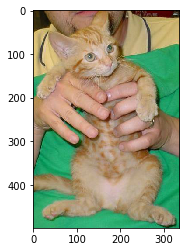

In [40]:
img = plt.imread(f'{PATH}valid/cats/{files[0]}')
plt.imshow(img);

In [41]:
img.shape

(499, 336, 3)

In [42]:
img[:4,:4]

array([[[60, 58, 10],
        [60, 57, 14],
        [61, 56, 18],
        [63, 54, 23]],

       [[56, 54,  6],
        [56, 53, 10],
        [57, 52, 14],
        [60, 51, 20]],

       [[52, 49,  4],
        [52, 49,  6],
        [53, 48, 10],
        [56, 47, 16]],

       [[50, 47,  2],
        [50, 47,  4],
        [51, 45,  9],
        [53, 44, 13]]], dtype=uint8)

## Use Resnet 34, its generally the better library

The *learning rate* determines how quickly or how slowly you want to update the *weights* (or *parameters*). Learning rate is one of the most difficult parameters to set, because it significantly affect model performance.

The method `learn.lr_find()` helps you find an optimal learning rate. It uses the technique developed in the 2015 paper [Cyclical Learning Rates for Training Neural Networks](http://arxiv.org/abs/1506.01186), where we simply keep increasing the learning rate from a very small value, until the loss starts decreasing. We can plot the learning rate across batches to see what this looks like.

We first create a new learner, since we want to know how to set the learning rate for a new (untrained) model.

In [53]:
learn = ConvLearner.pretrained(resnet34, data, precompute=True)

AssertionError: Torch not compiled with CUDA enabled

In [ ]:
lrf=learn.lr_find()

## Choosing a learning rate

#### Number of Epochs
How many times should it go through the pictures to learn the different features

#### Learning Rate
With gradient descent - you have to figure out which way is downhill. We take the derivative up hill or downhill. The learning rate is what do we multiple the derivative (gradient by). You might overshoot if you go too large, but if you go small, you might take forever to get there.

### Better to find a learning rate
https://arxiv.org/pdf/1506.01186



#### There's a function for it in fast AI

In [52]:
!!learn.lr_find()

['/bin/bash: -c: line 1: syntax error: unexpected end of file']

In [ ]:
learn.lr_find()

## how it works 

It uses mini-batches to calculate the learning rate, and then we can make a plot between error vs. learning rate. You want to choose a learning rate  where the error doesn't increase anymore

In [ ]:
learn.sched.plot_lr() 

In [ ]:
learn.sched.plot_lr() 